In [8]:
import os
import cio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import scipy
import glob
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats import spearmanr
from collections import defaultdict

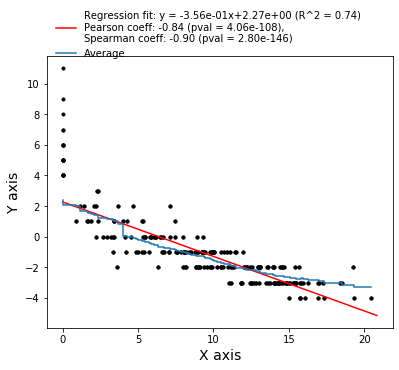

In [16]:
from cio.fitness.EpitopeDistance import EpitopeDistance

smatrixfile = os.path.join(os.path.dirname(cio.__file__), "data", "matrices", "blosum62"+".json")
with open(smatrixfile) as f:
    js = json.load(f)
b62 = defaultdict(lambda: defaultdict(float))
for elem in js:
    [ref, alt] = elem.split("->")
    b62[ref][alt] = js[elem]
    b62[alt][ref] = js[elem]
aas = list(b62.keys())
aas = list(set(aas).difference(["Z", "X", "B"]))
ed=EpitopeDistance()

aa,bb= regr([ed.mutation_dist(a, b) for b in aas for a in aas], [b62[a][b] for b in aas for a in aas])

#aa,bb= regr([ed.mutation_dist(a, b) for b in aas for a in aas if a!=b], [b62[a][b] for b in aas for a in aas if a!=b])

#aa,bb= regr([ed.mutation_dist(a, b) for b in aas for a in aas if a==b], [b62[a][b] for b in aas for a in aas if a==b])



In [526]:
D2B(0)

2.2656595272526827

(array([10., 10., 58., 56., 48., 64., 50., 38., 34., 32.]),
 array([-5.0080786 , -4.28070478, -3.55333097, -2.82595716, -2.09858335,
        -1.37120954, -0.64383572,  0.08353809,  0.8109119 ,  1.53828571,
         2.26565953]),
 <a list of 10 Patch objects>)

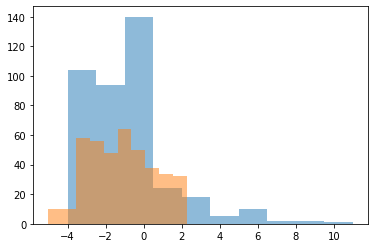

In [530]:
plt.hist([b62[a][b] for b in aas for a in aas], alpha=0.5)
plt.hist([D2B(ed.mutation_dist(a, b)) for b in aas for a in aas],alpha=0.5)

In [4]:
D2B = lambda x: aa*x + bb

In [17]:
a="IFPDDFKFK"
b="IFPDDDKFK"

sum([b62[c1][c2] if c1==c2 else D2B(ed.mutation_dist(c1,c2)) for c1,c2 in zip(a,b)])
#sum([b62[c1][c2] for c1,c2 in zip(a,b)])


41.23617906055095

In [18]:
#sum([D2B(ed.mutation_dist(c1,c2)) for c1,c2 in zip(a,b)])
def regr(c_x, c_y, xlab="X axis", ylab="Y axis", ofile="", labels=None, fig=None, ax=None, show_ave=True, show_regr=True, p1=0.01, p2=0.99, num=5):
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.stats import pearsonr, linregress

    if fig is None or ax is None:
        fig, ax = plt.subplots(figsize = (6, 5))
    fig.subplots_adjust(right = 0.95, left = 0.15)

    c_pearson, c_pval = pearsonr(c_x, c_y)
    c_spearman, c_spval = spearmanr(c_x, c_y)
    if labels is None:
        ax.plot(c_x, c_y, 'k.')
    else:
        ulabs = set(labels)
        for ulab in ulabs:
            dat = [x for x in zip(c_x, c_y, labels) if x[2]==ulab]
            c_x1 = [x[0] for x in dat]
            c_y1 = [x[1] for x in dat]
            ax.plot(c_x1, c_y1, '.')
    q1 = np.quantile(c_y, p1)        
    q2 = np.quantile(c_y, p2)
    d = [el for el in zip(c_x, c_y) if q1<=el[1]<=q2]
    cx1 = [el[0] for el in d]
    cy1 = [el[1] for el in d]
    slope_fit, intercept_fit, r_value_fit, p_value_fit, std_err_fit = linregress(np.array([cx1, cy1]).T)

    x_ax_arr = np.array([min([min(c_x) + min(c_x)/50]), max(c_x) + max(c_x)/50])
    y_ax_arr = np.array([max(c_y) + max(c_y)/50])
    if show_regr:
        ax.plot(x_ax_arr,np.array([intercept_fit, intercept_fit]) + slope_fit*x_ax_arr, 'r', 
                 label = 'Regression fit: y = %.2ex+%.2e (R^2 = %.2f)\nPearson coeff: %.2f (pval = %.2e),\nSpearman coeff: %.2f (pval = %.2e)'%(slope_fit, intercept_fit, r_value_fit**2, c_pearson, c_pval, c_spearman, c_spval))

    if show_ave:
        rang = (max(c_x) - min(c_x))/num
        ux = list(set(c_x))
        ux.sort()
        yb = [[x, [y for x0, y in zip(c_x, c_y) if x-rang<=x0<=x+rang]] for x in ux]
        yb = [el for el in yb if len(el[1])>0]
        xb = [el[0] for el in yb]
        yb = [np.mean(el[1]) for el in yb]
        ax.step(xb, yb, label="Average")

    if show_regr:
        ax.legend(fontsize = 10, frameon = False, loc = 2, bbox_to_anchor=(0, 1.20))
    elif show_ave:
        ax.legend()
    #plt.ylim(y_ax_arr)
    #plt.xlim(x_ax_arr)
    ax.set_xlabel(xlab, fontsize = 14)
    ax.set_ylabel(ylab, fontsize = 14)
    if ofile!="":
        plt.savefig(ofile)
    return slope_fit, intercept_fit

In [68]:
hdir = "/Users/mluksza/Dropbox/Research/10_PDAC/Modeling/Data_met"
odir = os.path.join(hdir, "Figures")
if not os.path.exists(odir):
    os.mkdir(odir)
rdir = os.path.join(hdir, "Results_03_31")


In [28]:
glob.glob(os.path.join(rdir,"cleps_0.0_nested_False","AR_dgw"))

['/Users/mluksza/Dropbox/Research/10_PDAC/Modeling/Data_met/Results_03_31/cleps_0.0_nested_False/AR_dgw']

In [71]:
tab.columns

Index(['Patient', 'Cohort', 'OS', 'PFS', 'TP1', 'TP2', 'Sites1', 'Sites2',
       'Primary_fitness', 'Met_fitness', 'Delta_fitness',
       'Met_new_clones_fitness', 'Trunkality', 'Trunkality_shared_clones',
       'MolClock1a', 'MolClock2a', 'MolClock1b', 'MolClock2b', 'MolClock1c',
       'MolClock2c', 'MolClock_new_clones', 'n2m_all1', 'n2m_bin1',
       'n2m_all_score1', 'n2m_bin_score1', 'n2m_post1', 'n2m_score_post1',
       'muts_with_n1', 'n2m_all2', 'n2m_bin2', 'n2m_all_score2',
       'n2m_bin_score2', 'n2m_post2', 'n2m_score_post2', 'muts_with_n2',
       'Private_volume', 'Shared_volume', 'Entropy1', 'Entropy2', 'Tau',
       'DG_weight', 'MinKL', 'KL0', 'random_MinKL_0', 'random_MinKL_1',
       'random_MinKL_2', 'random_MinKL_3', 'random_MinKL_4', 'random_MinKL_5',
       'random_MinKL_6', 'random_MinKL_7', 'random_MinKL_8', 'random_MinKL_9',
       'Ave_Random_MinKL', 'Std_Random_MinKL', 'IG', 'IGn'],
      dtype='object')

In [157]:
ardir = glob.glob(os.path.join(rdir,"cleps_0.03_nested_False", "AR_dgw"))[0]
tab = pd.read_csv(os.path.join(ardir, "met_ave_fitness.txt"), sep="\t")
tab["IG"] = tab.KL0-tab.MinKL
tab["IGn"] = (tab.KL0-tab.MinKL)/tab.KL0
tab["RIG"] = tab.KL0-tab.Ave_Random_MinKL
tab["RIGn"] = (tab.KL0-tab.Ave_Random_MinKL)/tab.KL0


In [158]:
artab=tab

In [156]:
dartab=tab

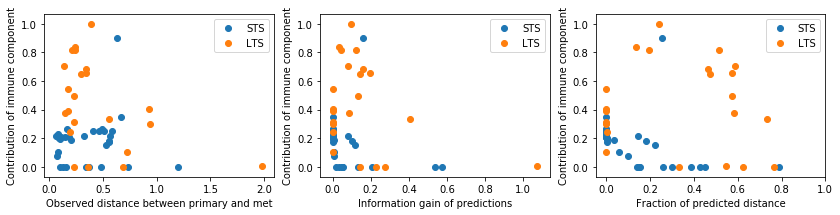

In [155]:
fig, ax = plt.subplots(1, 3, figsize=(14, 3))

ax[0].scatter(tab[tab.Cohort=="STS"].KL0, 1-tab[tab.Cohort=="STS"].DG_weight, label="STS")
ax[0].scatter(tab[tab.Cohort=="LTS"].KL0, 1-tab[tab.Cohort=="LTS"].DG_weight, label="LTS")
ax[0].set_xlabel("Observed distance between primary and met")
ax[0].set_ylabel("Contribution of immune component")
ax[0].legend()

ax[1].scatter(tab[tab.Cohort=="STS"].IG, 1-tab[tab.Cohort=="STS"].DG_weight, label="STS")
ax[1].scatter(tab[tab.Cohort=="LTS"].IG, 1-tab[tab.Cohort=="LTS"].DG_weight, label="LTS")
ax[1].set_xlabel("Information gain of predictions")
ax[1].set_ylabel("Contribution of immune component")
ax[1].legend()
#plt.show()

ax[2].scatter(tab[tab.Cohort=="STS"].IGn, 1-tab[tab.Cohort=="STS"].DG_weight, label="STS")
ax[2].scatter(tab[tab.Cohort=="LTS"].IGn, 1-tab[tab.Cohort=="LTS"].DG_weight, label="LTS")
ax[2].set_xlabel("Fraction of predicted distance")
ax[2].set_ylabel("Contribution of immune component")
ax[2].legend()
ax[2].set_xlim(-0.05,1)

#plt.show()

plt.savefig(os.path.join(rdir, "predictions_DAR.pdf"))


(0.0029412554866166058, 0.29582980830702804)

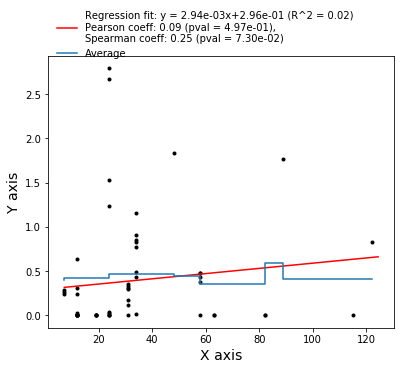

In [147]:
rtab=tab[tab.Tau<15]
regr(rtab.OS, rtab.DG_weight*rtab.Tau)

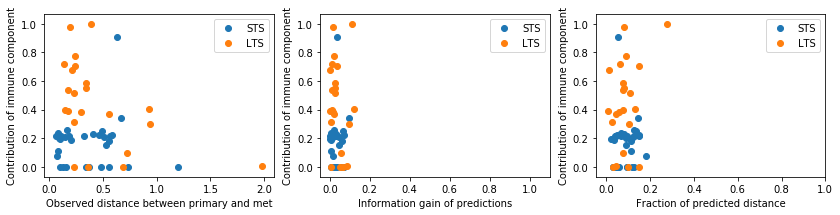

In [80]:
fig, ax = plt.subplots(1, 3, figsize=(14, 3))

ax[0].scatter(tab[tab.Cohort=="STS"].KL0, 1-tab[tab.Cohort=="STS"].DG_weight, label="STS")
ax[0].scatter(tab[tab.Cohort=="LTS"].KL0, 1-tab[tab.Cohort=="LTS"].DG_weight, label="LTS")
ax[0].set_xlabel("Observed distance between primary and met")
ax[0].set_ylabel("Contribution of immune component")
ax[0].legend()

ax[1].scatter(tab[tab.Cohort=="STS"].RIG, 1-tab[tab.Cohort=="STS"].DG_weight, label="STS")
ax[1].scatter(tab[tab.Cohort=="LTS"].RIG, 1-tab[tab.Cohort=="LTS"].DG_weight, label="LTS")
ax[1].set_xlabel("Information gain of predictions")
ax[1].set_ylabel("Contribution of immune component")
ax[1].set_xlim(-0.05,1.1)
ax[1].legend()
#plt.show()

ax[2].scatter(tab[tab.Cohort=="STS"].RIGn, 1-tab[tab.Cohort=="STS"].DG_weight, label="STS")
ax[2].scatter(tab[tab.Cohort=="LTS"].RIGn, 1-tab[tab.Cohort=="LTS"].DG_weight, label="LTS")
ax[2].set_xlabel("Fraction of predicted distance")
ax[2].set_ylabel("Contribution of immune component")
ax[2].set_xlim(-0.05,1)
ax[2].legend()
#plt.show()


(5.004489492433688, 11.036881542678367)

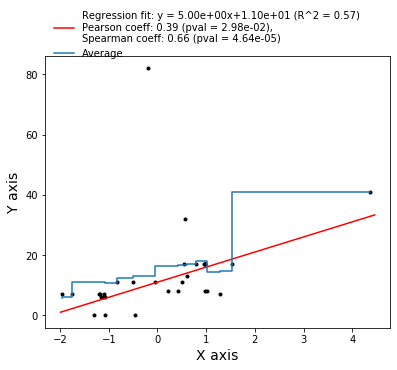

In [149]:
regr(np.log(ptab.Tau), ptab.PFS)

36


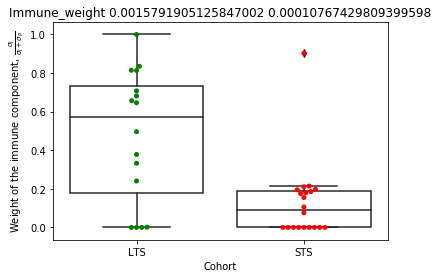

In [289]:
atab=dartab
atab["Immune_weight"] = 1-atab["DG_weight"]
col="DG_weight"
col="Immune_weight"
ptab = atab[atab.Tau>1e-10]
print(ptab.shape[0])
l = ptab[ptab.Cohort=="LTS"][col]
s = ptab[ptab.Cohort=="STS"][col]

mwstat = scipy.stats.mannwhitneyu(l, s)
kstat = scipy.stats.ks_2samp(s, l, alternative='two-sided', mode='auto')

ax = sns.swarmplot(x='Cohort', y=col, data=ptab, dodge=True, palette=dict(LTS = 'g', VLTS = 'b', STS = 'r'))
ax = sns.boxplot(x='Cohort', y=col, data=ptab, dodge=True,
                 whis=1.0,palette=dict(LTS = 'g', VLTS = 'b', STS = 'r'), boxprops={'facecolor': 'None'})
plt.title(col+" "+str(mwstat.pvalue)+" "+str(kstat.pvalue))
#plt.yscale("log")
plt.ylabel("Weight of the immune component, "+r'$\frac{\sigma_I}{\sigma_I+\sigma_P}$')
#plt.title("Relative contribition of the immune component")
plt.savefig(os.path.join(rdir, "Immune_weight.pdf"))
plt.show()

(0.13545058262306808, 0.21976129068192987)

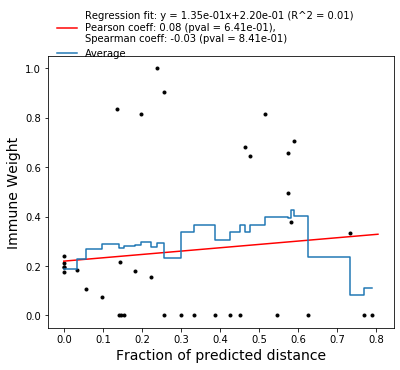

In [292]:
tregr(stabpos.IGn, stabpos.Immune_weight, xlab="Fraction of predicted distance", ylab="Immune Weight")

(-0.4095605225231844, 0.634299854941401)

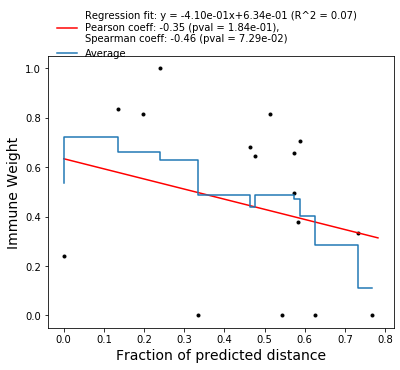

In [294]:
regr(stabpos[stabpos.Cohort=="LTS"].IGn, stabpos[stabpos.Cohort=="LTS"].Immune_weight, xlab="Fraction of predicted distance", ylab="Immune Weight")

36


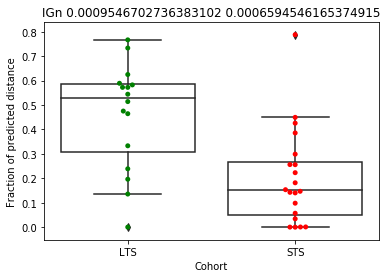

In [288]:
atab=dartab
atab["Immune_weight"] = 1-atab["DG_weight"]
col="DG_weight"
col="IGn"
ptab=atab
ptab = atab[atab.Tau>=1e-10]
print(ptab.shape[0])
l = ptab[ptab.Cohort=="LTS"][col]
s = ptab[ptab.Cohort=="STS"][col]

mwstat = scipy.stats.mannwhitneyu(l, s)
kstat = scipy.stats.ks_2samp(s, l, alternative='two-sided', mode='auto')

ax = sns.swarmplot(x='Cohort', y=col, data=ptab, dodge=True, palette=dict(LTS = 'g', VLTS = 'b', STS = 'r'))
ax = sns.boxplot(x='Cohort', y=col, data=ptab, dodge=True,
                 whis=1.0,palette=dict(LTS = 'g', VLTS = 'b', STS = 'r'), boxprops={'facecolor': 'None'})
plt.title(col+" "+str(mwstat.pvalue)+" "+str(kstat.pvalue))
#plt.yscale("log")
#plt.ylim(-0.01, 1.)
plt.ylabel("Fraction of predicted distance")
#plt.title("Predicting clonal composition of recurrent tumors")
plt.savefig(os.path.join(rdir, "IGn.pdf"))
plt.show()

In [282]:
stab = atab.loc[:, ["Patient", "Cohort", "PFS", "OS", "Tau", "IGn", "Entropy1", "Immune_weight"]]
stabpos = stab[stab.Tau>=1e-5]
stabpos.shape

(36, 8)

In [5]:
import numpy as np

1/np.var([2., 2., 1.])

4.5

In [283]:
stab.to_csv(rdir+"/IGn.txt", sep="\t")
stabpos.to_csv(rdir+"/Immune_weight.txt", sep="\t")


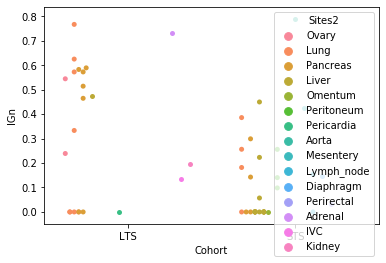

In [251]:
ax = sns.swarmplot(x="Cohort", hue='Sites2', y="IGn", data=ptab, dodge=True)


In [ ]:
log(a/b) = log(a) - log(b)


log(a/b) - log(a/c) = log(a/b * c/a) = log(c/b)

(-0.00032084800149934523, 0.20521417245372275)

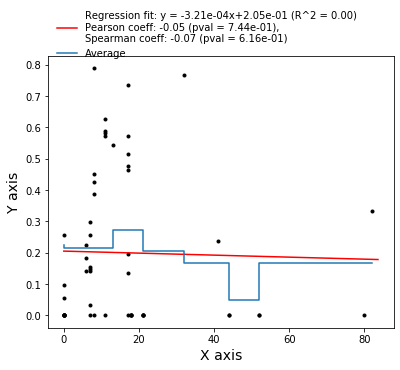

In [239]:
regr(atab.PFS, atab.IGn)

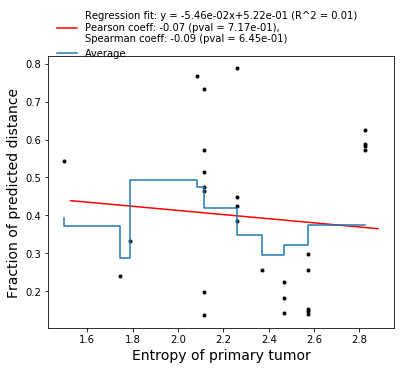

In [237]:
regr(ptab.Entropy1, ptab.IGn, xlab="Entropy of primary tumor", ylab="Fraction of predicted distance")
plt.savefig(os.path.join(rdir, "entropy_IGn.pdf"))

(-5.885402812957889, 16.24166996696363)

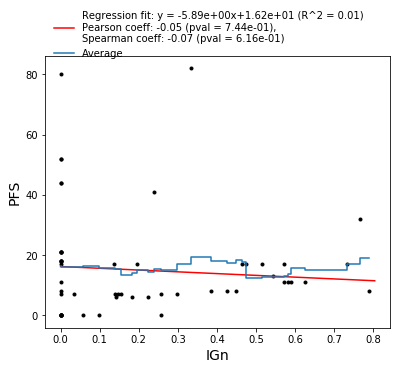

In [226]:
regr(ptab.IGn, ptab.PFS, xlab=r'IGn', ylab="PFS")

In [144]:
regr(ptab.OS, ptab.Random_DG_weight)

AttributeError: 'DataFrame' object has no attribute 'Random_DG_weight'

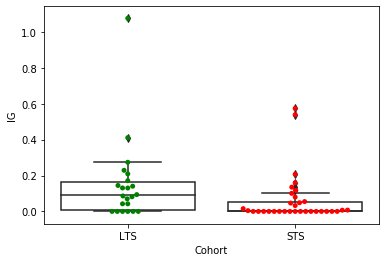

In [112]:
ax = sns.swarmplot(x='Cohort', y='IG', data=tab, dodge=True, palette=dict(LTS = 'g', VLTS = 'b', STS = 'r'))
ax = sns.boxplot(x='Cohort', y='IG', data=tab, dodge=True,
                 whis=1.0,palette=dict(LTS = 'g', VLTS = 'b', STS = 'r'), boxprops={'facecolor': 'None'})


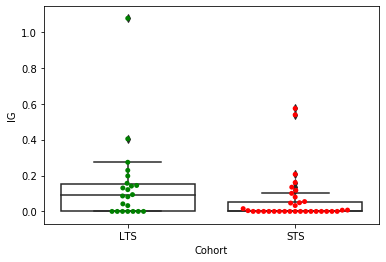

In [150]:
ax = sns.swarmplot(x='Cohort', y='IG', data=tab, dodge=True, palette=dict(LTS = 'g', VLTS = 'b', STS = 'r'))
ax = sns.boxplot(x='Cohort', y='IG', data=tab, dodge=True,
                 whis=1.0,palette=dict(LTS = 'g', VLTS = 'b', STS = 'r'), boxprops={'facecolor': 'None'})


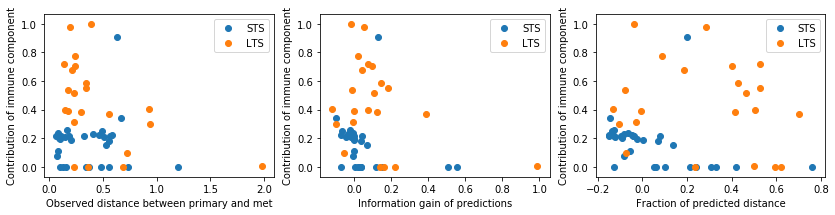

In [85]:
fig, ax = plt.subplots(1, 3, figsize=(14, 3))

ax[0].scatter(tab[tab.Cohort=="STS"].KL0, 1-tab[tab.Cohort=="STS"].DG_weight, label="STS")
ax[0].scatter(tab[tab.Cohort=="LTS"].KL0, 1-tab[tab.Cohort=="LTS"].DG_weight, label="LTS")
ax[0].set_xlabel("Observed distance between primary and met")
ax[0].set_ylabel("Contribution of immune component")
ax[0].legend()

ax[1].scatter(tab[tab.Cohort=="STS"].IG-tab[tab.Cohort=="STS"].RIG, 1-tab[tab.Cohort=="STS"].DG_weight, label="STS")
ax[1].scatter(tab[tab.Cohort=="LTS"].IG-tab[tab.Cohort=="LTS"].RIG, 1-tab[tab.Cohort=="LTS"].DG_weight, label="LTS")
ax[1].set_xlabel("Information gain of predictions")
ax[1].set_ylabel("Contribution of immune component")
ax[1].legend()
#plt.show()

ax[2].scatter(tab[tab.Cohort=="STS"].IGn-tab[tab.Cohort=="STS"].RIGn, 1-tab[tab.Cohort=="STS"].DG_weight, label="STS")
ax[2].scatter(tab[tab.Cohort=="LTS"].IGn-tab[tab.Cohort=="LTS"].RIGn, 1-tab[tab.Cohort=="LTS"].DG_weight, label="LTS")
ax[2].set_xlabel("Fraction of predicted distance")
ax[2].set_ylabel("Contribution of immune component")
ax[2].legend()
plt.show()


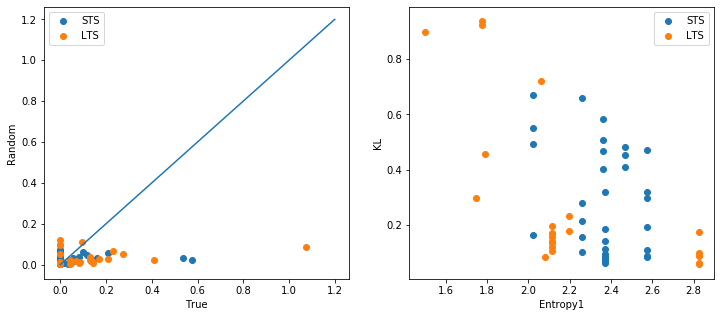

In [109]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].scatter(tab[tab.Cohort=="STS"].IG, tab[tab.Cohort=="STS"].RIG, label="STS")
ax[0].scatter(tab[tab.Cohort=="LTS"].IG, tab[tab.Cohort=="LTS"].RIG, label="LTS")
ax[0].plot([0,1.2],[0,1.2])
ax[0].set_xlabel("True")
ax[0].set_ylabel("Random")
ax[0].legend()

ax[1].scatter( tab[tab.Cohort=="STS"].Entropy1, tab[tab.Cohort=="STS"].MinKL, label="STS")
ax[1].scatter(tab[tab.Cohort=="LTS"].Entropy1, tab[tab.Cohort=="LTS"].MinKL, label="LTS")
#ax[1].plot([0,1.2],[0,1.2])
ax[1].set_ylabel("KL")
ax[1].set_xlabel("Entropy1")
ax[1].legend()

In [102]:
tab.columns

Index(['Patient', 'Cohort', 'OS', 'PFS', 'TP1', 'TP2', 'Sites1', 'Sites2',
       'Primary_fitness', 'Met_fitness', 'Delta_fitness',
       'Met_new_clones_fitness', 'Trunkality', 'Trunkality_shared_clones',
       'MolClock1a', 'MolClock2a', 'MolClock1b', 'MolClock2b', 'MolClock1c',
       'MolClock2c', 'MolClock_new_clones', 'n2m_all1', 'n2m_bin1',
       'n2m_all_score1', 'n2m_bin_score1', 'n2m_post1', 'n2m_score_post1',
       'muts_with_n1', 'n2m_all2', 'n2m_bin2', 'n2m_all_score2',
       'n2m_bin_score2', 'n2m_post2', 'n2m_score_post2', 'muts_with_n2',
       'Private_volume', 'Shared_volume', 'Entropy1', 'Entropy2', 'Tau',
       'DG_weight', 'MinKL', 'KL0', 'random_MinKL_0', 'random_MinKL_1',
       'random_MinKL_2', 'random_MinKL_3', 'random_MinKL_4', 'random_MinKL_5',
       'random_MinKL_6', 'random_MinKL_7', 'random_MinKL_8', 'random_MinKL_9',
       'Ave_Random_MinKL', 'Std_Random_MinKL', 'IG', 'IGn', 'RIG', 'RIGn'],
      dtype='object')

0.09656073651161813 0.0


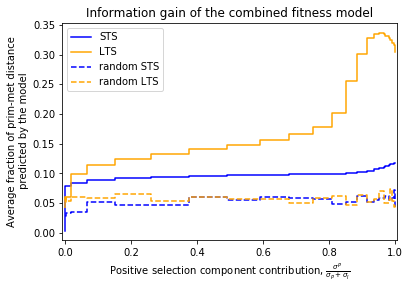

In [711]:
ardirs = glob.glob(os.path.join(rdir,"cleps_0.03_nested_False", "AR*"))
#ardirs = glob.glob(os.path.join(rdir,"cleps_0.0_nested_False", "AR*"))
ardirs = [(float(rd.split("_")[-1]), rd) for rd in ardirs]
ardirs.sort(key=lambda x: x[0])
STS = []
LTS = []
rSTS = []
rLTS = []
ws = []
for w, ardir in ardirs:
    try:
        tab = pd.read_csv(os.path.join(ardir, "met_ave_fitness.txt"), sep="\t")
        tab["IG"] = tab.KL0-tab.MinKL
        tab["IGn"] = tab.IG/tab.KL0
        tab["RIG"] = tab.KL0-tab.Ave_Random_MinKL
        tab["RIGn"] = tab.RIG/tab.KL0
        STS.append(np.mean(tab[tab.Cohort=="STS"].IGn))
        LTS.append(np.mean(tab[tab.Cohort=="LTS"].IGn))
        rSTS.append(np.mean(tab[tab.Cohort=="STS"].RIGn))
        rLTS.append(np.mean(tab[tab.Cohort=="LTS"].RIGn))
        ws.append(w)
    except:
        pass
    
ws = np.array(ws)
ws=ws**5
plt.step(ws, STS, '-b', label="STS")
plt.step(ws, LTS, '-',color='orange', label="LTS")
plt.step(ws, rSTS, '--b', label="random STS")
plt.step(ws, rLTS, '--',color='orange', label="random LTS")
plt.xlim(-0.01,1.005)
#plt.xscale("log")
plt.legend()
plt.ylabel("Average fraction of prim-met distance\n predicted by the model")
plt.xlabel("Positive selection component contribution, "+r'$\frac{\sigma^P}{\sigma_P + \sigma_I}$')
plt.title("Information gain of the combined fitness model")
plt.savefig(rdir+"/IG.pdf")
print((max(LTS)-LTS[-1])/max(LTS), (max(STS)-STS[-1])/max(STS))


In [ ]:
kdwt/kdmt * R / distance(wt,mt)

In [233]:
ndist2 = ndist
ndist2["Neoantigen_ID"] = ["_".join(r.split("_")[:-1]) for r in ndist2.Neoantigen_ID]

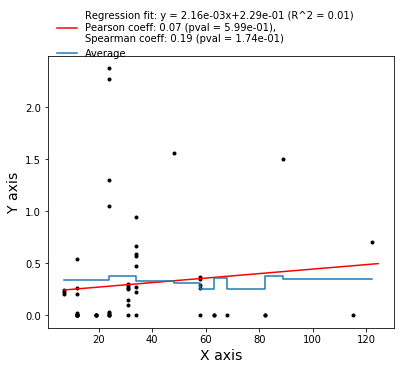

In [328]:
regr(tab.OS, tab.Tau)

In [238]:
ndist3 = ndist2.drop_duplicates()
ndist = ndist3

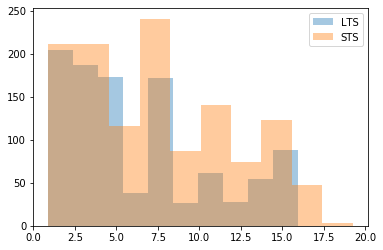

/Users/mluksza/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/Users/mluksza/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


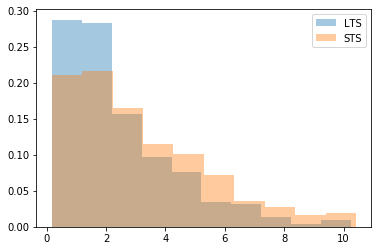

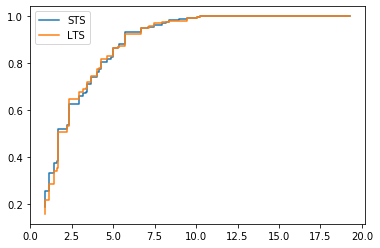

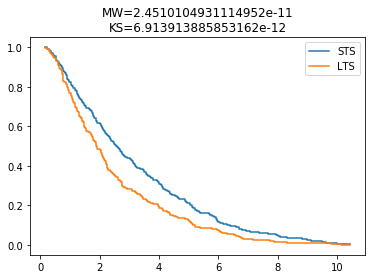

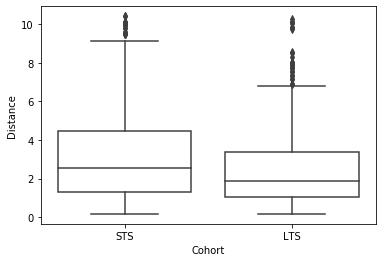

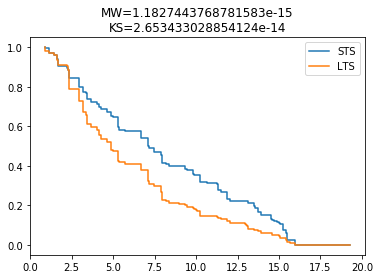

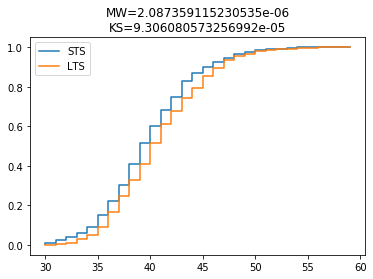

In [578]:
mdist = pd.read_csv(os.path.join(rdir, "mutation_distance.txt"), sep="\t")
cdist = pd.read_csv(os.path.join(rdir, "mutation_distance_combined.txt"), sep="\t")
ndist = pd.read_csv(os.path.join(rdir, "neoantigen_distance.txt"), sep="\t")
plt.hist(mdist[mdist.OS>=32].Distance, alpha=0.4, label="LTS")
plt.hist(mdist[mdist.OS<32].Distance, alpha=0.4, label="STS")
plt.legend()
plt.show()

plt.hist(ndist[ndist.OS>=32].Distance, density=True, alpha=0.4, label="LTS")
plt.hist(ndist[ndist.OS<32].Distance, density=True, alpha=0.4, label="STS")
plt.legend()


ud = list(set(cdist.Distance))
ud.sort()
sdi = ndist[cdist.OS<32].Distance
ldi = ndist[cdist.OS>=32].Distance
plt.show()
plt.step(ud, [sum([x<=d for x in sdi])/len(sdi) for d in ud], label="STS")
plt.step(ud, [sum([x<=d for x in ldi])/len(ldi) for d in ud], label="LTS")
plt.legend()
plt.show()


ud = list(set(ndist3.Distance))
ud.sort()
sdi = ndist[ndist.OS<32].Distance
ldi = ndist[ndist.OS>=32].Distance
mwstat = scipy.stats.mannwhitneyu(sdi, ldi)
kstat = scipy.stats.ks_2samp(sdi, ldi, alternative='two-sided', mode='auto')
plt.show()
plt.step(ud, [sum([x>=d for x in sdi])/len(sdi) for d in ud], label="STS")
plt.step(ud, [sum([x>=d for x in ldi])/len(ldi) for d in ud], label="LTS")
plt.title("MW="+str(mwstat.pvalue)+"\nKS="+str(kstat.pvalue))
plt.legend()
ndist["Cohort"] = ["LTS" if r.OS>=32 else "STS" for r in ndist.itertuples()]
#ax = sns.swarmplot(x='Cohort', y='Distance', 
#                   order=["STS", "LTS"],
#                   data=ndist, dodge=True)
#                   #palette=dict(VLTS = 'b', STS = 'r',LTS = 'b'))
plt.show()
ax = sns.boxplot(x='Cohort', y='Distance', data=ndist, 
                 order=["STS", "LTS"],
                 dodge=True,  boxprops={'facecolor': 'None'})


ud = list(set(ndist.DistanceUniform))
ud.sort()
sdi = ndist[ndist.OS<32].DistanceUniform
ldi = ndist[ndist.OS>=32].DistanceUniform
kstat = scipy.stats.ks_2samp(sdi, ldi, alternative='two-sided', mode='auto')
mwstat = scipy.stats.mannwhitneyu(sdi, ldi)
plt.show()
plt.step(ud, [sum([x>=d for x in sdi])/len(sdi) for d in ud], label="STS")
plt.step(ud, [sum([x>=d for x in ldi])/len(ldi) for d in ud], label="LTS")
plt.title("MW="+str(mwstat.pvalue)+"\nKS="+str(kstat.pvalue))
plt.legend()

ud = list(set(ndist.B62))
ud.sort()
sdi = ndist[ndist.OS<32].B62
ldi = ndist[ndist.OS>=32].B62
mwstat = scipy.stats.mannwhitneyu(sdi, ldi)
kstat = scipy.stats.ks_2samp(sdi, ldi, alternative='two-sided', mode='auto')
plt.show()
plt.step(ud, [sum([x<=d for x in sdi])/len(sdi) for d in ud], label="STS")
plt.step(ud, [sum([x<=d for x in ldi])/len(ldi) for d in ud], label="LTS")
plt.title("MW="+str(mwstat.pvalue)+"\nKS="+str(kstat.pvalue))
plt.legend()



In [250]:
ndist

Patient  OS            Neoantigen_ID Substition   Distance  \
0     11-LTS  68  1_154378139_C_G_6_A0201       L->V   1.491132   
1     11-LTS  68  1_154378139_C_G_1_A0201       L->V   0.632997   
2     11-LTS  68  1_154378139_C_G_1_C0303       L->V   0.632997   
3     11-LTS  68  1_212002614_G_A_7_C0303       P->S   3.364005   
4     11-LTS  68  1_212002614_G_A_4_B4001       P->S   2.136208   
...      ...  ..                      ...        ...        ...   
1768   PAM46  34  22_42418256_C_T_2_A3001       A->V   1.884092   
1769   PAM46  34  22_42418256_C_T_1_C0702       A->V   1.307380   
1770   PAM46  34  22_42483114_T_G_8_A3001       K->Q   0.473783   
1771   PAM46  34  22_50280309_C_T_7_B3501       P->L   7.777829   
1772   PAM46  34  22_50280309_C_T_5_C0702       P->L  10.115263   

      DistanceUniform  B62 Cohort  
0            3.437161   33    LTS  
1            3.437161   38    LTS  
2            3.437161   38    LTS  
3            6.691800   41    LTS  
4            6.691800   49    LTS  
...               ...  ...    ...  
1768         7.099050   42    LTS  
1769         7.099050   42    LTS  
1770         0.909698   42    LTS  
1771        15.471938   40    LTS  
1772        15.471938   42    LTS  

[1773 rows x 8 columns]

In [207]:
ismet=defaultdict(lambda:False)
for r in mdist.itertuples():
    ismet[(r.Patient, r.Mutation_ID)] = (r.Type=="Metastatic")


In [242]:
node_logfit = lambda node, tau: -math.inf if node.cY == 0 else np.log(node.cY) + node.fitness * tau

In [213]:
mndist = ndist[[ismet[(r.Patient, "_".join(r.Neoantigen_ID.split("_")[:4]))] for r in ndist.itertuples()]]
pndist = ndist[[not ismet[(r.Patient, "_".join(r.Neoantigen_ID.split("_")[:4]))] for r in ndist.itertuples()]]

In [230]:
msdi = mndist[mndist.Cohort=="STS"].Distance
mldi = mndist[mndist.Cohort=="LTS"].Distance

kstat = scipy.stats.ks_2samp(msdi, mldi, alternative='two-sided', mode='auto')
mwstat = scipy.stats.mannwhitneyu(msdi, mldi)
print(kstat, mwstat, len(msdi), len(mldi))


psdi = pndist[pndist.Cohort=="STS"].Distance
pldi = pndist[pndist.Cohort=="LTS"].Distance

kstat = scipy.stats.ks_2samp(psdi, pldi, alternative='two-sided', mode='auto')
mwstat = scipy.stats.mannwhitneyu(psdi, pldi)
print(kstat, mwstat,len(psdi), len(pldi))

Ks_2sampResult(statistic=0.04702694786174575, pvalue=0.9721516037631059) MannwhitneyuResult(statistic=33566.0, pvalue=0.3861228811301211) 569 120
Ks_2sampResult(statistic=0.19296513303236962, pvalue=2.6293416888201193e-08) MannwhitneyuResult(statistic=103371.0, pvalue=1.718587337202982e-08) 359 725


In [190]:
mfreq = defaultdict(lambda: defaultdict(int))
pfreq = defaultdict(lambda: defaultdict(int))
cfreq = defaultdict(lambda: defaultdict(int))
nfreq = defaultdict(lambda: defaultdict(int))
s2m = {}
for r in mdist.itertuples():
    if r.Type[0]=="M":
        mfreq[r.OS][r.Substition] += 1
    elif r.Type[0]=="P":
        pfreq[r.OS][r.Substition] += 1
    s2m[r.Substition] = r.Distance
for r in cdist.itertuples():
    cfreq[r.OS][r.Substition] += 1
    s2m[r.Substition] = r.Distance

for r in ndist.itertuples():
    nfreq[r.OS][r.Distance] += 1
    
nsts = [list(nfreq[oss].items()) for oss in nfreq if oss<32]
nsts = [elem for sublist in nsts for elem in sublist]
nlts = [list(nfreq[oss].items()) for oss in nfreq if oss>=32]
nlts = [elem for sublist in nlts for elem in sublist]

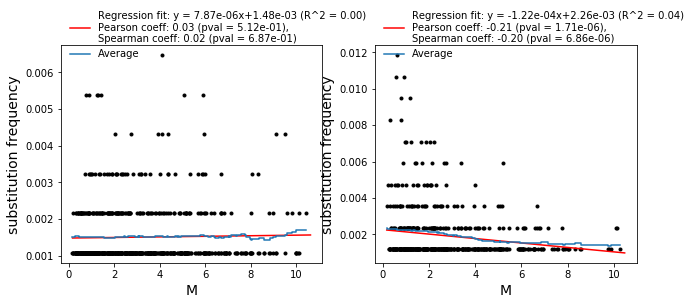

In [191]:
z=sum([y for x, y in nsts])
nsts = [(x, y/z) for x,y in nsts]
z=sum([y for x, y in nlts])
nlts = [(x, y/z) for x,y in nlts]

fig, ax = plt.subplots(1,2,figsize=(10,4))
regr([x for x, y in nsts],[y for x, y in nsts],fig=fig, ax=ax[0], 
     show_ave=True,
     xlab="M",ylab="substitution frequency")
regr([x for x, y in nlts],[y for x, y in nlts],fig=fig, ax=ax[1], 
     show_ave=True,
     xlab="M",ylab="substitution frequency")
plt.savefig(os.path.join(rdir, "tolerance_neo.pdf"))

In [140]:
len(nsts)

660

In [115]:
#psts = [list(pfreq[oss].items()) for oss in pfreq if oss<32]
#psts = [elem for sublist in psts for elem in sublist]
#plts = [list(pfreq[oss].items()) for oss in pfreq if oss>=32]
#plts = [elem for sublist in plts for elem in sublist]

#msts = [list(mfreq[oss].items()) for oss in mfreq if oss<32]
#msts = [elem for sublist in msts for elem in sublist]
#mlts = [list(mfreq[oss].items()) for oss in mfreq if oss>=32]
#mlts = [elem for sublist in mlts for elem in sublist]


sts = [list(cfreq[oss].items()) for oss in cfreq if oss<32]
sts = [elem for sublist in sts for elem in sublist]
lts = [list(cfreq[oss].items()) for oss in cfreq if oss>=32]
lts = [elem for sublist in lts for elem in sublist]

In [122]:
#sts = psts + msts
#lts = plts + mlts
z=sum([y for x, y in sts])
sts = [(x, y/z) for x,y in sts]
z=sum([y for x, y in lts])
lts = [(x, y/z) for x,y in lts]


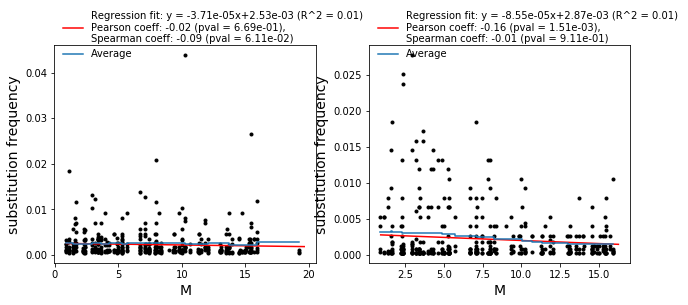

In [123]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
regr([s2m[x] for x, y in sts],[y for x, y in sts],fig=fig, ax=ax[0], 
     show_ave=True,
     xlab="M",ylab="substitution frequency")
regr([s2m[x] for x, y in lts],[y for x, y in lts],fig=fig, ax=ax[1], 
     show_ave=True,
     xlab="M",ylab="substitution frequency")
plt.savefig(os.path.join(rdir, "tolerance_2.pdf"))

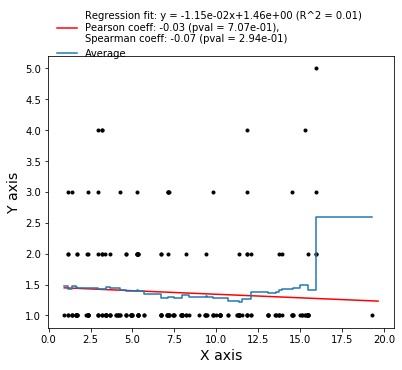

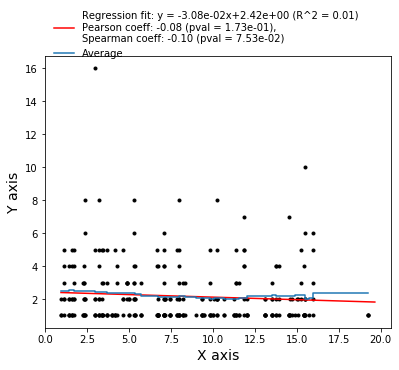

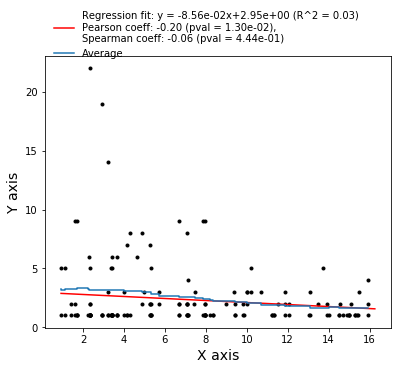

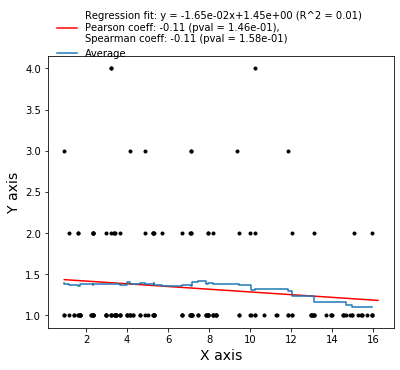

In [57]:
regr([x for x, y in psts],[y for x, y in psts])
regr([x for x, y in msts],[y for x, y in msts])
regr([x for x, y in plts],[y for x, y in plts])
regr([x for x, y in mlts],[y for x, y in mlts])


In [27]:
d['a'] = 1
list(d.items())

[('a', 1)]

In [211]:
def r(s, a, k):
    return 1-1/(1+np.exp((s-a)/k))

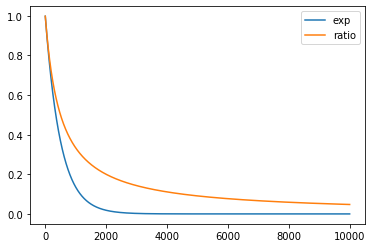

In [263]:
kdwt = np.arange(1, 10000)
plt.plot(kdwt, np.exp(-kdwt/500),label="exp")
plt.plot(kdwt, 500/(500+kdwt),label="ratio")
plt.legend()

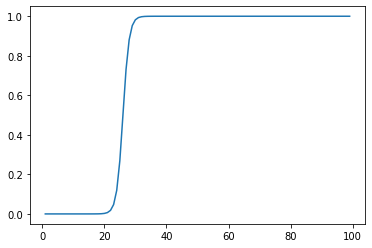

In [212]:
kdwt = np.arange(1, 100)
plt.plot(kdwt, [r(s, 26, 1) for s in kdwt])

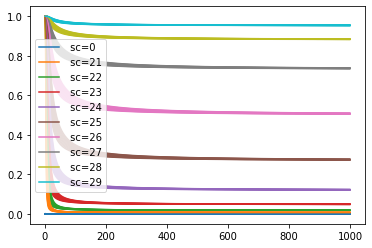

In [256]:
kdwt = np.arange(1, 1000)
for w in np.arange(10, 20):
    for sc in [0] + list(np.arange(21, 30)):
        if w==10:
            plt.plot(kdwt, [r(1/(1+s)*2*w + sc, 26, 1) for s in kdwt], label=" sc="+str(sc))
        else:
            plt.plot(kdwt, [r(1/(1+s)*2*w + sc, 26, 1) for s in kdwt])
plt.legend()

In [583]:
ws

[0.0,
 0.25,
 0.438,
 0.578,
 0.684,
 0.763,
 0.822,
 0.867,
 0.9,
 0.925,
 0.944,
 0.958,
 0.968,
 0.976,
 0.982,
 0.987,
 0.99,
 0.993,
 0.994,
 0.996,
 0.997,
 0.998,
 0.999,
 0.9999,
 1.0]

0.0 0.3004484304932735 0.37994722955145116 0.3504983388704319


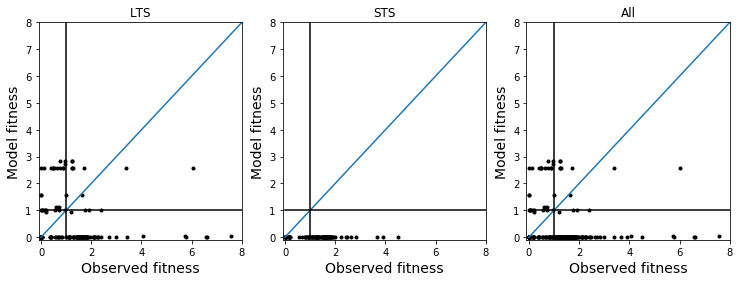

0.25 0.2914798206278027 0.37994722955145116 0.34717607973421927


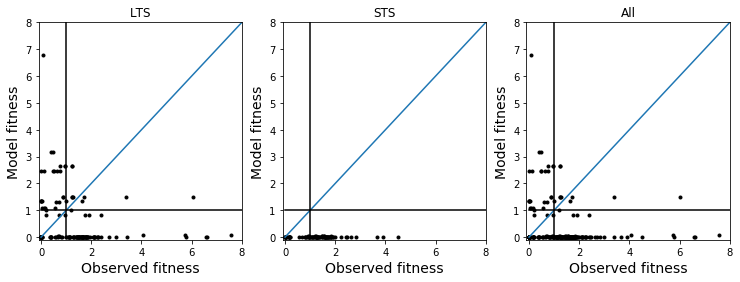

0.438 0.2914798206278027 0.37994722955145116 0.34717607973421927


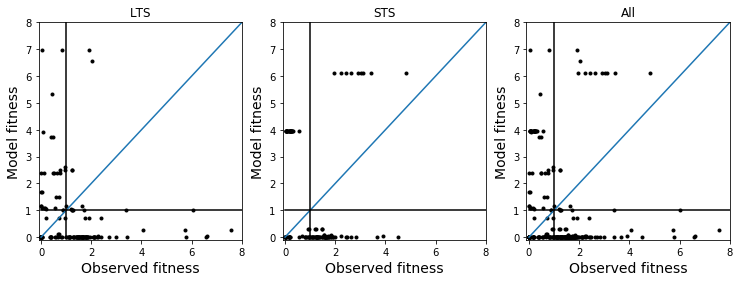

0.578 0.273542600896861 0.38522427440633245 0.3438538205980066


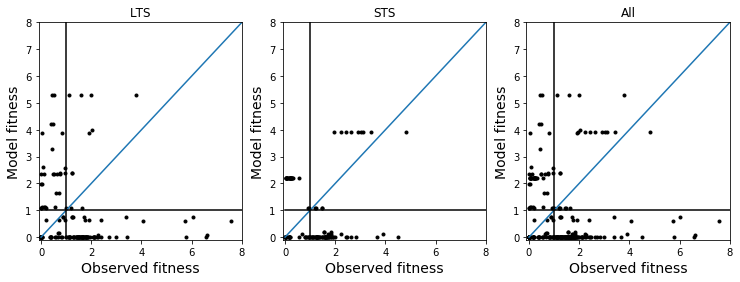

0.684 0.29596412556053814 0.38522427440633245 0.3521594684385382


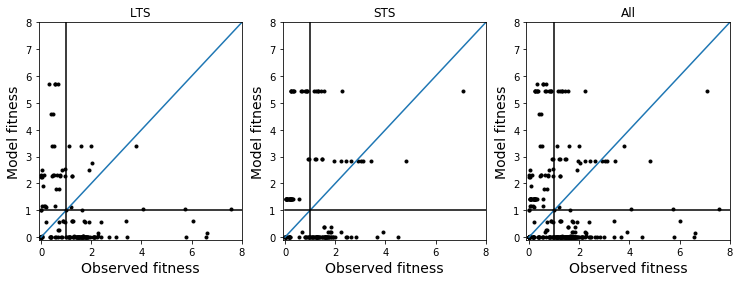

0.763 0.29596412556053814 0.38522427440633245 0.3521594684385382


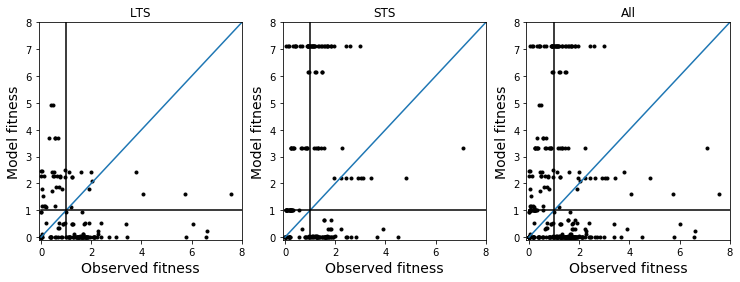

0.822 0.29596412556053814 0.44063324538258575 0.38704318936877075


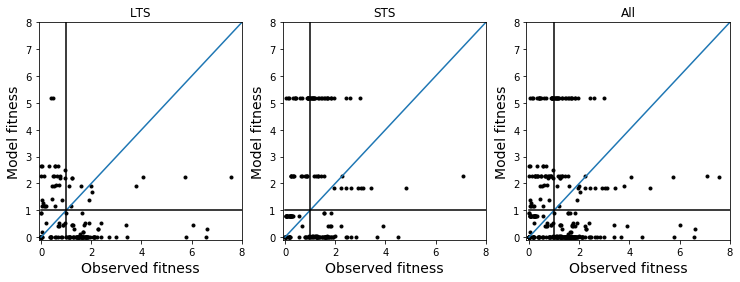

0.867 0.29596412556053814 0.44854881266490765 0.3920265780730897


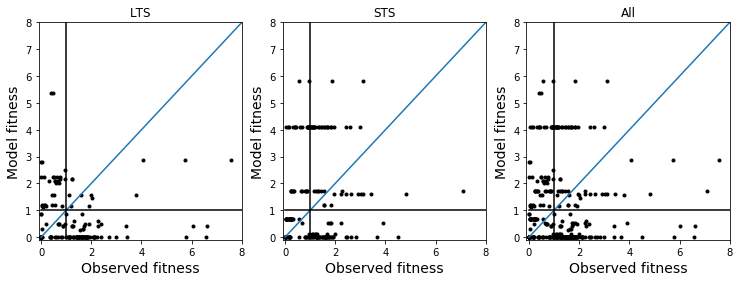

0.9 0.30493273542600896 0.44854881266490765 0.3953488372093023


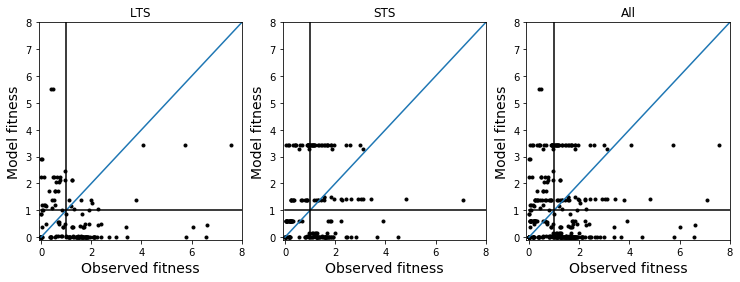

0.925 0.3183856502242152 0.44854881266490765 0.4003322259136213


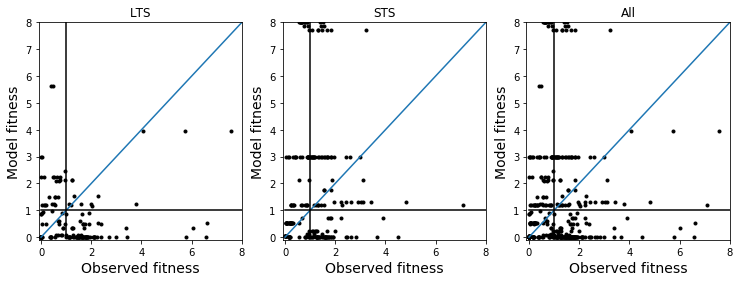

0.944 0.3183856502242152 0.44854881266490765 0.4003322259136213


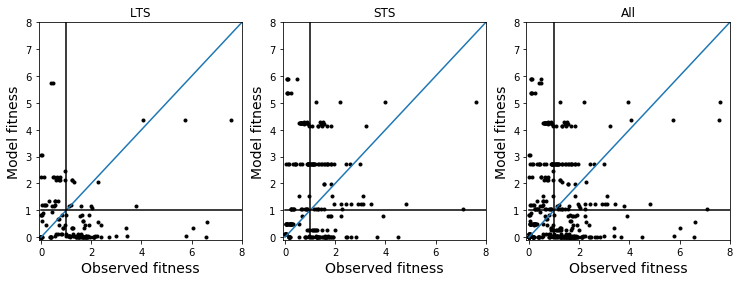

0.958 0.3183856502242152 0.45910290237467016 0.4069767441860465


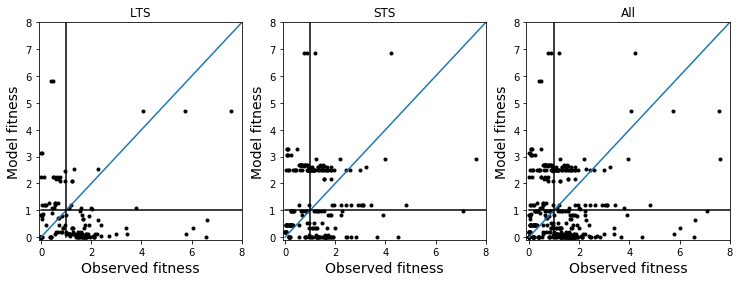

0.968 0.32286995515695066 0.45910290237467016 0.40863787375415284


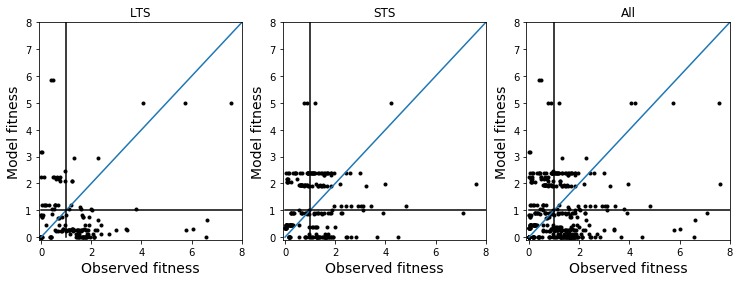

0.976 0.3094170403587444 0.45910290237467016 0.40365448504983387


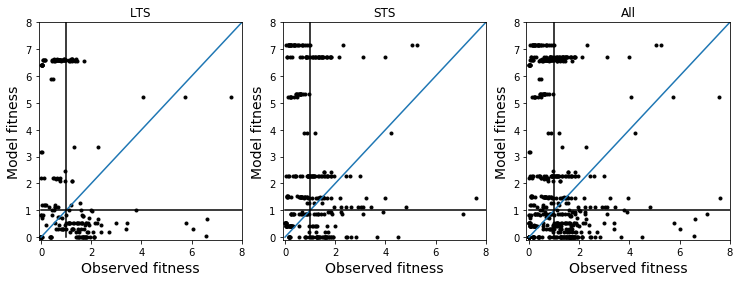

0.982 0.3094170403587444 0.45910290237467016 0.40365448504983387


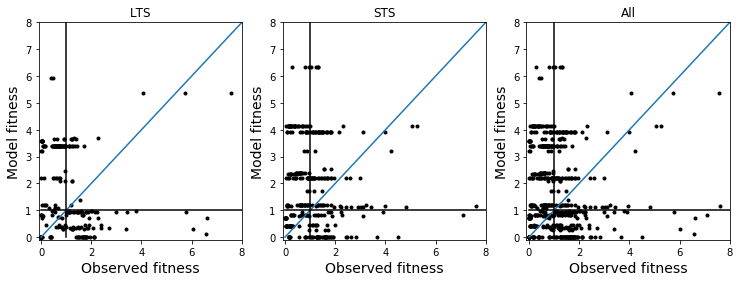

0.987 0.4080717488789238 0.46965699208443273 0.446843853820598


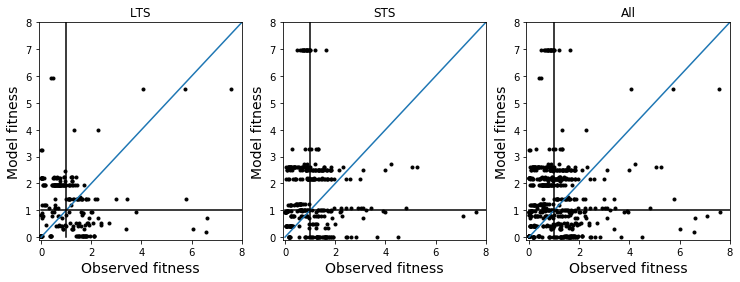

0.99 0.4080717488789238 0.5197889182058048 0.47840531561461797


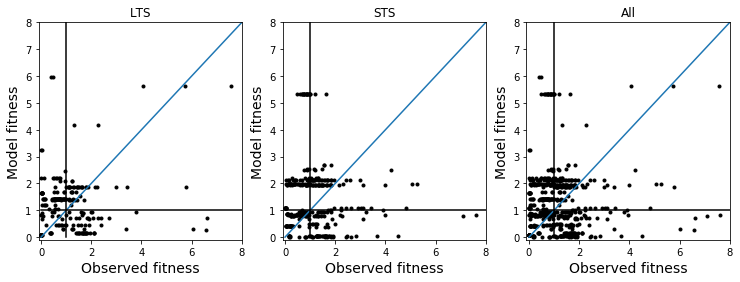

0.993 0.4080717488789238 0.5303430079155673 0.4850498338870432


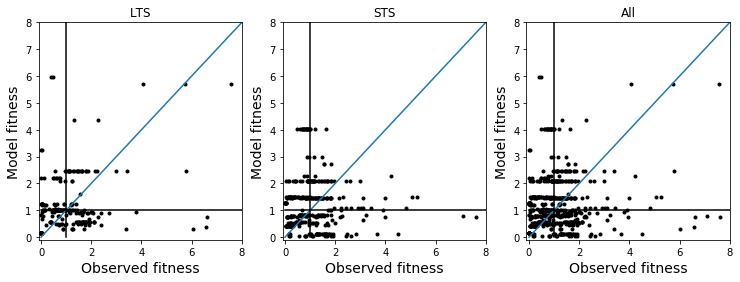

0.994 0.5605381165919282 0.5303430079155673 0.5415282392026578


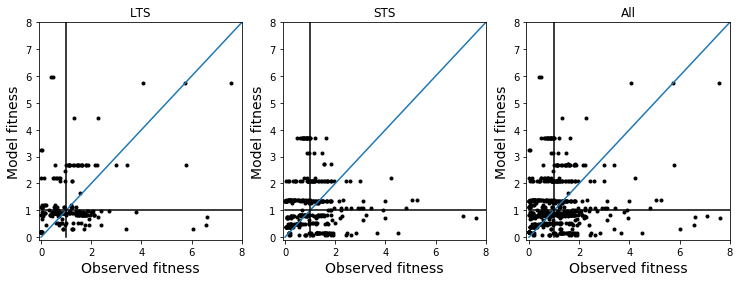

0.996 0.6995515695067265 0.5277044854881267 0.5913621262458472


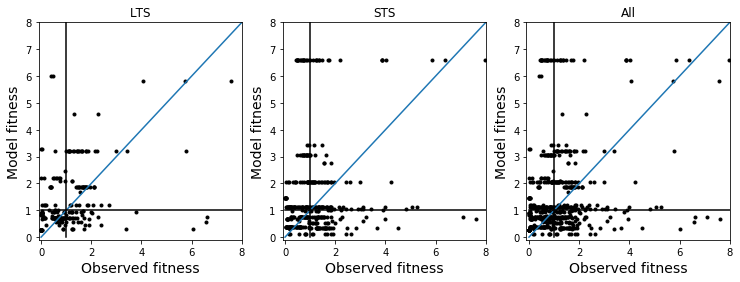

0.997 0.6995515695067265 0.5277044854881267 0.5913621262458472


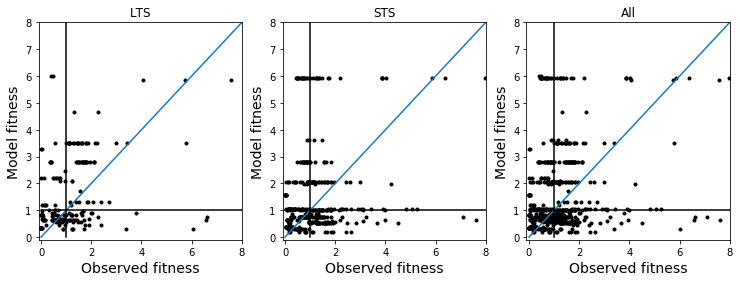

0.998 0.6995515695067265 0.5488126649076517 0.6046511627906976


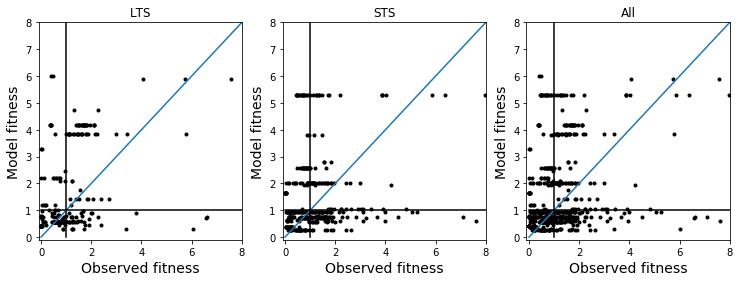

0.999 0.7174887892376681 0.604221635883905 0.6461794019933554


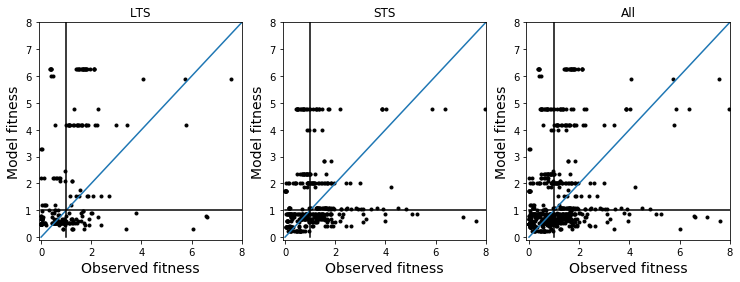

0.9999 0.7174887892376681 0.604221635883905 0.6461794019933554


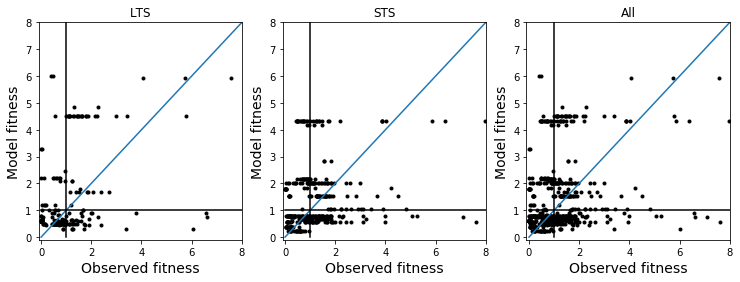

1.0 0.7174887892376681 0.604221635883905 0.6461794019933554


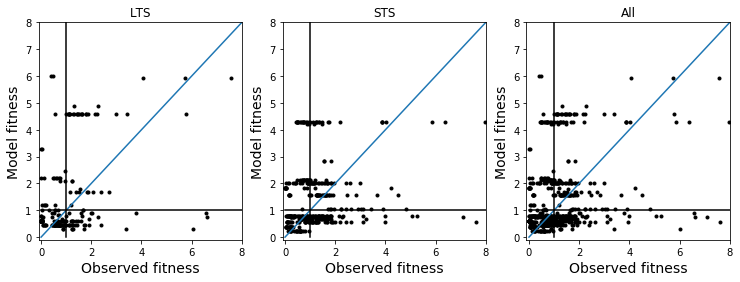

In [645]:

for w in ws: #["0.0", "0.25", "0.944", "0.987", "1.0"]:
    rdir = os.path.join(hdir, "Results_03_29", "cleps_0.0_nested_False", "DAR_dgw_"+ str(w))
    clones = pd.read_csv(os.path.join(rdir, "clones.txt"), sep="\t")
    alclones = clones[clones.Cohort!="STS"]
    asclones = clones[clones.Cohort=="STS"]

    clones = clones[clones.X1<1]
    aclones = clones[clones.X1>=0.03]
    lclones = clones[[c.Cohort!="STS" and 1.>c.X1>=0.03 for c in clones.itertuples()]]
    sclones = clones[[c.Cohort=="STS" and 1.>c.X1>=0.03 for c in clones.itertuples()]]

    nlclones = clones[[c.Cohort!="STS" and c.X1<0.03 for c in clones.itertuples()]]
    nsclones = clones[[c.Cohort=="STS" and c.X1<0.03 for c in clones.itertuples()]]
    lacc = len([el for el in list(zip(np.log(lclones.X2/lclones.X1), lclones.rel_fitness)) if (el[0]>0  and el[1]>0) or (el[0]<0  and el[1]<0)])/lclones.shape[0]
    sacc = len([el for el in list(zip(np.log(sclones.X2/sclones.X1), sclones.rel_fitness)) if (el[0]>0  and el[1]>0) or (el[0]<0  and el[1]<0)])/sclones.shape[0]
    acc = len([el for el in list(zip(np.log(aclones.X2/aclones.X1), aclones.rel_fitness)) if (el[0]>0  and el[1]>0) or (el[0]<0  and el[1]<0)])/aclones.shape[0]
    print(w,lacc, sacc, acc)
    fig, ax = plt.subplots(1, 3, figsize=(12,4))
    regr(lclones.X2/lclones.X1, np.exp(lclones.rel_fitness), show_ave=False, show_regr=False,fig=fig, ax=ax[0], 
         xlab="Observed fitness",ylab="Model fitness")
    ax[0].plot([0,8],[0,8])
    ax[0].plot([0,8], [1,1],'-k')
    ax[0].plot([1,1], [0,8],'-k')
#    ax[0].plot([[0,1],[8,1]],'-k')
    ax[0].set_xlim(-0.1,8)
    ax[0].set_ylim(-0.1,8)
    ax[0].set_title("LTS")
    regr((sclones.X2/sclones.X1), np.exp(sclones.rel_fitness), show_ave=False, show_regr=False,fig=fig, ax=ax[1],
        xlab="Observed fitness",ylab="Model fitness")
    ax[1].plot([0,8],[0,8])
    ax[1].set_xlim(-0.1,8)
    ax[1].set_ylim(-0.1,8)
    ax[1].plot([0,8], [1,1],'-k')
    ax[1].plot([1,1], [0,8],'-k')
    ax[1].set_title("STS")
    regr((aclones.X2/aclones.X1), np.exp(aclones.rel_fitness), show_ave=False, show_regr=False,fig=fig, ax=ax[2],
        xlab="Observed fitness",ylab="Model fitness")
    ax[2].plot([0,8],[0,8])
    ax[2].set_xlim(-0.1,8)
    ax[2].set_ylim(-0.1,8)
    ax[2].plot([0,8], [1,1],'-k')
    ax[2].plot([1,1], [0,8],'-k')
    ax[2].set_title("All")
    #plt.title("w="+str(w))
    #plt.title("dg weight = "+str(w))
    #plt.savefig("/Users/mluksza/Dropbox/Research/10_PDAC/Modeling/slides/Figures/fig3_"+w+".pdf")
    plt.show()
    

In [646]:
tstats

Patient Cohort   OS  PFS      TP1            TP2    Sites1      Sites2  \
0     11-LTS    LTS   68   41  Primary   Metastatic_1  Pancreas       Ovary   
1     16-LTS    LTS   89   32  Primary   Metastatic_1  Pancreas        Lung   
2     28-LTS    LTS   82   52  Primary   Metastatic_1  Pancreas        Lung   
3     28-LTS    LTS   82   52  Primary   Metastatic_2  Pancreas        Lung   
4     3-OLTS    LTS  115   80  Primary   Metastatic_1  Pancreas        Lung   
5      5-LTS    LTS   48   13  Primary   Metastatic_1  Pancreas       Ovary   
6   APGI2132    LTS  122   82  Primary   Metastatic_1  Pancreas        Lung   
7      PAM36    LTS   63   44  Primary   Metastatic_1  Pancreas    Pancreas   
8      PAM36    LTS   63   44  Primary   Metastatic_2  Pancreas        Lung   
9      PAM37    STS   24   21  Primary   Metastatic_1  Pancreas       Liver   
10     PAM37    STS   24   21  Primary   Metastatic_2  Pancreas       Liver   
11     PAM37    STS   24   21  Primary   Metastatic_3  Pancreas     Omentum   
12     PAM37    STS   24   21  Primary   Metastatic_4  Pancreas       Liver   
13     PAM38    STS    7    6  Primary   Metastatic_1  Pancreas    Pancreas   
14     PAM38    STS    7    6  Primary   Metastatic_2  Pancreas        Lung   
15     PAM38    STS    7    6  Primary   Metastatic_3  Pancreas       Liver   
16     PAM41    STS   12    0  Primary   Metastatic_9  Pancreas       Liver   
17     PAM41    STS   12    0  Primary  Metastatic_10  Pancreas       Liver   
18     PAM41    STS   12    0  Primary   Metastatic_1  Pancreas       Liver   
19     PAM41    STS   12    0  Primary   Metastatic_2  Pancreas       Liver   
20     PAM41    STS   12    0  Primary   Metastatic_3  Pancreas    Pancreas   
21     PAM41    STS   12    0  Primary   Metastatic_4  Pancreas       Liver   
22     PAM41    STS   12    0  Primary   Metastatic_5  Pancreas       Liver   
23     PAM41    STS   12    0  Primary   Metastatic_6  Pancreas        Lung   
24     PAM41    STS   12    0  Primary   Metastatic_7  Pancreas        Lung   
25     PAM41    STS   12    0  Primary   Metastatic_8  Pancreas  Peritoneum   
26     PAM42    LTS   58   11  Primary   Metastatic_1  Pancreas    Pancreas   
27     PAM42    LTS   58   11  Primary   Metastatic_2  Pancreas    Pancreas   
28     PAM42    LTS   58   11  Primary   Metastatic_3  Pancreas        Lung   
29     PAM42    LTS   58   11  Primary   Metastatic_4  Pancreas        Lung   
30     PAM42    LTS   58   11  Primary   Metastatic_5  Pancreas  Pericardia   
31     PAM43    STS   24    8  Primary   Metastatic_1  Pancreas    Pancreas   
32     PAM43    STS   24    8  Primary   Metastatic_2  Pancreas       Liver   
33     PAM43    STS   24    8  Primary   Metastatic_3  Pancreas       Aorta   
34     PAM43    STS   24    8  Primary   Metastatic_4  Pancreas   Mesentery   
35     PAM43    STS   24    8  Primary   Metastatic_5  Pancreas        Lung   
36     PAM44    STS   19   18  Primary   Metastatic_2  Pancreas       Liver   
37     PAM44    STS   19   18  Primary   Metastatic_1  Pancreas    Pancreas   
38     PAM44    STS   19   18  Primary   Metastatic_4  Pancreas       Liver   
39     PAM44    STS   19   18  Primary   Metastatic_3  Pancreas       Liver   
40     PAM45    STS   31    7  Primary   Metastatic_1  Pancreas    Pancreas   
41     PAM45    STS   31    7  Primary   Metastatic_2  Pancreas  Peritoneum   
42     PAM45    STS   31    7  Primary   Metastatic_3  Pancreas  Peritoneum   
43     PAM45    STS   31    7  Primary   Metastatic_4  Pancreas  Lymph_node   
44     PAM45    STS   31    7  Primary   Metastatic_5  Pancreas  Lymph_node   
45     PAM45    STS   31    7  Primary   Metastatic_6  Pancreas   Diaphragm   
46     PAM45    STS   31    7  Primary   Metastatic_7  Pancreas  Perirectal   
47     PAM46    LTS   34   17  Primary   Metastatic_4  Pancreas    Pancreas   
48     PAM46    LTS   34   17  Primary   Metastatic_3  Pancreas    Pancreas   
49     PAM46    LTS   34   17  Primary   Metastatic_8  

In [624]:
cl = clones[clones.X1<1]
cl = cl[cl.X1>=0.03]
pats = list(set(cl.Patient))
dos = {}
for r in cl.itertuples():
    dos[r.Patient] = r.OS
pats.sort(key=lambda x: dos[x])
stats = []
for pat in pats:
    clp = cl[cl.Patient==pat]
    lacc = len([el for el in list(zip(np.log(clp.X2/clp.X1), clp.rel_fitness)) if (el[0]>0  and el[1]>0) or (el[0]<0  and el[1]<0)])/clp.shape[0]
    #print(pat, lacc, clp.shape[0], list(set(clp.OS))[0])
    stats.append([list(set(clp.OS))[0], lacc])
    
oo =list(set(cl.OS))
oo.sort()
roc = []
for o in oo:
    clp = cl[cl.OS>=o]
    lacc = len([el for el in list(zip(np.log(clp.X2/clp.X1), clp.rel_fitness)) if (el[0]>0  and el[1]>0) or (el[0]<0  and el[1]<0)])/clp.shape[0]
    #print(pat, lacc, clp.shape[0], list(set(clp.OS))[0])
    roc.append([o, lacc])

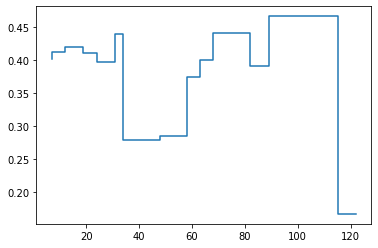

In [625]:
plt.step([x[0] for x in roc], [x[1] for x in roc])

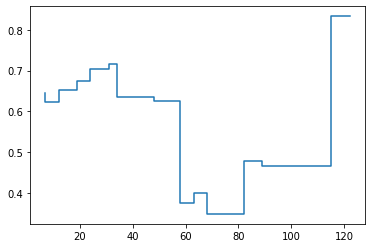

In [619]:
plt.step([x[0] for x in roc], [x[1] for x in roc])

In [158]:
sum([np.log(x) for x in [1/3,1/3,1/3]])*np.log2(np.exp(1)) 
#sum([np.log2(x) for x in [1/3,1/3,1/3]])

-4.754887502163468

In [607]:
clp

Patient  OS  PFS Cohort        X1        X2  fitness  rel_fitness
505   PAM42  58   11    LTS  0.775699  0.745782      0.0    -0.765648
506   PAM42  58   11    LTS  0.224301  0.254218      0.0    -0.765648
507   PAM42  58   11    LTS  0.255216  0.405657      3.0     2.234352
508   PAM42  58   11    LTS  0.269038  0.194363      0.0    -0.765648
509   PAM42  58   11    LTS  0.190665  0.107011      0.0    -0.765648
..      ...  ..  ...    ...       ...       ...      ...          ...
626   PAM42  58   11    LTS  0.186804  0.152314      0.0    -0.765648
627   PAM42  58   11    LTS  0.052351  0.003041      0.0    -0.765648
628   PAM42  58   11    LTS  0.151855  0.167087      0.0    -0.765648
629   PAM42  58   11    LTS  0.093793  0.119769      0.0    -0.765648
630   PAM42  58   11    LTS  0.110408  0.088167      0.0    -0.765648

[80 rows x 8 columns]

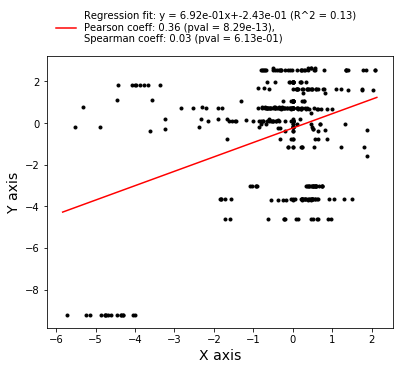

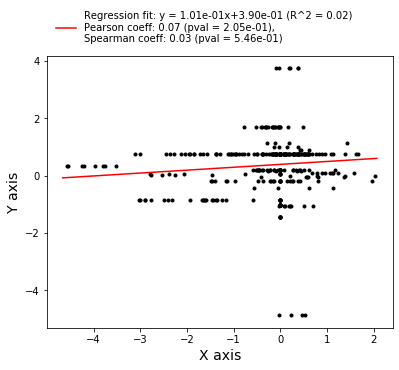

In [73]:
regr(np.log(lclones.X2/lclones.X1), lclones.rel_fitness, show_ave=False)
#plt.plot([0,0],[-5,3], '-k')
#plt.plot([-6,6],[0,0], '-k')
regr(np.log(sclones.X2/sclones.X1), sclones.rel_fitness, show_ave=False)

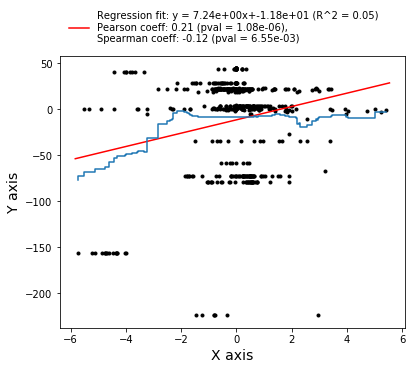

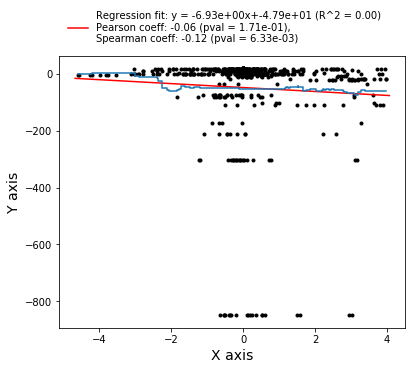

In [29]:
regr(np.log(lclones.X2/lclones.X1), lclones.rel_fitness)
regr(np.log(sclones.X2/sclones.X1), sclones.rel_fitness)

In [5]:
[y*f for f,y in [[-2.041997881596274,0.09416082567576653+0.5701094976188879+0.19400529881279763],
 [0,0.1417243778925481]]]

[-1.7525970021691413, 0.0]

In [7]:
sum([y*f for f,y in [[-9.065656565656566,0.673287911895995],[-70.81127774797726,0.291263407605769]]])

-26.72853103285155

In [659]:
rdir = os.path.join(hdir, "Results_03_12")
rdir = os.path.join(hdir, "Results_03_18")
rdir = os.path.join(hdir, "Results_03_29")
comb="cleps_0.03_nested_False"
comb="cleps_0.03_nested_False"
model="AR_dgw_1.0"
#model="AR_stand_dgw_0.0"
mdir=os.path.join(rdir, comb, model)
tstats = pd.read_csv(os.path.join(mdir, "met_ave_fitness.txt"), sep="\t")
#pstats = pd.read_csv(os.path.join(mdir, "predictions_KL.txt"), sep="\t")

#obsdist = {}
#for line in pstats.itertuples():
#    obsdist[line.Patient+" "+line.TP1+" "+line.TP2] = line.Observed_distance
    
#tstats['Observed_distance'] = [obsdist[line.Patient+" "+line.TP1+" "+line.TP2] for line in tstats.itertuples()]

In [572]:
scount=defaultdict(int)
for c in tstats.itertuples():
    scount[c.Patient]+=1
    
tstats["Norm_entropy"] = [c.Entropy2/scount[c.Patient] for c in tstats.itertuples()]
tstats["Exp_entropy2"] = [np.exp(c.Entropy2) for c in tstats.itertuples()]
tstats["count"] = [scount[c.Patient] for c in tstats.itertuples()]

(0, 0.2)

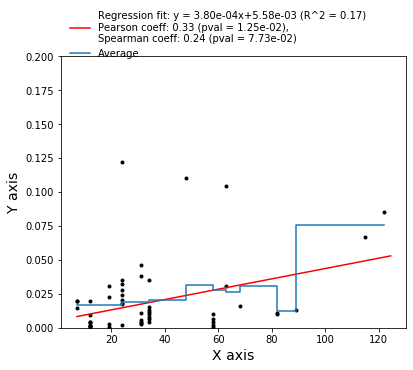

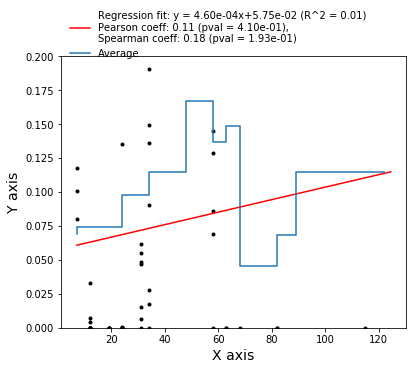

In [673]:
regr(tstats.OS,  (tstats.KL0-tstats.Ave_Random_MinKL))
plt.ylim(0,0.2)
regr(tstats.OS,  (tstats.KL0-tstats.MinKL))
plt.ylim(0,0.2)

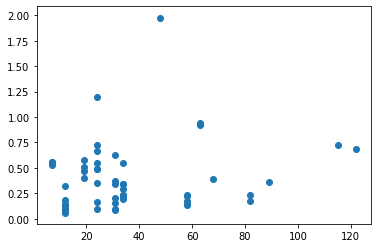

In [663]:
plt.scatter(tstats.OS,  tstats.KL0)

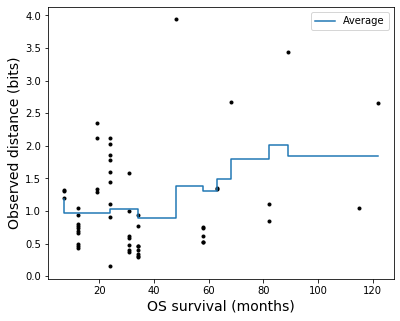

In [47]:
regr(tstats.OS, np.log2(np.exp(1))* tstats.Observed_distance, show_regr=False, show_ave=True, 
     xlab="OS survival (months)", ylab="Observed distance (bits)", num=5)
plt.savefig(os.path.join("/Users/mluksza/Dropbox/Research/10_PDAC/Modeling/slides/Figures/distance_prim_met.pdf"))


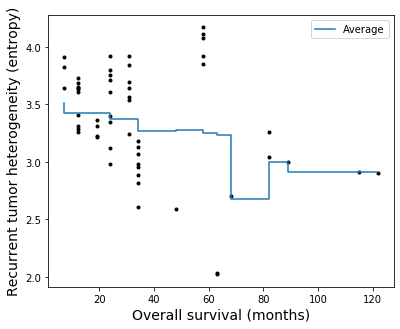

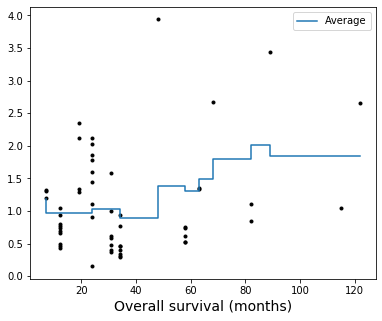

In [49]:
regr(tstats.OS, (tstats.Entropy2)*np.log2(np.exp(1)) , show_ave=True, show_regr=False,xlab="Overall survival (months)",ylab="Recurrent tumor heterogeneity (entropy)")
plt.savefig(os.path.join("/Users/mluksza/Dropbox/Research/10_PDAC/Modeling/slides/Figures/heterogeneity_prim.pdf"))
#regr(tstats.OS, (tstats.Entropy1), show_ave=False, xlab="Overall survival (months)",ylab="Primary tumor heterogeneity (entropy)")
#plt.savefig(os.path.join("/Users/mluksza/Dropbox/Research/10_PDAC/Modeling/slides/Figures/heterogeneity_met.pdf"))
regr(tstats.OS, np.log2(np.exp(1)) *tstats.Observed_distance, show_regr=False, xlab="Overall survival (months)", ylab="")
#plt.ylim(0,)
plt.savefig(os.path.join("/Users/mluksza/Dropbox/Research/10_PDAC/Modeling/slides/Figures/distance_prim_met_normalized.pdf"))
plt.show()
#regr(tstats.OS, (tstats.Entropy2/tstats.Entropy1), show_ave=False, xlab="Overall survival",ylab="Tumor heterogeneity (entropy)")
#plt.savefig(os.path.join("/Users/mluksza/Dropbox/Research/10_PDAC/Modeling/slides/Figures/heterogeneity_met.pdf"))

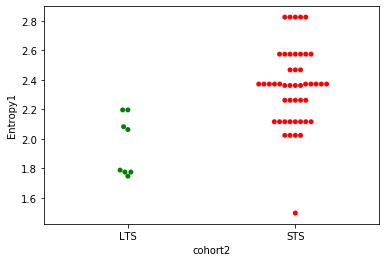

In [185]:
tstats["cohort2"] = ["LTS" if os>60 else "STS" for os in tstats.OS]
ax = sns.swarmplot(x='cohort2', y='Entropy1', data=tstats, dodge=True, palette=dict(LTS = 'g', VLTS = 'b', STS = 'r'))
#ax = sns.boxplot(x='Cohort', y='Exp_entropy2', data=tstats, dodge=True,
#                 whis=1.0,palette=dict(LTS = 'g', VLTS = 'b', STS = 'r'), boxprops={'facecolor': 'None'})



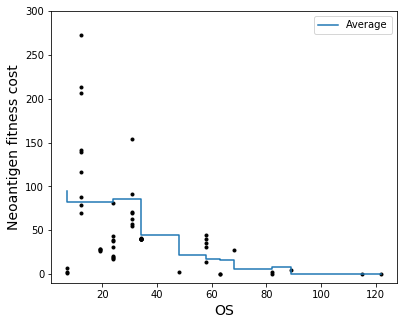

In [50]:
regr(tstats.OS, -(tstats.Met_new_clones_fitness), xlab="OS", ylab="Neoantigen fitness cost", show_regr=False, 
     p1=0.0, p2=1.0)
plt.ylim(-10,300)
ofile=os.path.join(odir, "DG_model_new_clones.pdf")
plt.savefig(ofile)

(-10, 1000)

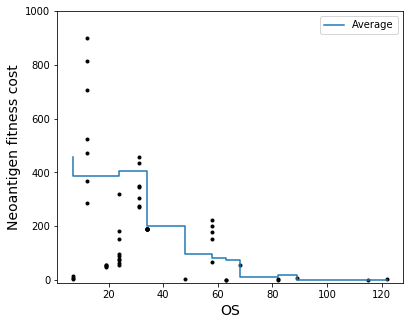

In [573]:
regr(tstats.OS, -(tstats.Met_new_clones_fitness), xlab="OS", ylab="Neoantigen fitness cost", show_regr=False, 
     p1=0.0, p2=1.0)
plt.ylim(-10,1000)
#ofile=os.path.join(odir, "DG_model_new_clones_.pdf")
#plt.savefig(ofile)

In [575]:
tstats.columns

Index(['Patient', 'Cohort', 'OS', 'PFS', 'TP1', 'TP2', 'Sites1', 'Sites2',
       'Primary_fitness', 'Met_fitness', 'Delta_fitness',
       'Met_new_clones_fitness', 'Trunkality', 'Trunkality_shared_clones',
       'MolClock1a', 'MolClock2a', 'MolClock1b', 'MolClock2b', 'MolClock1c',
       'MolClock2c', 'MolClock_new_clones', 'n2m_all1', 'n2m_bin1',
       'n2m_all_score1', 'n2m_bin_score1', 'n2m_post1', 'n2m_score_post1',
       'muts_with_n1', 'n2m_all2', 'n2m_bin2', 'n2m_all_score2',
       'n2m_bin_score2', 'n2m_post2', 'n2m_score_post2', 'muts_with_n2',
       'Private_volume', 'Shared_volume', 'Entropy1', 'Entropy2', 'Tau',
       'MinKL', 'KL0', 'random_MinKL_0', 'random_MinKL_1', 'random_MinKL_2',
       'random_MinKL_3', 'random_MinKL_4', 'random_MinKL_5', 'random_MinKL_6',
       'random_MinKL_7', 'random_MinKL_8', 'random_MinKL_9',
       'Ave_Random_MinKL', 'Std_Random_MinKL', 'Norm_entropy', 'Exp_entropy2',
       'count'],
      dtype='object')

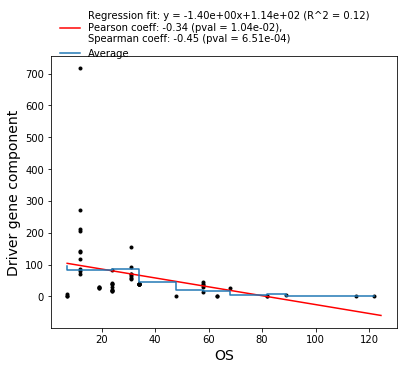

In [12]:
regr(tstats.OS, -(tstats.Met_new_clones_fitness), xlab="OS", ylab="Driver gene component", p1=0.0, p2=1.0)
#plt.ylim(-10,300)
ofile=os.path.join(odir, "DG_model_new_clones.pdf")
plt.savefig(ofile)

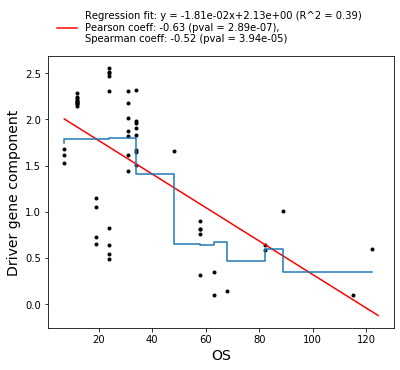

In [260]:
regr(tstats.OS, (tstats.Met_fitness), xlab="OS", ylab="Driver gene component", p1=0.0, p2=1.0)
#plt.ylim(-10,300)
ofile=os.path.join(odir, "DG_model_new_clones.pdf")
plt.savefig(ofile)

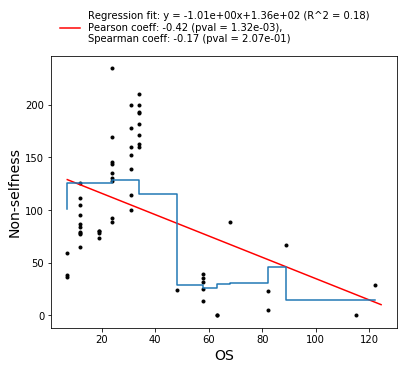

In [247]:
regr(tstats.OS, -(tstats.Met_new_clones_fitness), xlab="OS", ylab="Non-selfness", p1=0.0, p2=1.0, ofile=os.path.join(odir, "Dsmodel_new_clones.pdf"))

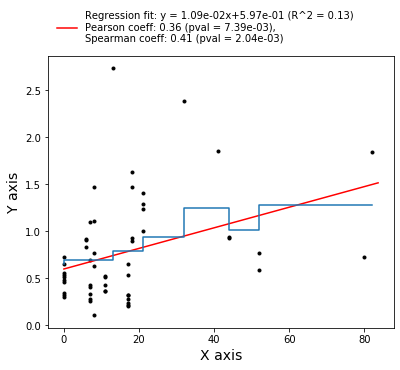

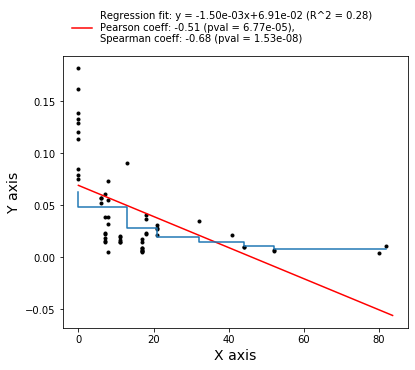

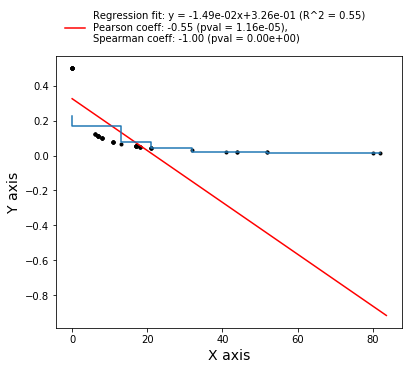

In [138]:
regr(tstats.PFS, tstats.Observed_distance, show_regr=True, p1=0, p2=1.)
regr(tstats.PFS, tstats.Observed_distance/(2*(tstats.PFS+2)), show_regr=True, p1=0.1, p2=1.)
regr(tstats.PFS, 1/(tstats.PFS+2), show_regr=True, p1=0.1, p2=1.)

#plt.ylim(-10,300)

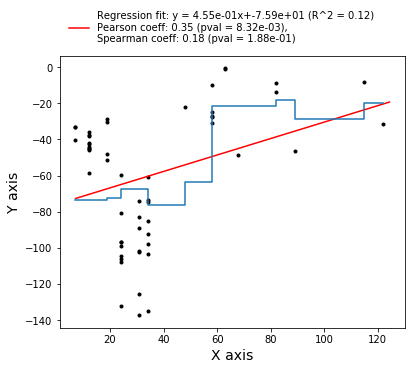

In [237]:
regr(tstats.OS, tstats.Met_fitness, num=4)#,xlab="OS", ylab="Non-selfness", num=5)

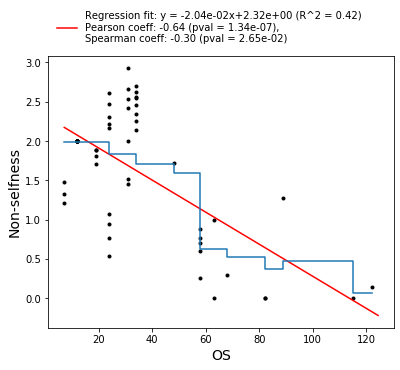

In [189]:
regr(tstats.OS, tstats.Met_new_clones_fitness, num=4, xlab="OS", ylab="Non-selfness")

In [223]:
regr

<function __main__.regr(c_x, c_y, xlab='X axis', ylab='Y axis', ofile='', labels=None, fig=None, ax=None, show_regr=True, p1=0.01, p2=0.99, num=5)>

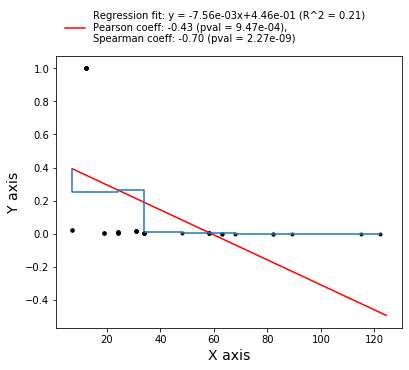

In [92]:
regr(tstats.OS, 1/(tstats.PFS+1)**2)
     

In [13]:
min(tstats[tstats.Cohort!="STS"].OS)

31

In [565]:
tstats["Met_new_clones_fitness_neg"] = -tstats["Met_new_clones_fitness"]
tstats["Met_fitness_neg"] = -tstats["Met_fitness"]

In [566]:
tstats1 = tstats.loc[:, ["Patient", "Cohort", "OS", "PFS", "TP1", "Entropy1"]]
tstats1.columns = ["Patient", "Cohort", "OS", "PFS", "TP1", "Entropy"]
tstats1 = tstats1.drop_duplicates()
tstats2 = tstats.loc[:, ["Patient", "Cohort", "OS", "PFS", "TP2", "Entropy2"]]
tstats2.columns = ["Patient", "Cohort", "OS", "PFS", "TP1", "Entropy"]
tstats2.TP1="Metastatic"
tstats12 = pd.concat([tstats1, tstats2])
tstats12["Cohort2"] = ["LTS" if c>=32 else "STS" for c in tstats12.OS]
tstats12 = pd.concat([tstats12[tstats12.Cohort2=="STS"], tstats12[tstats12.Cohort2!="STS"]])

In [567]:
tstats12

Patient Cohort  OS  PFS         TP1   Entropy Cohort2
9    PAM37    STS  24   21     Primary  2.023498     STS
13   PAM38    STS   7    6     Primary  2.467469     STS
16   PAM41    STS  12    0     Primary  2.371145     STS
31   PAM43    STS  24    8     Primary  2.261331     STS
36   PAM44    STS  19   18     Primary  2.361642     STS
..     ...    ...  ..  ...         ...       ...     ...
50   PAM46    LTS  34   17  Metastatic  2.126450     LTS
51   PAM46    LTS  34   17  Metastatic  2.205603     LTS
52   PAM46    LTS  34   17  Metastatic  2.003714     LTS
53   PAM46    LTS  34   17  Metastatic  1.954302     LTS
54   PAM46    LTS  34   17  Metastatic  2.065586     LTS

[70 rows x 7 columns]

LTS: 22
STS: 33


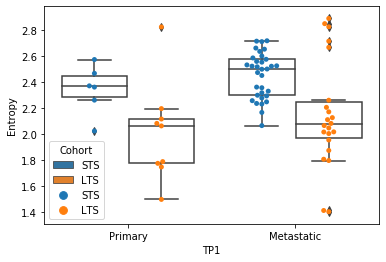

In [568]:
col="Entropy"
#x1=tstats[tstats12.Cohort2=='STS'][col]
#x2=tstats[tstats12.Cohort2!='STS'][col]
#mwstat = scipy.stats.mannwhitneyu(x1, x2)
#print(mwstat)
print("LTS:",sum(tstats.Cohort=="LTS"))
print("STS:",sum(tstats.Cohort!="LTS"))
ax = sns.swarmplot(x="TP1", y=col, data=tstats12, hue="Cohort", 
#                  order=["STS", "LTS"],
                   dodge=True)
ax = sns.boxplot(x="TP1", y=col, data=tstats12, hue="Cohort", 
#                 order=["STS", "LTS"],
                 dodge=True,  boxprops={'facecolor': 'None'})
#plt.savefig(os.path.join("/Users/mluksza/Dropbox/Research/10_PDAC/Modeling/slides/Figures/heterogeneity_both_30_03.pdf"))
plt.show()

In [569]:
prim=tstats12[tstats12.TP1!="Primary"]
x1=prim[prim.Cohort2=="STS"].Entropy
x2=prim[prim.Cohort2!="STS"].Entropy
kstat = scipy.stats.ks_2samp(x1, x2, alternative='two-sided', mode='auto')
mwstat = scipy.stats.mannwhitneyu(x1, x2)
print(mwstat.pvalue, kstat.pvalue)

0.0006380789145391234 5.050694650954313e-06


0.0008581373641534314 0.00622409245550315
LTS: 22
STS: 33


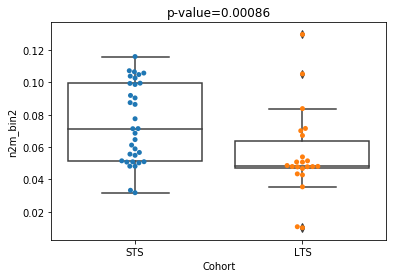

0.059995853949639126 0.09074331916920297
LTS: 22
STS: 33


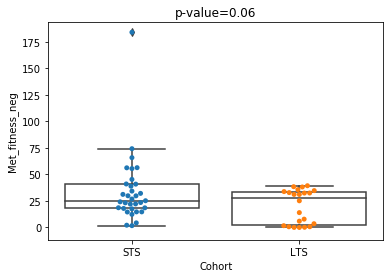

0.0008574757086121059 0.00044634669607968025
LTS: 22
STS: 33


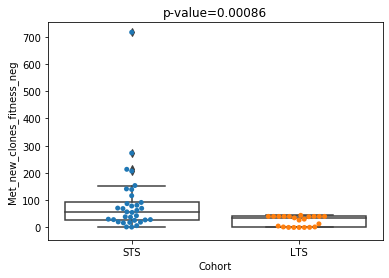

2.6057026064329736e-05 0.00016259244724414756
LTS: 22
STS: 33


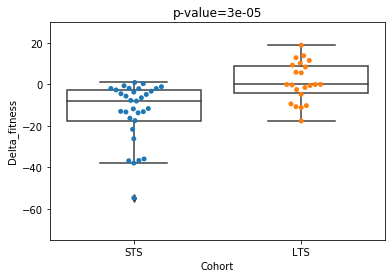

MannwhitneyuResult(statistic=213.0, pvalue=0.004857626684192033)


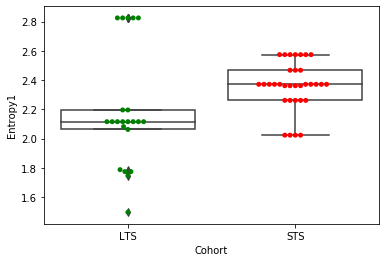

MannwhitneyuResult(statistic=175.0, pvalue=0.0006380789145391234)


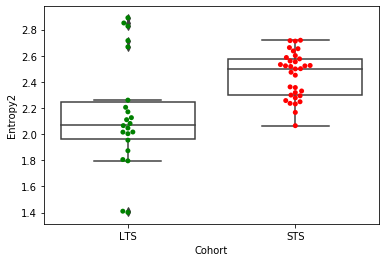

MannwhitneyuResult(statistic=272.0, pvalue=0.059995853949639126)


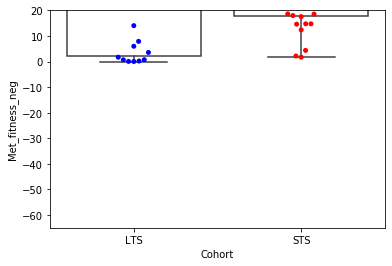

MannwhitneyuResult(statistic=127.0, pvalue=2.6057026064329736e-05)


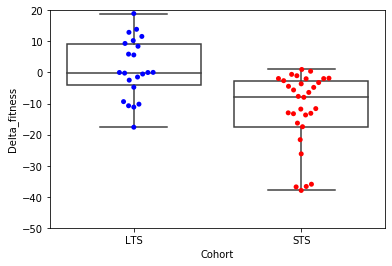

In [570]:
import os
res= []
for osv in range(0,120):
    x1=tstats[tstats.OS>=osv].Met_new_clones_fitness
    x2=tstats[tstats.OS<osv].Met_new_clones_fitness
    if len(x1)>1 and len(x2)>1:
        res.append([osv, scipy.stats.mannwhitneyu(x1, x2)[1]])

#tstats["Cohort"] = ["LTS" if c>=32 else "STS" for c in tstats.OS]
col="n2m_bin2"
x1=tstats[tstats.Cohort=='STS'][col]
x2=tstats[tstats.Cohort!='STS'][col]
mwstat = scipy.stats.mannwhitneyu(x1, x2)
kstat = scipy.stats.ks_2samp(x1, x2, alternative='two-sided', mode='auto')
mwstat = scipy.stats.mannwhitneyu(x1, x2)
print(mwstat.pvalue, kstat.pvalue)
print("LTS:",sum(tstats.Cohort=="LTS"))
print("STS:",sum(tstats.Cohort!="LTS"))
ax = sns.swarmplot(x='Cohort', y=col, data=tstats, 
                   order=["STS", "LTS"],
                   dodge=True)
ax = sns.boxplot(x='Cohort', y=col, data=tstats, 
                 order=["STS", "LTS"],
                 dodge=True,  boxprops={'facecolor': 'None'})
#ax.set_ylim(-10,190)
ax.set_title("p-value="+str(round(mwstat[1],5)))
#plt.savefig(os.path.join("/Users/mluksza/Dropbox/Research/10_PDAC/Modeling/slides/Figures/selection_test_presentation_30_03.pdf"))
plt.show()
        
col='Met_fitness_neg'
x1=tstats[tstats.Cohort=='STS'][col]
x2=tstats[tstats.Cohort!='STS'][col]
kstat = scipy.stats.ks_2samp(x1, x2, alternative='two-sided', mode='auto')
mwstat = scipy.stats.mannwhitneyu(x1, x2)
print(mwstat.pvalue, kstat.pvalue)
print("LTS:",sum(tstats.Cohort=="LTS"))
print("STS:",sum(tstats.Cohort!="LTS"))
ax = sns.swarmplot(x='Cohort', y=col, 
                   order=["STS", "LTS"],
                   data=tstats, dodge=True)
                   #palette=dict(VLTS = 'b', STS = 'r',LTS = 'b'))
ax = sns.boxplot(x='Cohort', y=col, data=tstats, 
                 order=["STS", "LTS"],
                 dodge=True,  boxprops={'facecolor': 'None'})
ax.set_title("p-value="+str(round(mwstat[1],5)))
#plt.savefig(os.path.join("/Users/mluksza/Dropbox/Research/10_PDAC/Modeling/slides/Figures/met_fitness.pdf"))
plt.show()

col='Met_new_clones_fitness_neg'
x1=tstats[tstats.Cohort=='STS'][col]
x2=tstats[tstats.Cohort!='STS'][col]
kstat = scipy.stats.ks_2samp(x1, x2, alternative='two-sided', mode='auto')
mwstat = scipy.stats.mannwhitneyu(x1, x2)
print(mwstat.pvalue, kstat.pvalue)
print("LTS:",sum(tstats.Cohort=="LTS"))
print("STS:",sum(tstats.Cohort!="LTS"))
ax = sns.swarmplot(x='Cohort', y=col, 
                   order=["STS", "LTS"],
                   data=tstats, dodge=True)
                   #palette=dict(VLTS = 'b', STS = 'r',LTS = 'b'))
ax = sns.boxplot(x='Cohort', y=col, data=tstats, 
                 order=["STS", "LTS"],
                 dodge=True,  boxprops={'facecolor': 'None'})
ax.set_title("p-value="+str(round(mwstat[1],5)))
#ax.set_ylim(-10,300)
#plt.savefig(os.path.join("/Users/mluksza/Dropbox/Research/10_PDAC/Modeling/slides/Figures/met_fitness_new_clones.pdf"))
plt.show()


col='Delta_fitness'
x1=tstats[tstats.Cohort=='STS'][col]
x2=tstats[tstats.Cohort!='STS'][col]
kstat = scipy.stats.ks_2samp(x1, x2, alternative='two-sided', mode='auto')
mwstat = scipy.stats.mannwhitneyu(x1, x2)
print(mwstat.pvalue, kstat.pvalue)
print("LTS:",sum(tstats.Cohort=="LTS"))
print("STS:",sum(tstats.Cohort!="LTS"))
ax = sns.swarmplot(x='Cohort', y=col, 
                   order=["STS", "LTS"],
                   data=tstats, dodge=True)
                   #palette=dict(VLTS = 'b', STS = 'r',LTS = 'b'))
ax = sns.boxplot(x='Cohort', y=col, data=tstats, 
                 order=["STS", "LTS"],
                 dodge=True,  boxprops={'facecolor': 'None'})
ax.set_title("p-value="+str(round(mwstat[1],5)))
ax.set_ylim(-75,30)
#plt.savefig(os.path.join("/Users/mluksza/Dropbox/Research/10_PDAC/Modeling/slides/Figures/Delta_fitness.pdf"))
plt.show()



col="Entropy1"
x1=tstats[tstats.Cohort=='STS'][col]
x2=tstats[tstats.Cohort!='STS'][col]
print(scipy.stats.mannwhitneyu(x1, x2))
x = sns.swarmplot(x='Cohort', y=col, data=tstats, dodge=True, palette=dict(LTS = 'g', VLTS = 'b', STS = 'r'))
ax = sns.boxplot(x='Cohort', y=col, data=tstats, dodge=True,  boxprops={'facecolor': 'None'})
plt.show()

x1=tstats[tstats.Cohort=='STS'].Entropy2
x2=tstats[tstats.Cohort!='STS'].Entropy2
print(scipy.stats.mannwhitneyu(x1, x2))
x = sns.swarmplot(x='Cohort', y='Entropy2', data=tstats, dodge=True, palette=dict(LTS = 'g', VLTS = 'b', STS = 'r'))
ax = sns.boxplot(x='Cohort', y='Entropy2', data=tstats, dodge=True,  boxprops={'facecolor': 'None'})
plt.show()

x1=tstats[tstats.Cohort=='STS'].Met_fitness
x2=tstats[tstats.Cohort!='STS'].Met_fitness
print(scipy.stats.mannwhitneyu(x1, x2))
ax = sns.swarmplot(x='Cohort', y='Met_fitness_neg', data=tstats, dodge=True, palette=dict(LTS = 'b', VLTS = 'b', STS = 'r'))
ax = sns.boxplot(x='Cohort', y='Met_fitness_neg', data=tstats, dodge=True,  boxprops={'facecolor': 'None'})
ax.set_ylim(-65,20)
plt.show()

x1=tstats[tstats.Cohort=='STS'].Delta_fitness
x2=tstats[tstats.Cohort!='STS'].Delta_fitness
print(scipy.stats.mannwhitneyu(x1, x2))
ax = sns.swarmplot(x='Cohort', y='Delta_fitness', data=tstats, dodge=True, palette=dict(LTS = 'b', VLTS = 'b', STS = 'r'))
ax = sns.boxplot(x='Cohort', y='Delta_fitness', data=tstats, dodge=True,  boxprops={'facecolor': 'None'})
ax.set_ylim(-50,20)
plt.show()

In [172]:
min(tstats12[tstats12.Cohort2!='STS'].OS)

34

In [187]:
0.075/0.05

1.4999999999999998

MannwhitneyuResult(statistic=272.0, pvalue=0.059995853949639126)


(-100, 0)

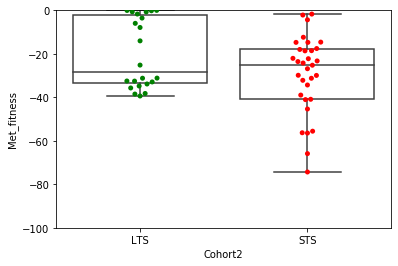

In [37]:
x1=tstats[tstats.Cohort2=='STS'].Met_fitness
x2=tstats[tstats.Cohort2!='STS'].Met_fitness
print(scipy.stats.mannwhitneyu(x1, x2))
ax = sns.swarmplot(x='Cohort2', y='Met_fitness', data=tstats, dodge=True, palette=dict(LTS = 'g', VLTS = 'b', STS = 'r'))
ax = sns.boxplot(x='Cohort2', y='Met_fitness', data=tstats, dodge=True,  boxprops={'facecolor': 'None'})
ax.set_ylim(-100,0)


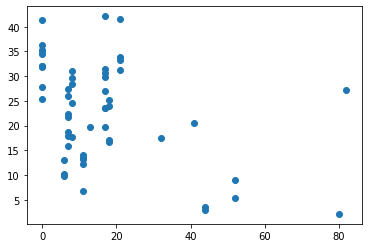

In [121]:
plt.scatter(tstats.PFS, tstats.MolClock2c)

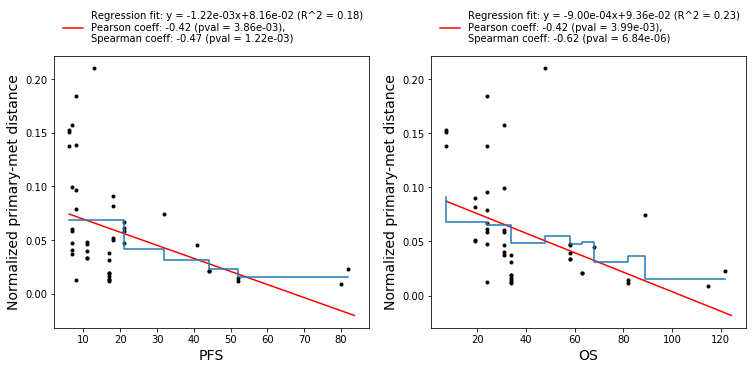

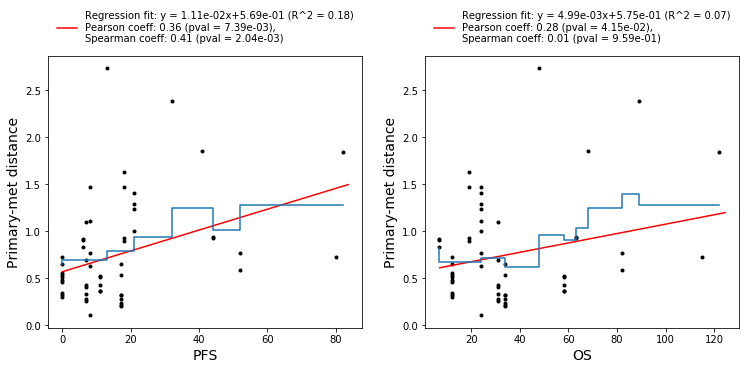

In [80]:
dat0 = [x for x in zip(tstats.Observed_distance, tstats.PFS, tstats.OS) if x[1]>=0]
dat = [x for x in zip(tstats.Observed_distance, tstats.PFS, tstats.OS) if x[1]>0]

#y =np.array(list(tstats.Observed_distance))/(np.array(list(tstats.PFS))+1)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

regr([x[1] for x in dat], [x[0]/x[1] for x in dat], xlab="PFS", ylab="Normalized primary-met distance", 
     fig=fig, ax=ax[0])
regr([x[2] for x in dat], [x[0]/x[1] for x in dat], xlab="OS", ylab="Normalized primary-met distance", 
     fig=fig, ax=ax[1])
plt.savefig(os.path.join(rdir, comb, "prim_met_normalized_distance.pdf"))

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
regr([x[1] for x in dat0], [x[0] for x in dat0], xlab="PFS", ylab="Primary-met distance", 
     fig=fig, ax=ax[0])
regr([x[2] for x in dat0], [x[0] for x in dat0], xlab="OS", ylab="Primary-met distance", 
     fig=fig, ax=ax[1])
plt.savefig(os.path.join(rdir, comb, "prim_met_distance.pdf"))


/Users/mluksza/Dropbox/Research/10_PDAC/Modeling/Data_multi/Results_IG_standardized/cleps_0.0_nested_False


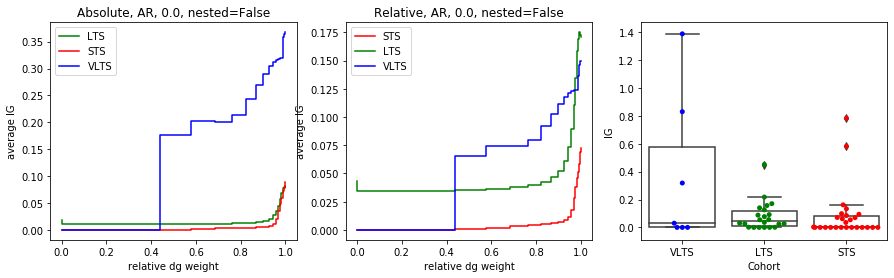

/Users/mluksza/Dropbox/Research/10_PDAC/Modeling/Data_multi/Results_IG_standardized/cleps_0.0_nested_False


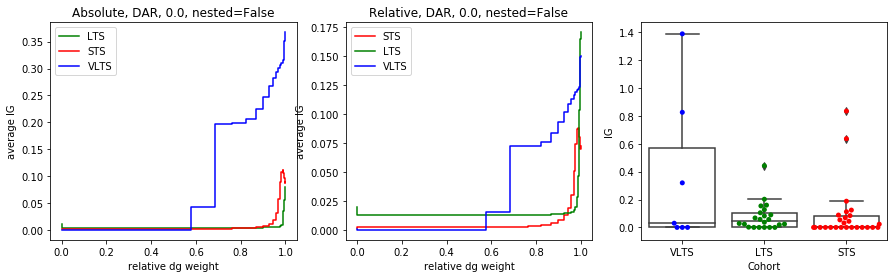

/Users/mluksza/Dropbox/Research/10_PDAC/Modeling/Data_multi/Results_IG_standardized/cleps_0.03_nested_False


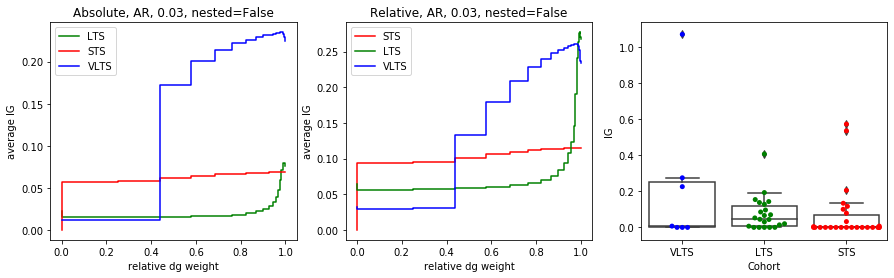

/Users/mluksza/Dropbox/Research/10_PDAC/Modeling/Data_multi/Results_IG_standardized/cleps_0.03_nested_False


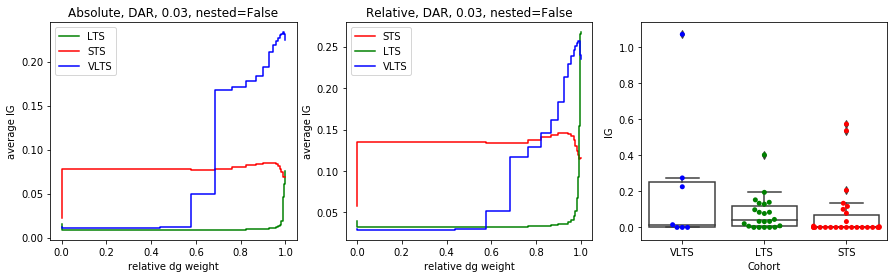

/Users/mluksza/Dropbox/Research/10_PDAC/Modeling/Data_multi/Results_IG_standardized/cleps_0.03_nested_True


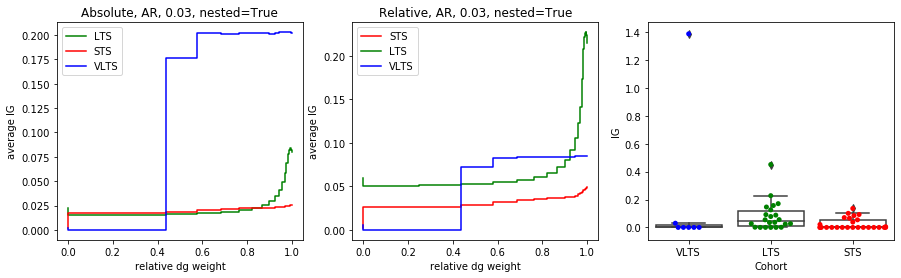

/Users/mluksza/Dropbox/Research/10_PDAC/Modeling/Data_multi/Results_IG_standardized/cleps_0.03_nested_True


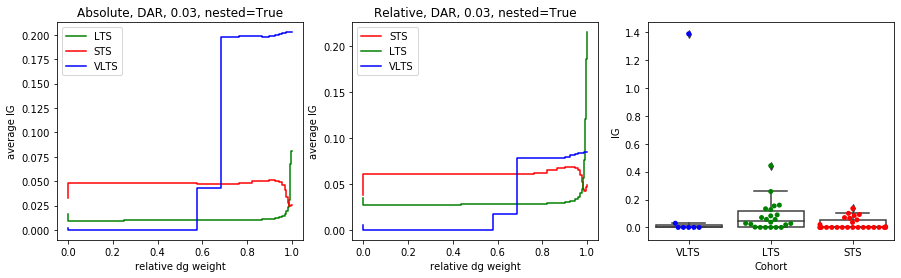

In [259]:
lpars = [(0.0, False), (0.03, False), (0.03, True)]
lmodel = ["AR", "DAR"]
resdir = os.path.join(hdir, "Results_")
for cleps, nested in lpars:
    for model in lmodel:
        rdir = os.path.join(resdir,"cleps_"+str(cleps)+"_nested_"+ str(nested))
        ardirs = glob.glob(os.path.join(rdir, model+"_stan*"))
        print(rdir)
        if len(ardirs) == 0:
            continue
        ptab0 = pd.read_csv(os.path.join(ardirs[0], "predictions_KL.txt"),sep="\t")
        taucols = [c for c, cname in zip(range(len(ptab0.columns)), list(ptab0.columns)) if "tau_" in cname]
        tmin = min(taucols)
        tmax = max(taucols)
        dIG = {}
        dnIG = {}
        dallIG = {}
        dIG_norm = {}
        dnIG_norm = {}
        dallIG_norm = {}
        ptab0 = None
        for ardir in ardirs:
            mname = os.path.basename(ardir)
            wdg = float(mname.split("_")[-1])
            try:
                ptab = pd.read_csv(os.path.join(ardir, "predictions_KL.txt"),sep="\t")
            except:
                continue
            ptab["Cohort"] = [dcohort[p] for p in ptab.Patient]
            obsdist = ptab.Observed_distance
            minkls = [min(ptab.iloc[i, tmin:tmax]) for i in range(ptab.shape[0])]
            minkls_norm = list(np.array(minkls)/np.array(obsdist))
            ptab["min_KL"] = minkls
            ptab["min_KL_norm"] = minkls_norm
            
            ptab["IG"] = ptab.Observed_distance - ptab.min_KL
            ptab["IG_norm"] = ptab.IG/ptab.Observed_distance
            

            dIG[wdg] = np.mean(ptab[ptab.Cohort=="LTS"].IG)#np.mean(ptab[ptab.Cohort!="STS"].min_KL-ptab[ptab.Cohort!="STS"].Observed_distance)
            dnIG[wdg] = np.mean(ptab[ptab.Cohort=="STS"].IG) #np.mean(ptab[ptab.Cohort=="STS"].min_KL)
            dallIG[wdg] = np.mean(ptab[ptab.Cohort=="VLTS"].IG) #np.mean(ptab.min_KL)

            dIG_norm[wdg] = np.mean(ptab[ptab.Cohort=="LTS"].IG_norm) # #np.mean(ptab[ptab.Cohort!="STS"].min_KL_norm)
            dnIG_norm[wdg] = np.mean(ptab[ptab.Cohort=="STS"].IG_norm) #np.mean(ptab[ptab.Cohort=="STS"].min_KL_norm)
            dallIG_norm[wdg] = np.mean(ptab[ptab.Cohort=="VLTS"].IG_norm) #np.mean(ptab.min_KL_norm)

            if wdg == 0.999:
                ptab0 = ptab
#                print(np.mean(ptab0[ptab0.Cohort=="VLTS"].IG_norm), np.mean(ptab0[ptab0.Cohort=="LTS"].IG_norm), np.mean(ptab0[ptab0.Cohort=="STS"].IG_norm))
#                ax = sns.swarmplot(x='Cohort', y='IG', data=ptab0, dodge=True, palette=dict(LTS = 'g', VLTS = 'b', STS = 'r'))
#                ax = sns.boxplot(x='Cohort', y='IG', data=ptab0, dodge=True,  boxprops={'facecolor': 'None'})

        dgs = list(dIG.keys())
        dgs.sort()
        
        fig, ax = plt.subplots(1, 3, figsize=(15,4))
        ax[0].step(dgs, [dIG[dg] for dg in dgs], '-g', label="LTS")
        ax[0].step(dgs, [dnIG[dg] for dg in dgs], '-r', label="STS")
        ax[0].step(dgs, [dallIG[dg] for dg in dgs], '-b', label="VLTS")
        ax[0].legend()
        ax[0].set_xlabel("relative dg weight")
        ax[0].set_ylabel("average IG")
        ax[0].set_title("Absolute, " + model+", "+str(cleps)+", nested="+str(nested))
        
        ax[1].step(dgs, [dnIG_norm[dg] for dg in dgs], '-r', label="STS")
        ax[1].step(dgs, [dIG_norm[dg] for dg in dgs], '-g', label="LTS")
        ax[1].step(dgs, [dallIG_norm[dg] for dg in dgs], '-b', label="VLTS")
        ax[1].set_ylabel("average IG")
        ax[1].set_xlabel("relative dg weight")
        ax[1].legend()
        ax[1].set_title("Relative, " + model+", "+str(cleps)+", nested="+str(nested))
        
#        bins = np.arange(0, 1.1, 0.1)
        #ax[2].scatter([dpfs[pat] for pat in ptab.Patient], ptab.Observed_distance)
        #regr([dpfs[pat] for pat in ptab.Patient], 
        #     ptab.Observed_distance, xlab="X axis", ylab="Y axis", ofile="", labels=None, fig=fig, ax=ax[2])
        #ax[2].set_xlabel("PFS")
        #ax[2].set_ylabel("Primary-Met KL")
        
        ax[2] = sns.swarmplot(x='Cohort', y='IG', data=ptab0, dodge=True, 
                              palette=dict(LTS = 'g', VLTS = 'b', STS = 'r'))
        ax[2] = sns.boxplot(x='Cohort', y='IG', data=ptab0, dodge=True,  boxprops={'facecolor': 'None'})

        #ax[3] = sns.swarmplot(x='Cohort', y='Observed_distance', data=ptab, dodge=True)
        #ax[3] = sns.swarmplot(x='Cohort', y='Observed_distance', data=ptab, dodge=True)
#        ax[2].hist(ptab[ptab.Cohort!="STS"].Observed_distance, bins=bins, alpha=0.5, label='LTS')
#        ax[2].hist(ptab[ptab.Cohort=="STS"].Observed_distance, bins=bins, alpha=0.5, label='STS')
#        ax[2].legend()
        plt.savefig(os.path.join(odir, "cleps_" +model + "_"+ str(cleps).replace("0.", "") + "_nested_"+str(nested)+".pdf"))
        plt.show()

/Users/mluksza/Dropbox/Research/10_PDAC/Modeling/Data_multi/Results_IG_standardized_D/cleps_0.0_nested_False


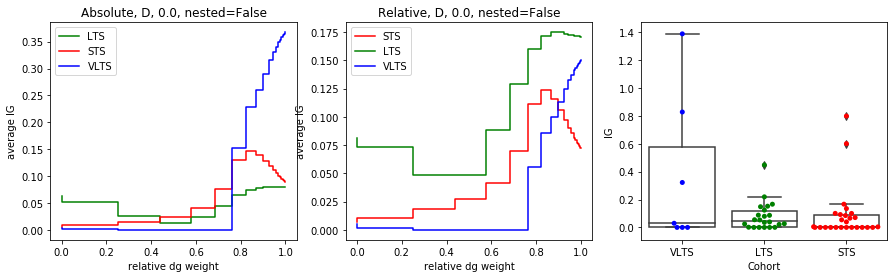

In [264]:
lpars = [(0.0, False)]
lmodel = ["D"]
resdir = os.path.join(hdir, "Results_IG_standardized_D")
for cleps, nested in lpars:
    for model in lmodel:
        rdir = os.path.join(resdir,"cleps_"+str(cleps)+"_nested_"+ str(nested))
        ardirs = glob.glob(os.path.join(rdir, model+"_stan*"))
        print(rdir)
        if len(ardirs) == 0:
            continue
        ptab0 = pd.read_csv(os.path.join(ardirs[0], "predictions_KL.txt"),sep="\t")
        taucols = [c for c, cname in zip(range(len(ptab0.columns)), list(ptab0.columns)) if "tau_" in cname]
        tmin = min(taucols)
        tmax = max(taucols)
        dIG = {}
        dnIG = {}
        dallIG = {}
        dIG_norm = {}
        dnIG_norm = {}
        dallIG_norm = {}
        ptab0 = None
        for ardir in ardirs:
            mname = os.path.basename(ardir)
            wdg = float(mname.split("_")[-1])
            try:
                ptab = pd.read_csv(os.path.join(ardir, "predictions_KL.txt"),sep="\t")
            except:
                continue
            ptab["Cohort"] = [dcohort[p] for p in ptab.Patient]
            obsdist = ptab.Observed_distance
            minkls = [min(ptab.iloc[i, tmin:tmax]) for i in range(ptab.shape[0])]
            minkls_norm = list(np.array(minkls)/np.array(obsdist))
            ptab["min_KL"] = minkls
            ptab["min_KL_norm"] = minkls_norm
            
            ptab["IG"] = ptab.Observed_distance - ptab.min_KL
            ptab["IG_norm"] = ptab.IG/ptab.Observed_distance
            

            dIG[wdg] = np.mean(ptab[ptab.Cohort=="LTS"].IG)#np.mean(ptab[ptab.Cohort!="STS"].min_KL-ptab[ptab.Cohort!="STS"].Observed_distance)
            dnIG[wdg] = np.mean(ptab[ptab.Cohort=="STS"].IG) #np.mean(ptab[ptab.Cohort=="STS"].min_KL)
            dallIG[wdg] = np.mean(ptab[ptab.Cohort=="VLTS"].IG) #np.mean(ptab.min_KL)

            dIG_norm[wdg] = np.mean(ptab[ptab.Cohort=="LTS"].IG_norm) # #np.mean(ptab[ptab.Cohort!="STS"].min_KL_norm)
            dnIG_norm[wdg] = np.mean(ptab[ptab.Cohort=="STS"].IG_norm) #np.mean(ptab[ptab.Cohort=="STS"].min_KL_norm)
            dallIG_norm[wdg] = np.mean(ptab[ptab.Cohort=="VLTS"].IG_norm) #np.mean(ptab.min_KL_norm)

            if wdg == 0.999:
                ptab0 = ptab
#                print(np.mean(ptab0[ptab0.Cohort=="VLTS"].IG_norm), np.mean(ptab0[ptab0.Cohort=="LTS"].IG_norm), np.mean(ptab0[ptab0.Cohort=="STS"].IG_norm))
#                ax = sns.swarmplot(x='Cohort', y='IG', data=ptab0, dodge=True, palette=dict(LTS = 'g', VLTS = 'b', STS = 'r'))
#                ax = sns.boxplot(x='Cohort', y='IG', data=ptab0, dodge=True,  boxprops={'facecolor': 'None'})

        dgs = list(dIG.keys())
        dgs.sort()
        
        fig, ax = plt.subplots(1, 3, figsize=(15,4))
        ax[0].step(dgs, [dIG[dg] for dg in dgs], '-g', label="LTS")
        ax[0].step(dgs, [dnIG[dg] for dg in dgs], '-r', label="STS")
        ax[0].step(dgs, [dallIG[dg] for dg in dgs], '-b', label="VLTS")
        ax[0].legend()
        ax[0].set_xlabel("relative dg weight")
        ax[0].set_ylabel("average IG")
        ax[0].set_title("Absolute, " + model+", "+str(cleps)+", nested="+str(nested))
        
        ax[1].step(dgs, [dnIG_norm[dg] for dg in dgs], '-r', label="STS")
        ax[1].step(dgs, [dIG_norm[dg] for dg in dgs], '-g', label="LTS")
        ax[1].step(dgs, [dallIG_norm[dg] for dg in dgs], '-b', label="VLTS")
        ax[1].set_ylabel("average IG")
        ax[1].set_xlabel("relative dg weight")
        ax[1].legend()
        ax[1].set_title("Relative, " + model+", "+str(cleps)+", nested="+str(nested))
        
#        bins = np.arange(0, 1.1, 0.1)
        #ax[2].scatter([dpfs[pat] for pat in ptab.Patient], ptab.Observed_distance)
        #regr([dpfs[pat] for pat in ptab.Patient], 
        #     ptab.Observed_distance, xlab="X axis", ylab="Y axis", ofile="", labels=None, fig=fig, ax=ax[2])
        #ax[2].set_xlabel("PFS")
        #ax[2].set_ylabel("Primary-Met KL")
        
        ax[2] = sns.swarmplot(x='Cohort', y='IG', data=ptab0, dodge=True, 
                              palette=dict(LTS = 'g', VLTS = 'b', STS = 'r'))
        ax[2] = sns.boxplot(x='Cohort', y='IG', data=ptab0, dodge=True,  boxprops={'facecolor': 'None'})

        #ax[3] = sns.swarmplot(x='Cohort', y='Observed_distance', data=ptab, dodge=True)
        #ax[3] = sns.swarmplot(x='Cohort', y='Observed_distance', data=ptab, dodge=True)
#        ax[2].hist(ptab[ptab.Cohort!="STS"].Observed_distance, bins=bins, alpha=0.5, label='LTS')
#        ax[2].hist(ptab[ptab.Cohort=="STS"].Observed_distance, bins=bins, alpha=0.5, label='STS')
#        ax[2].legend()
        plt.savefig(os.path.join(odir, "cleps_" +model + "_"+ str(cleps).replace("0.", "") + "_nested_"+str(nested)+".pdf"))
        plt.show()

In [100]:
dgs = np.arange(0.991,1,0.001)
dgs

array([0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999,
       1.   ])

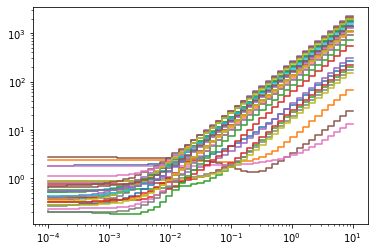

In [138]:
ltstab = ptab[ptab.Cohort!="STS"]
taus = [float(x.split("_")[1]) for x in list(ptab.columns)[11:61]]
for i in range(ltstab.shape[0]):
    plt.step(taus, ltstab.iloc[i,11:61])
plt.yscale("log")
plt.xscale("log")

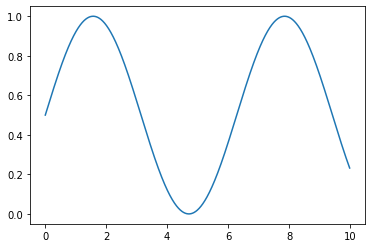

In [676]:
x=np.arange(0, 10, 0.01)
plt.plot(x, (np.sin(x)+1)/2)

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]


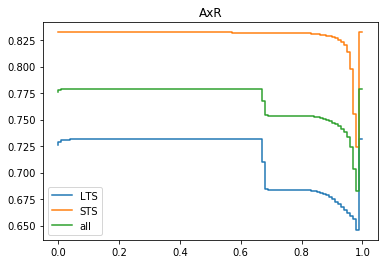

In [30]:
dgs = list(dIG.keys())
dgs.sort()
print(dgs)
plt.step(dgs, [dIG[dg] for dg in dgs], label="LTS")
plt.step(dgs, [dnIG[dg] for dg in dgs], label="STS")
plt.step(dgs, [dallIG[dg] for dg in dgs], label="all")
plt.title("AxR")
plt.legend()
plt.savefig(odir+"/cleps_003_not_nested_KL_min_AR.pdf")
plt.show()

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]


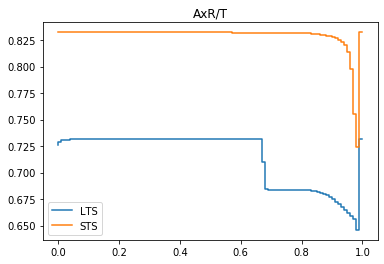

In [155]:
dgs = list(dIG.keys())
dgs.sort()
print(dgs)
plt.step(dgs, [dIG[dg] for dg in dgs], label="LTS")
plt.step(dgs, [dnIG[dg] for dg in dgs], label="STS")
plt.title("AxR/T")
plt.legend()
plt.savefig(odir+"/KL_min_ART.pdf")

In [29]:
zach = pd.read_csv(os.path.join(hdir,"met_av_tum_fitness_numbers_tau_0.csv"))
me = pd.read_csv(os.path.join(hdir,"fitness_stats_2.txt"), sep="\t")
dzach = {}
dpzach = {}
dmzach = defaultdict(list)
for r in zach.itertuples():
    dzach[r.Patient+"_"+r.Sample] = r.AR_dgw0
    if r.Sample == "Primary":
        dpzach[r.Patient] = r.AR_dgw0
    else:
        dmzach[r.Patient].append(r.AR_dgw0)

dme = {}
dpme = {}
dmme = defaultdict(list)
for r in me.itertuples():
    dme[r.Patient+"_"+r.TimePoint] = r.AR_dgw0
    if r.TimePoint == "Primary":
        dpme[r.Patient] = r.AR_dgw0
    else:
        dmme[r.Patient].append(r.AR_dgw0)


In [56]:

l = [ [(pat, met-dpzach[pat]) for met in dmzach[pat]] for pat in dpme]
lzach = [x for elem in l for x in elem]

l = [[(pat, met -dpzach[pat]) for met in dmzach[pat]] for pat in dpme]
lme = [x for elem in l for x in elem]

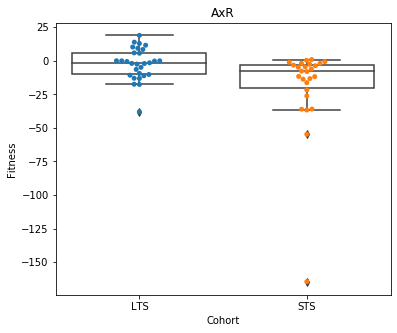

In [57]:
import seaborn as sns
dzach = pd.DataFrame([[pat, dcohort[pat], fit] for pat, fit in lzach])
dzach.columns = ["Patient", "Cohort", "Fitness"]
dzach.Cohort = [coh.replace("V","") for coh in dzach.Cohort]
fig = plt.figure(figsize=(6, 5))
        # ax = sns.boxplot(x = 'Cohort', y = 'Mean model distance', hue = 'Survival', data = c_data, saturation = 0, dodge = True)
ax = sns.swarmplot(x='Cohort', y='Fitness', data=dzach, dodge=True)
sns.boxplot(x='Cohort', y='Fitness', data=dzach,
                    boxprops={'facecolor': 'None'})
ax.set_title("AxR")
plt.savefig(os.path.join(hdir,"swarmplot_zach.pdf"))



# Initialization

In [6]:
import argparse
import json
import os
from collections import defaultdict

import pandas as pd
import numpy as np

from cio.fitness.ARNeoantigenQuality import ARNeoantigenQuality
from cio.fitness.HLAweights import HLAweights
from cio.fitness.HWTHLAweights import HWTHLAweights
from cio.fitness.ImmuneCloneFitness import ImmuneCloneFitness
from cio.fitness.DGCloneFitness import DGCloneFitness
from cio.tree.mutation.Neoantigen import Neoantigen
from cio.util.Analysis import Analysis
from cio.util.Utils import Utils

Utils.a = 26.
Utils.k = 1.
Neoantigen.WEPS = 0.0
tau = 0.04
npos = "1-9"

anl = Analysis()


anl.npos = npos
HLAW = HLAweights(npos)

odir = os.path.join(hdir, "Results")
if not os.path.exists(odir):
    os.mkdir(odir)
configpath = os.path.join(hdir, "config.json")
with open(configpath, 'r') as fp:
    config = json.load(fp)

mappingfile = os.path.join(hdir, "mapping.json")

with open(mappingfile, 'r') as fp:
    mapping = json.load(fp)

anl.ntrees = 5

alndir = os.path.join(hdir, config["aln_dir"])
iedbfasta = None
iedbfasta = os.path.join(alndir, "enemy.fasta")

#anl.initialize_config(hdir, config, mapping, kd_thr=500)

In [7]:
dOS = {}
dpfs = {}
dcohort = {}
dtype = {}
for el in mapping:
    dOS[el['name']] = el['OS']
    dpfs[el['name']] = el['PFS']
    dcohort[el['name']] = el['cohort']
    dtype[el['name']] = el['type']

NameError: name 'variance' is not defined

## Shared mutations

In [8]:
mids = [mut.id for pat in anl.patients.values() for mut in pat.samples[0].mutations.values() if mut.substitution!=""]
umids = list(set(mids))
mcounts = [mids.count(mid) for mid in umids]

mut2gene = {}
for pat in anl.patients.values():
    sample = pat.samples[0].mutations.values()
    for mut in pat.samples[0].mutations.values():
        mut2gene[mut.id] = mut.gene
        
mcounted = list(zip(umids, mcounts))
mcounted.sort(key=lambda x: -x[1])
dmcounted = {}
for mid, mc in mcounted:
    dmcounted[mid] = mc

mumids = [mid for mid in umids if dmcounted[mid]>=5]

## Fitness model

In [9]:
# set neoantigen quality model
Qmodel = ARNeoantigenQuality(alndir=alndir, iedbfasta=iedbfasta)
Qmodel.M = 1.
anl.set_neantigen_quality_model(Qmodel)


In [25]:
# set fitness model
aggrfun = max
aggrname = str(aggrfun).split(" ")[-1].replace(">", "")

fitnessModelComp1 = ImmuneCloneFitness(aggrfun=aggrfun)
anl.set_fitness_model_component(fitnessModelComp1, "immune", 1)

# compute neoantigen qualities
anl.compute_neoantigen_qualities(a=Utils.a, k=Utils.k, HLAW=HLAW,
                                         include_A=True, include_R=True, kdthr=None, KDnormalize=1)


fitnessModelComp2 = DGCloneFitness(genes=['TP53', 'KRAS'])
anl.set_fitness_model_component(fitnessModelComp2, "DG", 6)


# compute fitness of all clones
anl.compute_node_fitness()

## KRAS

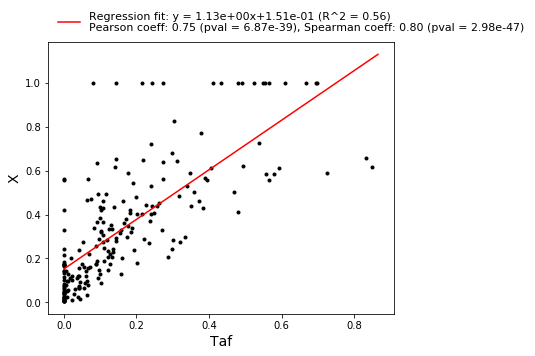

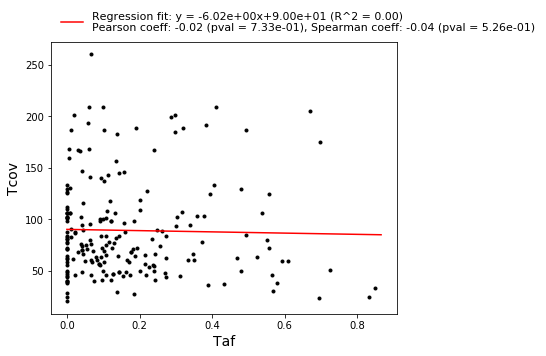

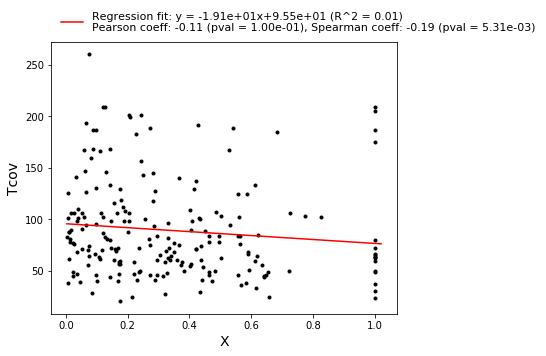

In [50]:
#regr([mut.Tcov for mut in anl.get_mutations() if mut.gene == "KRAS"], [mut.Taf for mut in anl.get_mutations() if mut.gene == "KRAS"], 
#    xlab="Tcov", ylab="Taf")

dat=[[],[],[]]
for sample in anl.get_samples():
    muts = [mut for mut in sample.mutations.values() if mut.gene=="KRAS"]
    Tafs = [mut.Taf for mut in muts]
    Tcov = [mut.Tcov for mut in muts]
    X = [sample.get_mutation_frequency(mut.id) for mut in muts]
    dat[0] += Tafs
    dat[1] += X
    dat[2] += Tcov
XKRAS = dat[1]
with PdfPages(os.path.join(odir, "KRAS_frequencies.pdf")) as pdf:

    #fig, ax = plt.subplots(1, 3, figsize=(14,4))
    regr(dat[0], dat[1], xlab="Taf", ylab="X")
    pdf.savefig()
    plt.savefig(os.path.join(odir, "KRAS_frequencies_a.pdf"))
    plt.show()
    regr(dat[0], dat[2], xlab="Taf", ylab="Tcov")
    pdf.savefig()
    plt.savefig(os.path.join(odir, "KRAS_frequencies_b.pdf"))
    plt.show()
    regr(dat[1], dat[2], xlab="X", ylab="Tcov")
    pdf.savefig()
    plt.savefig(os.path.join(odir, "KRAS_frequencies_c.pdf"))
    plt.show()
#plt.xlabel("Tcov")
#plt.ylabel("")
#plt.scatter([mut.Tcov for mut in anl.get_mutations() if mut.gene == "TP53"], [mut.Taf for mut in anl.get_mutations() if mut.gene == "TP53"])

In [7]:
 np.arange(0,1.01,0.05)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

## TP53

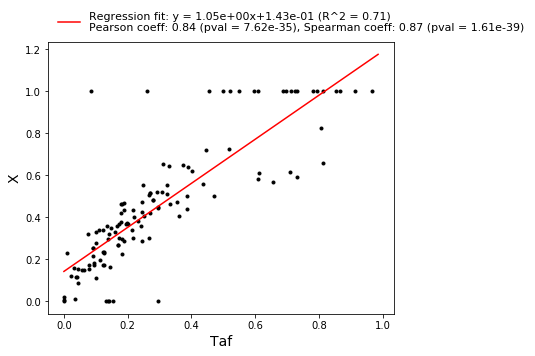

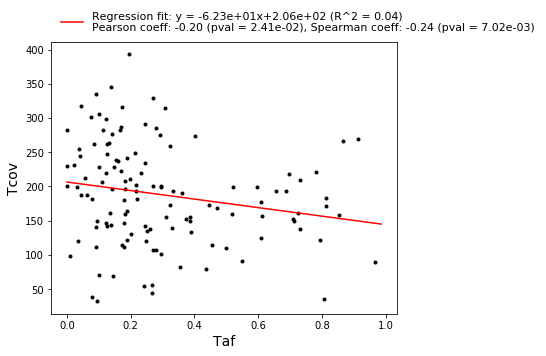

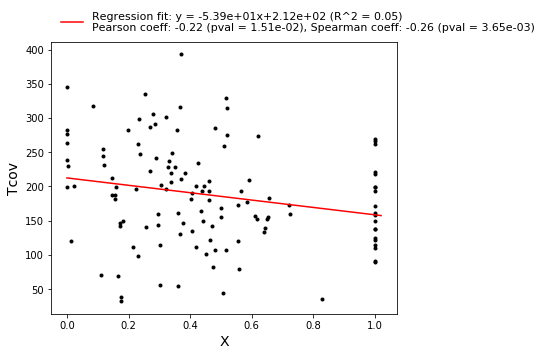

In [49]:
#regr([mut.Tcov for mut in anl.get_mutations() if mut.gene == "TP53"], [mut.Taf for mut in anl.get_mutations() if mut.gene == "TP53"], 
#    xlab="Tcov", ylab="Taf")

dat=[[],[],[]]
for sample in anl.get_samples():
    muts = [mut for mut in sample.mutations.values() if mut.gene=="TP53"]
    Tafs = [mut.Taf for mut in muts]
    Tcov = [mut.Tcov for mut in muts]
    X = [sample.get_mutation_frequency(mut.id) for mut in muts]
    dat[0] += Tafs
    dat[1] += X
    dat[2] += Tcov
XTP53 = dat[1]
with PdfPages(os.path.join(odir, "TP53_frequencies.pdf")) as pdf:

    #fig, ax = plt.subplots(1, 3, figsize=(14,4))
    regr(dat[0], dat[1], xlab="Taf", ylab="X")
    pdf.savefig()
    plt.savefig(os.path.join(odir, "TP53_frequencies_a.pdf"))
    plt.show()
    regr(dat[0], dat[2], xlab="Taf", ylab="Tcov")
    pdf.savefig()
    plt.savefig(os.path.join(odir, "TP53_frequencies_b.pdf"))
    plt.show()
    regr(dat[1], dat[2], xlab="X", ylab="Tcov")
    pdf.savefig()
    plt.savefig(os.path.join(odir, "TP53_frequencies_c.pdf"))
    plt.show()
#plt.xlabel("Tcov")
#plt.ylabel("")
#plt.scatter([mut.Tcov for mut in anl.get_mutations() if mut.gene == "TP53"], [mut.Taf for mut in anl.get_mutations() if mut.gene == "TP53"])

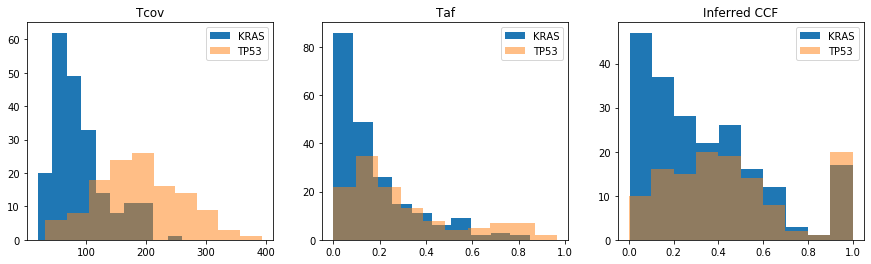

In [46]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))
ax[0].hist([mut.Tcov for mut in anl.get_mutations() if mut.gene == "KRAS"], label="KRAS")
ax[0].hist([mut.Tcov for mut in anl.get_mutations() if mut.gene == "TP53"],alpha=0.5, label="TP53")
ax[0].set_title("Tcov")
ax[0].legend()

ax[1].hist([mut.Taf for mut in anl.get_mutations() if mut.gene == "KRAS"], label="KRAS")
ax[1].hist([mut.Taf for mut in anl.get_mutations() if mut.gene == "TP53"],alpha=0.5, label="TP53")
ax[1].set_title("Taf")
ax[1].legend()

ax[2].hist(XKRAS, label="KRAS")
ax[2].hist(XTP53, alpha=0.5, label="TP53")
ax[2].set_title("Inferred CCF")
ax[2].legend()

plt.savefig(os.path.join(odir, "Stats_KRAS_TP53_histogram.pdf"))

# Frequency thresholds for shared clones

Establish which clones we should consider as new in the metastatic samples.

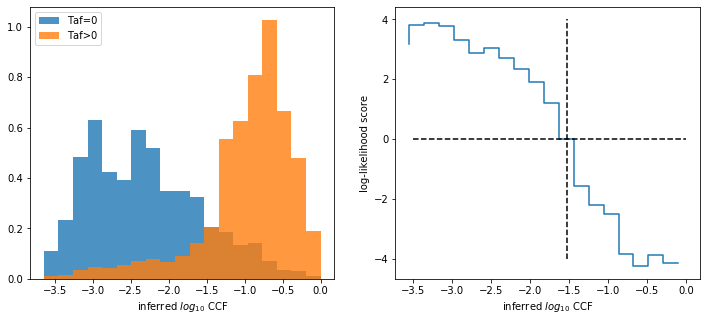

In [190]:
allzeroes = []
fn = []
for patient in anl.patients.values():
    freqs = patient.get_mutation_frequencies(by_sample=True)
    freqs = freqs.set_index('Mutation_ID')
    #snames = list(freqs.columns)[1:]
    snames = [sample.name for sample in patient.samples]
    for sample in patient.samples:
        x = [sample.mutations[mid].Taf for mid in freqs.index]
        cx = [freqs.loc[mid, sample.name] for mid in freqs.index]
        zeroes = [r[1] for r in zip(x, cx) if r[0]==0]
        allzeroes += zeroes
        fn += [r[1] for r in zip(x, cx) if r[0] != 0]
        
allzeroes = np.array(allzeroes)
fn = np.array(fn)

fig, ax = plt.subplots(1, 2, figsize=(12,5))
bins=list(np.log10(allzeroes))+list(np.log10(fn))
bins = list(set(bins))
bins.sort()
bins = np.linspace(min(bins), max(bins), 20)
mbins = [np.mean(x) for x in list(zip(bins[1:], bins[:-1]))]
hi1=ax[0].hist(np.log10(allzeroes),bins=bins, density=True, label="Taf=0", alpha=0.8)
hi2=ax[0].hist(np.log10(fn), bins=bins,density=True, label="Taf>0", alpha=0.8)
ax[0].legend()
ax[0].set_xlabel("inferred "+r"$log_{10}$"+" CCF")
ax[1].step(mbins, np.log2(hi1[0]/hi2[0]))
ax[1].set_xlabel("inferred "+r"$log_{10}$"+" CCF")
ax[1].set_ylabel("log-likelihood score")
ax[1].plot([np.log10(0.03), np.log10(0.03)], [-4,4], '--k')
ax[1].plot([-3.5,0], [0,0], '--k')
plt.savefig(os.path.join(odir, "shared_clones_ccf_threshold.pdf"))

## KRAS

In [ ]:
allzeroes = []
fn = []
for patient in anl.patients.values():
    freqs = patient.get_mutation_frequencies(by_sample=True)
    freqs = freqs.set_index('Mutation_ID')
    #snames = list(freqs.columns)[1:]
    snames = [sample.name for sample in patient.samples]
    for sample in patient.samples:
        x = [sample.mutations[mid].Taf for mid in freqs.index]
        cx = [freqs.loc[mid, sample.name] for mid in freqs.index]
        zeroes = [r[1] for r in zip(x, cx) if r[0]==0]
        allzeroes += zeroes
        fn += [r[1] for r in zip(x, cx) if r[0] != 0]
        
allzeroes = np.array(allzeroes)
fn = np.array(fn)

fig, ax = plt.subplots(1, 2, figsize=(12,5))
bins=list(np.log10(allzeroes))+list(np.log10(fn))
bins = list(set(bins))
bins.sort()
bins = np.linspace(min(bins), max(bins), 20)
mbins = [np.mean(x) for x in list(zip(bins[1:], bins[:-1]))]
hi1=ax[0].hist(np.log10(allzeroes),bins=bins, density=True, label="Taf=0", alpha=0.8)
hi2=ax[0].hist(np.log10(fn), bins=bins,density=True, label="Taf>0", alpha=0.8)
ax[0].legend()
ax[0].set_xlabel("inferred "+r"$log_{10}$"+" CCF")
ax[1].step(mbins, np.log2(hi1[0]/hi2[0]))
ax[1].set_xlabel("inferred "+r"$log_{10}$"+" CCF")
ax[1].set_ylabel("log-likelihood score")
ax[1].plot([np.log10(0.03), np.log10(0.03)], [-4,4], '--k')
ax[1].plot([-3.5,0], [0,0], '--k')
plt.savefig(os.path.join(odir, "shared_clones_ccf_threshold.pdf"))

# Trunkality and seeding

Compare OS to the seeding patterns of the met samples. 
Trunkality score is computed as the average Primary tree CCF using frequencies from the met tree.

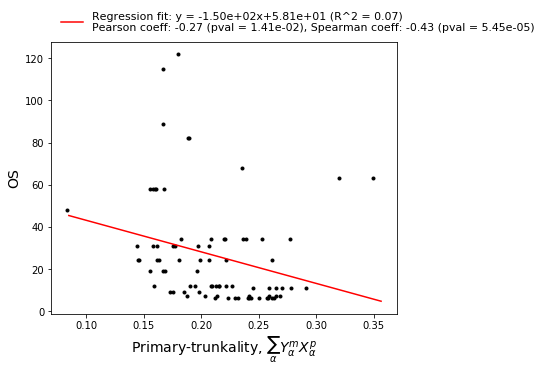

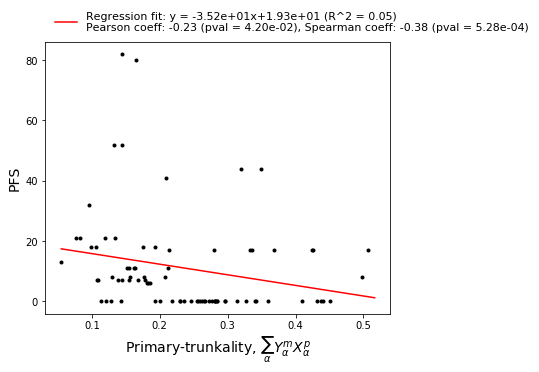

In [51]:
trunkality = []
for patient in list(anl.patients.values()):
    tpairs = patient.get_time_pairs_by_prefix("Prim", "Met")
    for tp1, tp2 in tpairs:
        sc1, sc2 = patient.trunkality(tp1, tp2, use_shared=True, eps=0.03)
        trunkality.append((sc2, patient.OS))
        
regr([x[0] for x in trunkality], [x[1] for x in trunkality], "Primary-trunkality, "+r"$\sum_\alpha Y_\alpha^m X_{\alpha}^p$", "OS", os.path.join(odir, "trunkality_vs_OS.pdf"))
plt.savefig(os.path.join(odir, "Trunkality_OS.pdf"))

trunkality = []
for patient in list(anl.patients.values()):
    tpairs = patient.get_time_pairs_by_prefix("Prim", "Met")
    for tp1, tp2 in tpairs:
        sc1, sc2 = patient.trunkality(tp1, tp2, use_shared=False, eps=0.0)
        trunkality.append((sc2, patient.PFS))

regr([x[0] for x in trunkality], [x[1] for x in trunkality], "Primary-trunkality, "+r"$\sum_\alpha Y_\alpha^m X_{\alpha}^p$", "PFS", os.path.join(odir, "trunkality_vs_PFS.pdf"))


$\sum_\alpha Y_\alpha^m X_{\alpha}^p$

$\sum_\alpha Y_\alpha^m X_{\alpha}^m$


$\sum_{\alpha \in \rm{old}} Y_\alpha^m X_{\alpha}^p$ + $\sum_{\alpha \in \rm{new}}  Y_\alpha^m X_{p(\alpha)}^p$

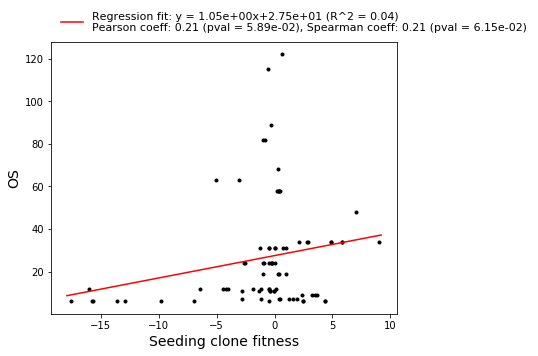

In [22]:
seeding = []

for patient in list(anl.patients.values()):
    tpairs = patient.get_time_pairs_by_prefix("Prim", "Met")
    for tp1, tp2 in tpairs:
        seed_score = lambda node: node.rfitness
        sc1, sc2 = patient.average_function(tp1, tp2, seed_score, use_shared=False, eps=0.03)
        seeding.append((sc2, patient.OS))
        
        
regr([x[0] for x in seeding], [x[1] for x in seeding], "Seeding clone fitness", "OS")


# Clone fitness correlates

In [11]:
sigmas = [round(x, 2) for x in np.log10(np.logspace(0, 100, 50))]

In [26]:
tp_pref1="Prim"
tp_pref2="Met"
dcinfo = {}

with PdfPages(os.path.join(odir, "clone_fitness.pdf")) as pdf:
    for patient in anl.patients.values():
        if dtype[patient.name] == "Synchronous":
            continue
        #print(patient.name)
        tpairs = patient.get_time_pairs_by_prefix(tp_pref1, tp_pref2)
        for tp1, tp2 in tpairs:
            cinfo = patient.get_clone_info(tp1, tp2, gene_list=['TP53', 'KRAS', 'CDKN2A','SMAD4'], mutation_list=mumids)
            dcinfo[patient.name+"_"+tp1+"_"+tp2] = cinfo
            for row in cinfo.itertuples(index=False):
                if row.X1<0.03:
                    col='red'
                    alpha=1
                else:
                    col='blue'
                    alpha=row.X2
                #plt.scatter(np.log(row.X2/row.X1), row.aveF,alpha=alpha,color=col, s=40*row.Weight)
                #plt.scatter(np.log(row.X2/row.X1)/dpfs[patient.name],getattr( row, 'aveF'), alpha=alpha,color=col, s=40*row.Weight)
    ##            plt.ylim(-0.05, 1.05)
            #coeff = np.corrcoef(np.log(cinfo.X2/cinfo.X1), (cinfo.aveF))[0,1]
            #coeff = round(coeff, 3)
            #plt.title(patient.name+" "+tp1+" "+tp2+ " " + str(coeff) + " " + str(dOS[patient.name]))
            #pdf.savefig()
            #plt.show()
            #regr(np.log(cinfo.X2/cinfo.X1), (cinfo.aveF))
            #plt.show()
binfo = pd.concat(dcinfo.values())


In [35]:
binfo.loc[:,["X1","X2","aveF"]]

X1        X2        aveF
0   1.000000  1.000000    3.797774
1   0.681364  0.462703    2.929642
2   0.318636  0.537297   -5.267882
3   0.353988  0.195888    2.929642
4   0.234912  0.128042    2.929642
..       ...       ...         ...
71  0.045445  0.110684   13.010667
72  0.022895  0.031931   13.010667
73  0.109127  0.160578  -60.861132
74  0.102951  0.001378 -159.573268
75  0.069898  0.000907 -159.573268

[5272 rows x 3 columns]

aveF


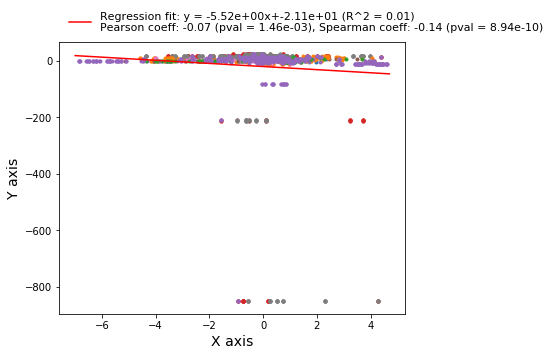

In [27]:
for col in list(binfo.columns)[10:]:
    if col!="aveF":
        continue 

    lts = binfo[[dcohort[p.Patient]=="STS" and p.X1>0.01   for p in binfo.itertuples()]]
    x1 = list(getattr(lts, col))
#    x2 = list([np.log2(row.X2/row.X1)/(1+dpfs[row.Patient]) for row in lts.itertuples()])
    x2 = list([np.log2(row.X2/row.X1) for row in lts.itertuples()])
    print(col)
    regr(x2, x1, labels=list(binfo.Patient))    
    plt.savefig(os.path.join(odir, "CombinedObsF_"+col+"_STS.pdf"))
    plt.show()

aveF


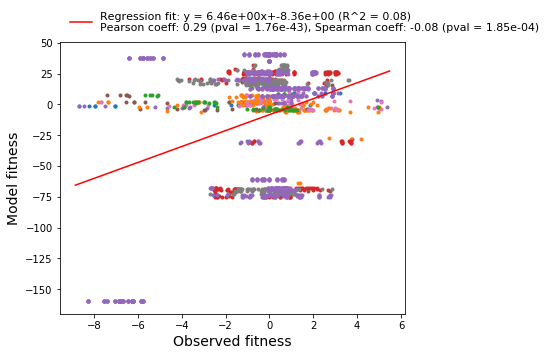

In [28]:
for col in list(binfo.columns)[10:]:
    if col!="aveF":
        continue
    #if col not in ["Nload", "aveNload", "aveF", "F"]:
    #    continue
    lts = binfo[[dcohort[p.Patient]!="STS" and p.X1>0.01   for p in binfo.itertuples()]]
    x1 = list(getattr(lts, col))
    x2 = list([np.log2(row.X2/row.X1)/dpfs[row.Patient] for row in lts.itertuples()])

    x2 = list([np.log2(row.X2/row.X1) for row in lts.itertuples()])
    
    print(col)
    regr(x2, x1, labels=list(binfo.Patient), xlab="Observed fitness", ylab="Model fitness")  
    plt.savefig(os.path.join(odir, "CombinedObsF_"+col+"_LTS.pdf"))
    plt.show()

In [19]:
anl.Fmodel.weights

{'immune': 0.1, 'DG': 0.6}

# Predictability

In [11]:
for patient in list(anl.patients.values())[:2]:
    tpairs = patient.get_time_pairs_by_prefix("Prim", "Met")
    print(patient.name)
    for tp1, tp2 in [tpairs[0]]:
        d = patient.observed_distance(tp1, tp2, eps=0.03)
        print(d)


11-LTS
(0.5622178918727211, 0.39245723734523796, 1.1897947001482225)
16-LTS
(0.4001496196463537, 0.35989110647029987, 1.7988342683270033)


In [25]:
emds = []
for patient in list(anl.patients.values()):
    tpairs = patient.get_time_pairs_by_prefix("Prim", "Met")
    print(patient.name)
    for tp1, tp2 in [tpairs[0]]:
        #eps = np.linspace(0, 0.1, 100)
        eps = [0.01]
        d = [patient.observed_distance(tp1, tp2, eps=ep) for ep in eps]
        emds.append((d[0][0], d[0][2], patient.nclones()))
#        plt.plot(eps, d)
#        plt.show()


11-LTS
16-LTS
28-LTS
3-OLTS
5-LTS
APGI2132
PAM36
PAM37
PAM38
PAM41
PAM42
PAM43
PAM44
PAM45
PAM46
PAM50
PAM51
PAM52
PAM55


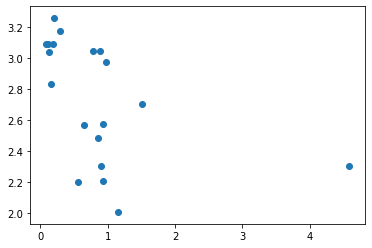

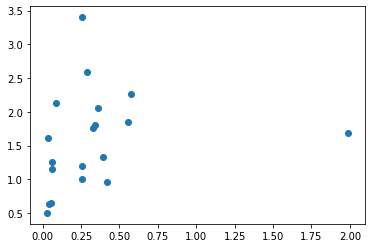

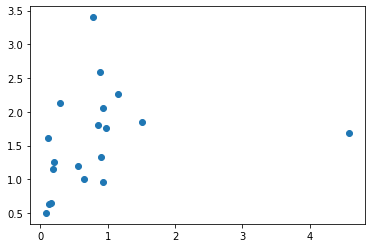

In [188]:
plt.scatter([x[0] for x in emds], [np.log(x[2]) for x in emds])
plt.show()
plt.scatter([x[0]/np.log(x[2]) for x in emds], [x[1] for x in emds])
plt.show()
plt.scatter([x[0] for x in emds], [x[1] for x in emds])
plt.show()

NameError: name 'dcohort' is not defined

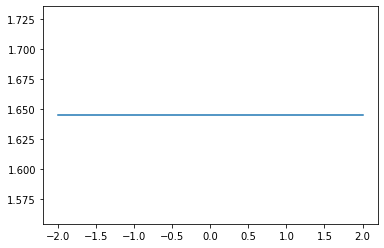

In [5]:
patient = list(anl.patients.values())[0]
taus= np.linspace(-2, 2, 40)
tpairs = patient.get_time_pairs_by_prefix("Prim", "Met")
for tp1, tp2 in tpairs:
    distances = patient.prediction_distance(tp1, tp2, 0.01, taus, beta=1., include_nested=False)
    plt.plot(taus, distances["EMD"])
    plt.title(patient.name+" "+dcohort[patient.name])


In [77]:
taus = [0.001, 0.005, 0.01, 0.04, 0.06, 0.1, 1, 5, 10]
taus += [10*tau for tau in taus]
taus = list(set(taus))
taus.sort()
taus

[0.001, 0.005, 0.01, 0.04, 0.05, 0.06, 0.1, 0.4, 0.6, 1, 5, 10, 50, 100]

# Shared mutations

In [10]:
mids = [mut.id for pat in anl.patients.values() for mut in pat.samples[0].mutations.values() if mut.substitution!=""]
umids = list(set(mids))
mcounts = [mids.count(mid) for mid in umids]

mut2gene = {}
for pat in anl.patients.values():
    sample = pat.samples[0].mutations.values()
    for mut in pat.samples[0].mutations.values():
        mut2gene[mut.id] = mut.gene

## Mutations shared between patients

In [11]:
mcounted = list(zip(umids, mcounts))
mcounted.sort(key=lambda x: -x[1])
dmcounted = {}
for mid, mc in mcounted:
    dmcounted[mid] = mc

mumids = [mid for mid in umids if dmcounted[mid]>=5]
#[(mid, mut2gene[mid], mut2pats[mid]) for mid in mumids]


In [9]:
mut2pats = {}
for umid in umids:
    mut2pats[umid] = []
for pat in anl.patients.values():
    sample = pat.samples[0]
    for mut in pat.samples[0].mutations.values():
        if mut.id in umids:
            mut2pats[mut.id].append(pat.name)
            
mut2patsamples = {}
for umid in umids:
    mut2patsamples[umid] = []
ddat = []
dmdat = {}
for pat in anl.patients.values():
    psamples = pat.timePoints['Primary'].samples.values()
    mmccfs = [sample.get_mutation_frequencies() for sample in psamples]
    vals = [np.mean([mcf[mid] for mcf in mmccfs]) for mid in mumids]
    dat = [pat.name] + vals
    ddat.append(dat)
    
    mtimePoints = [tp for tp in list(pat.timePoints.keys()) if tp!="Primary"]
    mtimePoints.sort()
    msamples = [list(pat.timePoints[tp].samples.values())[0] for tp in mtimePoints]
    dcfs = [sample.get_mutation_frequencies() for sample in msamples]
    dmdat[pat.name] = pd.DataFrame([['Primary'] + vals] + [[msamp.name] + [dcf[mid] for mid in mumids] for msamp, dcf in zip(msamples, dcfs)])
    dmdat[pat.name].columns = ['name'] + [umid + "_" + mut2gene[umid] for umid in mumids]
#        for mut in samples.mutations.values():
#            if mut.id in umids:
#                mmccf = sample.get_mutation_frequencies()
#                for umid in umids:
#                    mutpatsamples2CCF[pat.name + "_" + sample.name]

ddat = pd.DataFrame(ddat)
ddat.columns = ['Patient'] + [umid + "_" + mut2gene[umid] for umid in mumids]

In [10]:
pnames = list(dmdat.keys()) #patients
cnames = list(dmdat[pnames[1]].columns)[1:] #columns - mutations

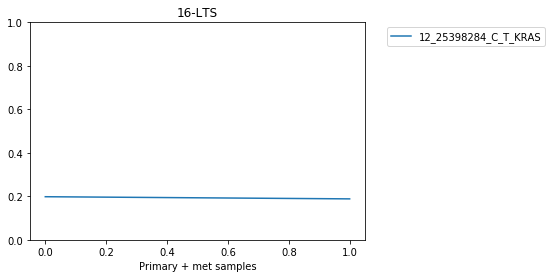

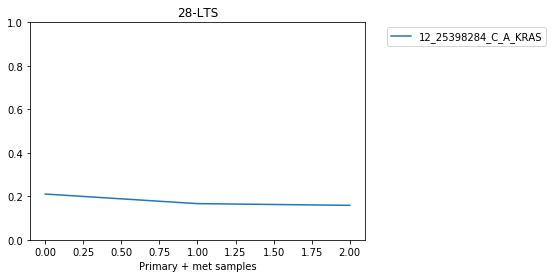

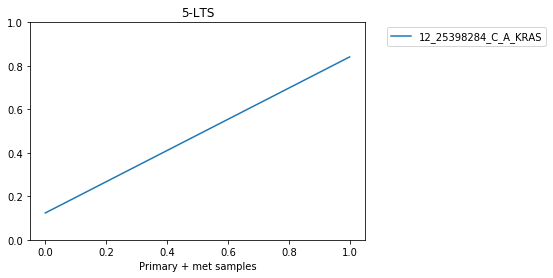

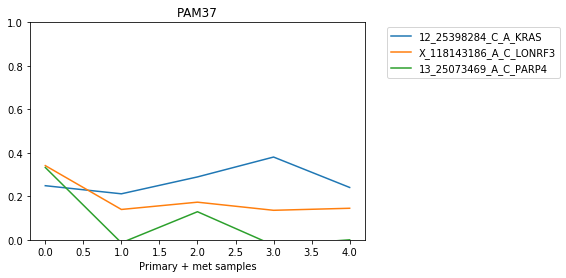

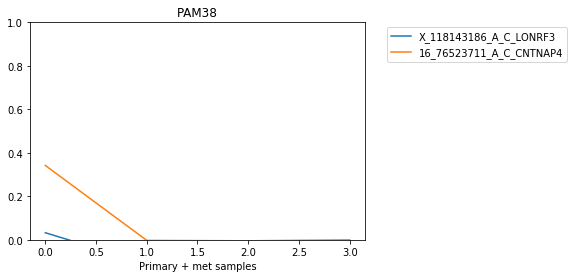

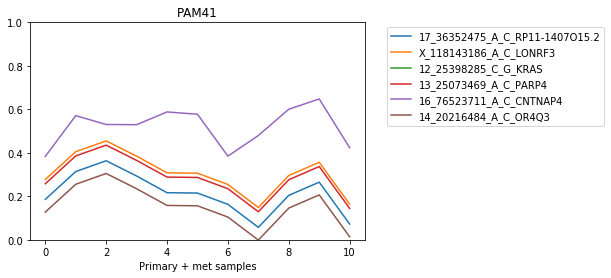

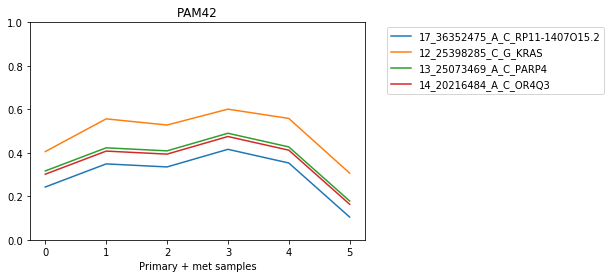

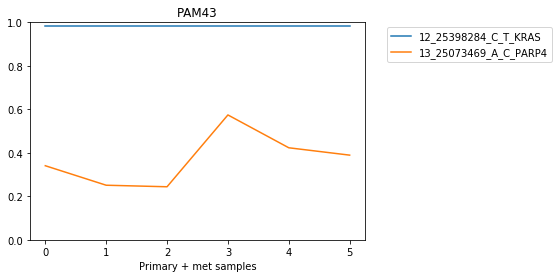

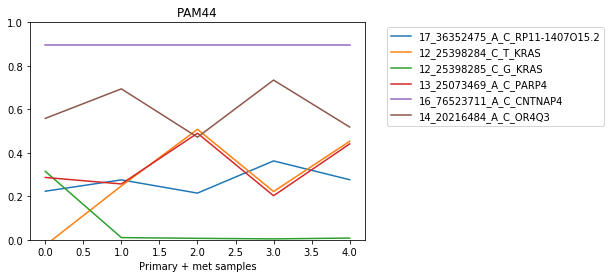

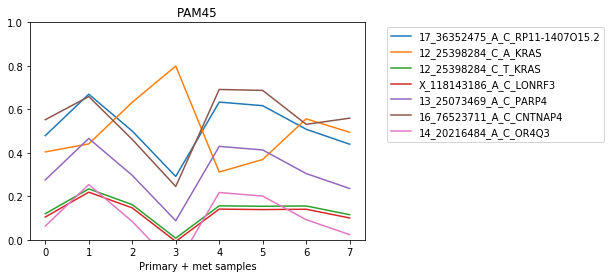

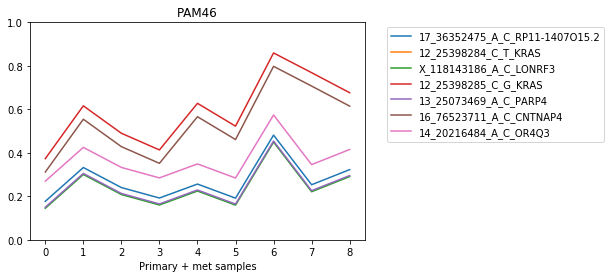

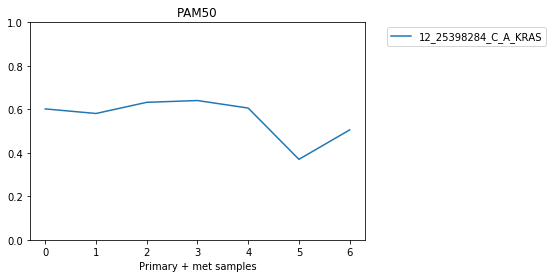

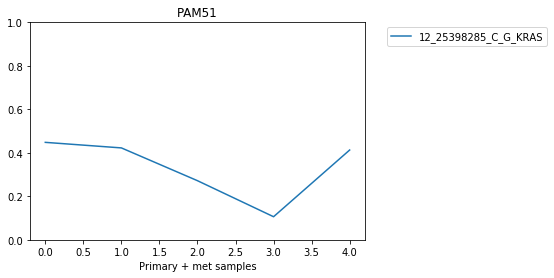

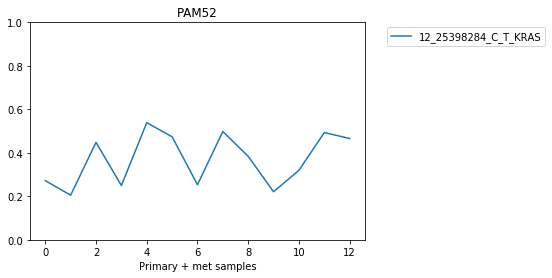

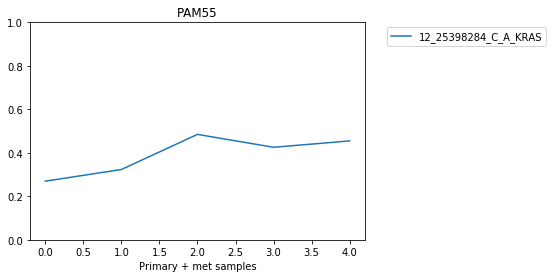

In [16]:
import random  

with PdfPages(os.path.join(odir, "common_mutations.pdf")) as pdf:
    for pat in dmdat:
        shown = False
        for cname in cnames:
            if max(dmdat[pat].loc[:,cname])>0:
                plt.plot(np.array(dmdat[pat].loc[:,cname])+random.gauss(0, 0.1), label=cname)
                shown = True
        if shown:
            plt.title(pat)
            plt.ylim(0,1)
            plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
            plt.xlabel("Primary + met samples")
            pdf.savefig()
            plt.show()
        

In [22]:
mumids

['17_36352475_A_C',
 '12_25398284_C_A',
 '12_25398284_C_T',
 'X_118143186_A_C',
 '12_25398285_C_G',
 '13_25073469_A_C',
 '16_76523711_A_C',
 '14_20216484_A_C']

In [18]:
mutations = anl.get_mutations()
mgenes = set([mut.gene for mut in mutations])

In [19]:
len(mgenes)

8010

In [79]:
params = anl.Qmodel.get_parameters()
ptab = pd.DataFrame([[p, params[p]] for p in params.keys()])
ptab.to_csv(os.path.join(odir, "parameters_" + aggrname + ".txt"), sep="\t", index=False)
ptab

0     1
0            a    26
1            k     1
2    include_A  True
3    include_R  True
4        kdthr  None
5  KDnormalize     1
6   model_name    AR

# Entropy and distance

In [177]:
from scipy.stats import wasserstein_distance
vals1 = [node.id for node in tree1.nodes.values()]
vals2 = [node.id for node in tree2.nodes.values()]
w1 = [node.Y for node in tree1.nodes.values()]
w2 = [node.Y for node in tree2.nodes.values()]
wasserstein_distance(vals1, vals2, w1, w2)

In [185]:
wasserstein_distance(vals1, vals2, w2, w1)

1.1881799001408373

1.1881799001408373

In [18]:
sample_distances = {}
for patient in anl.patients.values():
    tps = list(patient.timePoints.keys())
    tpairs = [[tp1, tp2] for tp1 in tps for tp2 in tps if tp1>tp2]
    dists2 = []
    for tp1, tp2 in tpairs:
        kl1, kl2 = patient.observed_distance(tp1, tp2, eps=0.01, beta=1., normalize=True)
        dists2.append([patient.name, tp1, tp2, kl1, kl2])
    sample_distances[patient.name] = dists2


511.06	PatientLine: Copying trees in patient 11-LTS

511.08	PatientLine: Done

511.09	PatientLine: Copying trees in patient 16-LTS

511.11	PatientLine: Done

511.11	PatientLine: Copying trees in patient 28-LTS

511.14	PatientLine: Done

511.14	PatientLine: Copying trees in patient 28-LTS

511.19	PatientLine: Done

511.19	PatientLine: Copying trees in patient 28-LTS

511.22	PatientLine: Done

511.22	PatientLine: Copying trees in patient 3-OLTS

511.23	PatientLine: Done

511.23	PatientLine: Copying trees in patient 5-LTS

511.24	PatientLine: Done

511.24	PatientLine: Copying trees in patient APGI2132

511.26	PatientLine: Done

511.26	PatientLine: Copying trees in patient PAM36

511.27	PatientLine: Done

511.27	PatientLine: Copying trees in patient PAM36

511.29	PatientLine: Done

511.29	PatientLine: Copying trees in patient PAM36

511.30	PatientLine: Done

511.30	PatientLine: Copying trees in patient PAM37

511.53	PatientLine: Done

511.53	PatientLine: Copying trees in patient PAM37

51


568.69	PatientLine: Done

568.69	PatientLine: Copying trees in patient PAM43

568.80	PatientLine: Done

568.80	PatientLine: Copying trees in patient PAM43

568.91	PatientLine: Done

568.91	PatientLine: Copying trees in patient PAM43

569.03	PatientLine: Done

569.03	PatientLine: Copying trees in patient PAM43

569.14	PatientLine: Done

569.14	PatientLine: Copying trees in patient PAM43

569.25	PatientLine: Done

569.26	PatientLine: Copying trees in patient PAM43

569.37	PatientLine: Done

569.37	PatientLine: Copying trees in patient PAM44

569.46	PatientLine: Done

569.46	PatientLine: Copying trees in patient PAM44

569.56	PatientLine: Done

569.56	PatientLine: Copying trees in patient PAM44

569.65	PatientLine: Done

569.65	PatientLine: Copying trees in patient PAM44

569.74	PatientLine: Done

569.74	PatientLine: Copying trees in patient PAM44

569.84	PatientLine: Done

569.84	PatientLine: Copying trees in patient PAM44

569.93	PatientLine: Done

569.93	PatientLine: Copying trees in 


621.45	PatientLine: Done

621.46	PatientLine: Copying trees in patient PAM51

621.84	PatientLine: Done

621.84	PatientLine: Copying trees in patient PAM51

622.10	PatientLine: Done

622.10	PatientLine: Copying trees in patient PAM51

622.27	PatientLine: Done

622.27	PatientLine: Copying trees in patient PAM51

622.45	PatientLine: Done

622.45	PatientLine: Copying trees in patient PAM51

622.62	PatientLine: Done

622.62	PatientLine: Copying trees in patient PAM52

623.19	PatientLine: Done

623.19	PatientLine: Copying trees in patient PAM52

624.26	PatientLine: Done

624.26	PatientLine: Copying trees in patient PAM52

624.65	PatientLine: Done

624.65	PatientLine: Copying trees in patient PAM52

625.01	PatientLine: Done

625.01	PatientLine: Copying trees in patient PAM52

625.36	PatientLine: Done

625.37	PatientLine: Copying trees in patient PAM52

625.73	PatientLine: Done

625.73	PatientLine: Copying trees in patient PAM52

626.20	PatientLine: Done

626.20	PatientLine: Copying trees in 

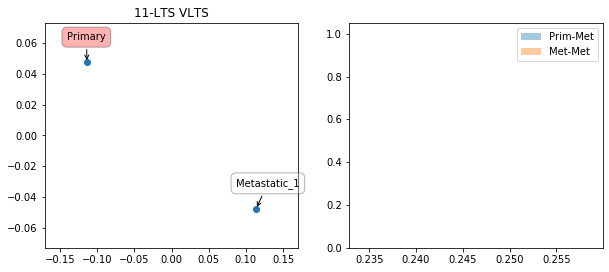

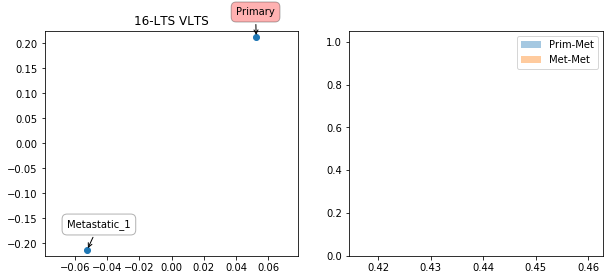

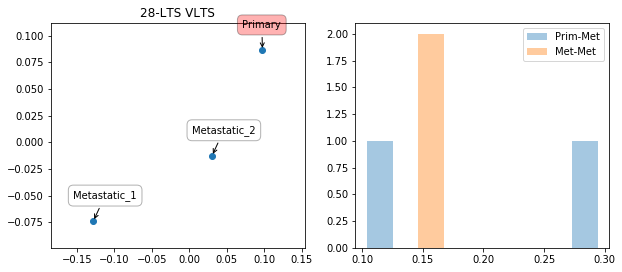

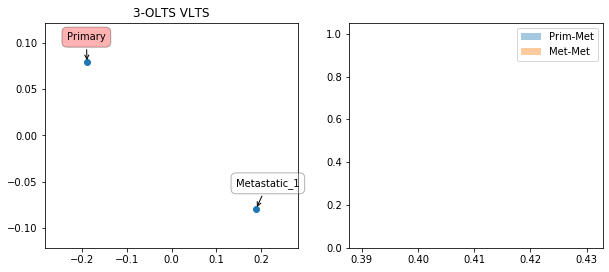

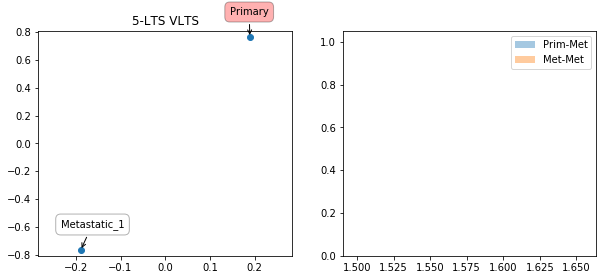

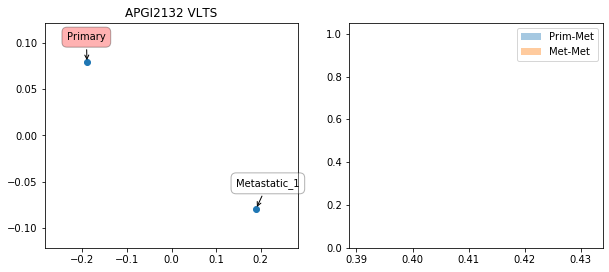

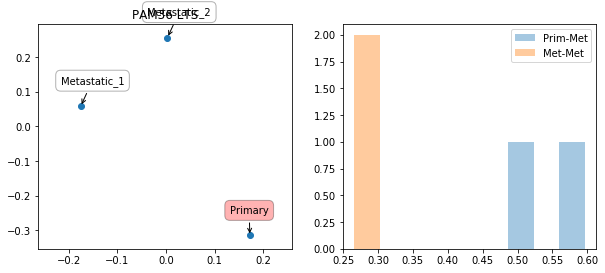

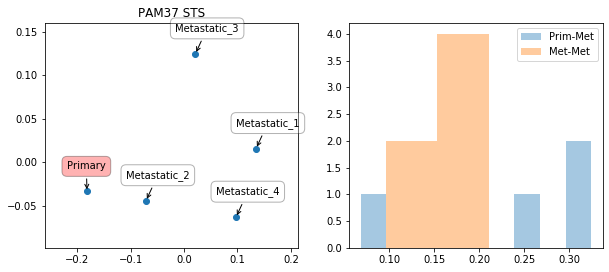

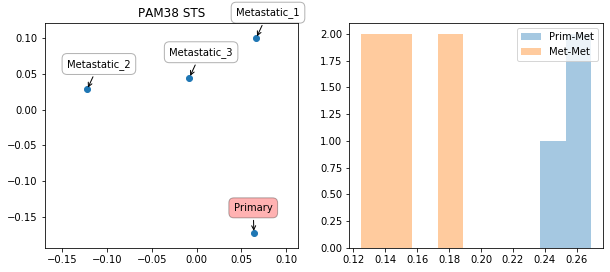

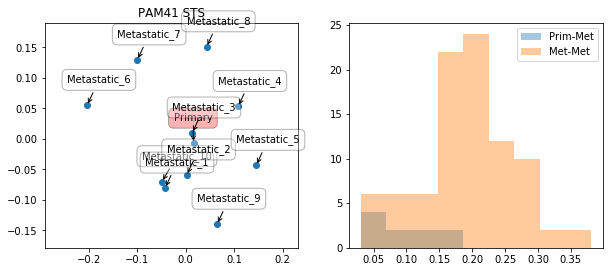

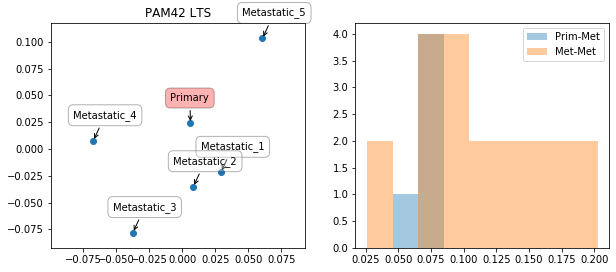

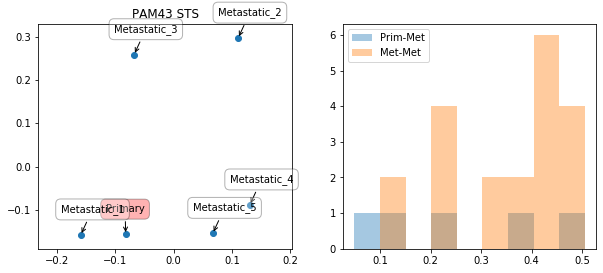

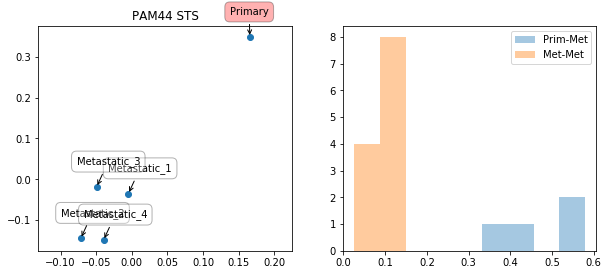

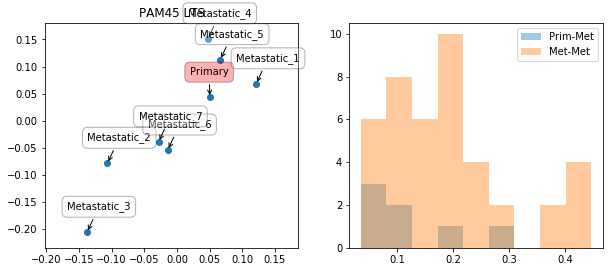

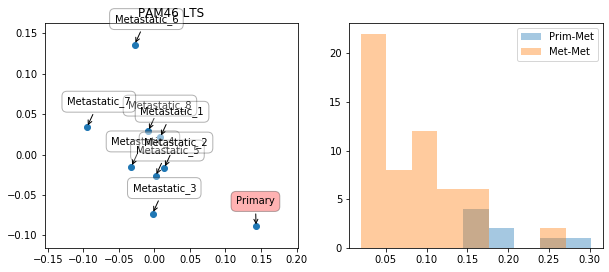

skipping PAM50
skipping PAM51
skipping PAM52
skipping PAM55


In [175]:
with PdfPages(os.path.join(odir, "sample_distances.pdf")) as pdf:
    pmdists0 = []
    mmdists0 = []
    for pname in sample_distances:
        if dtype[pname] == "Synchronous":
            print("skipping", pname)
            continue
        fig, ax = plt.subplots(1, 2, figsize=(10,4))
        dd2 = defaultdict(lambda: defaultdict(int))
        for el in sample_distances[pname]:
            dd2[el[1]][el[2]] = (el[3]+el[4])/2
            dd2[el[2]][el[1]] = (el[3]+el[4])/2
        
        # MDS
        
        tps = list(dd2.keys())
        dists = [[dd2[s1][s2] for s2 in tps] for s1 in tps]

        adist = np.array(dists)
        amax = np.amax(adist)
        #adist /= amax

        mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
        results = mds.fit(adist)
        coords = results.embedding_

        [d1, d2] = list(np.linspace(min(coords[:,0]), max(coords[:,0]),5)[:2])
        xdbin = d2-d1
        xrange = [min(coords[:,0])-xdbin, max(coords[:,0])+xdbin]
        [d1, d2] = list(np.linspace(min(coords[:,0]), max(coords[:,0]),10)[:2])
        ydbin = d2-d1
        yrange = [min(coords[:,1])-ydbin, max(coords[:,1])+ydbin]


        plt.subplots_adjust(bottom = 0.1)
        ax[0].scatter(
            coords[:, 0], coords[:, 1], marker = 'o'
            )
        ax[0].set_xlim(xrange[0], xrange[1])
        ax[0].set_ylim(yrange[0], yrange[1])

        for label, x, y in zip(tps, coords[:, 0], coords[:, 1]):
            col = 'white'
            if label == 'Primary':
                col='red'
            ax[0].annotate(
                label,
                xy = (x, y), xytext = (-20, 20),
                textcoords = 'offset points', ha = 'left', va = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.5', fc = col, alpha = 0.3),
                arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
        ax[0].set_title(pname+ " "+dcohort[pname])
        
        # histograms
        pmdists = [dd2['Primary'][tp] for tp in tps if tp!='Primary']
        mmdists = [dd2[tp1][tp2] for tp1 in tps for tp2 in tps if tp1!='Primary' and tp2 != "Primary" and tp1!=tp2]
        alldists = pmdists+mmdists
        pmdists = np.array(pmdists)
        mmdists = np.array(mmdists)
        alldists = np.array(alldists)
        #pmdists -= np.mean(alldists)
        #mmdists -= np.mean(alldists)
        pmdists0 += list([(x, pname) for x in pmdists])
        mmdists0 += list([(x, pname) for x in mmdists])
        #alldists -= np.mean(alldists)
        bins = np.linspace(min(alldists), max(alldists), 10)
        ax[1].hist(pmdists, bins=bins, alpha=0.4, label="Prim-Met")
        ax[1].hist(mmdists, bins=bins, alpha=0.4, label="Met-Met")
        ax[1].legend()
        
        
        pdf.savefig()
        plt.show()


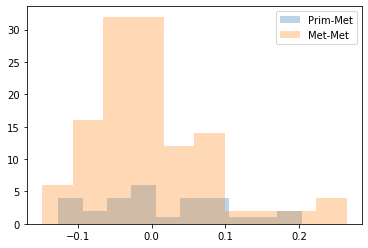

In [107]:
plt.hist([x[0] for x in pmdists0 if dcohort[x[1]]!="STS"], alpha=0.3, label="Prim-Met")
plt.hist([x[0] for x in mmdists0 if dcohort[x[1]]!="STS"], alpha=0.3, label="Met-Met")
plt.legend()

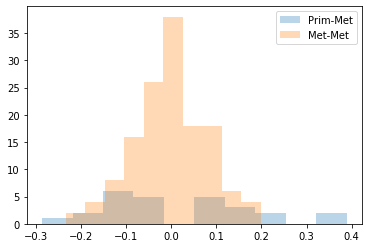

In [109]:
plt.hist([x[0] for x in pmdists0 if dcohort[x[1]]=="STS"], alpha=0.3, label="Prim-Met")
plt.hist([x[0] for x in mmdists0 if dcohort[x[1]]=="STS"], alpha=0.3, label="Met-Met")
plt.legend()

/Users/mluksza/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


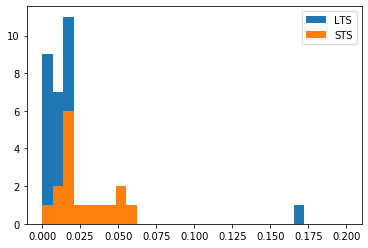

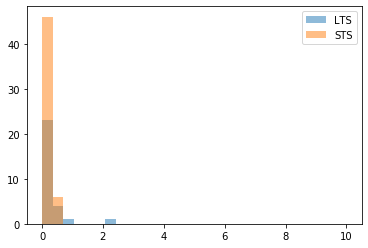

In [511]:
bins=np.linspace(0,0.2,30)
plt.hist([x[3]/dpfs[x[0]] for x in dists if dcohort[x[0]]!="STS"], bins=bins,label="LTS")
plt.hist([x[3]/dpfs[x[0]] for x in dists if dcohort[x[0]]=="STS"], bins=bins,label="STS")
plt.legend()
plt.show()

bins=np.linspace(0,10,30)
plt.hist([x[3] for x in dists if dcohort[x[0]]!="STS"], bins=bins,label="LTS", alpha=0.5)
plt.hist([x[3] for x in dists if dcohort[x[0]]=="STS"], bins=bins,label="STS", alpha=0.5)
plt.legend()

In [112]:
tab = []
taus = np.array([round(x, 5) for x in np.logspace(np.log10(0.0001), np.log10(1.))])
trunkality_shared2 = 0.0
tp_pref1="Prim"
tp_pref2="Met"
dtmet = {}
for patient in anl.patients.values():
    print(patient.name)
    tpairs = patient.get_time_pairs_by_prefix(tp_pref1, tp_pref2)
    dtmet[patient.name] = {}
    for tp1, tp2 in tpairs:
        ave_fit1, ave_fit2 = patient.average_function(tp1, tp2, lambda node: node.fitness, beta=1., use_shared=True, eps=0.03)

        ent1, ent2, kl2, klhs, sites1, sites2, tmetrics = patient.prediction_distance(tp1, tp2, 0.01, taus, beta=1., include_nested=False)
#                ave_shared_f =
        dtmet[patient.name][tp1+"_"+tp2] = tmetrics
        trunkality_shared1, trunkality_shared2 = patient.trunkality(tp1, tp2, beta=1., use_shared=True, eps=0.01)
        trunkality_total1, trunkality_total2 = patient.trunkality(tp1, tp2, beta=1., use_shared=False, eps=0.01)

        tab.append([patient.name, sites1, sites2, tp1, tp2, ave_fit1, 
                    ave_fit2, trunkality_shared2,
                    trunkality_total2, ent1, ent2, kl2]
                   + klhs)
        
    
        

11-LTS

7164.53	PatientLine: Setting copies in 11-LTS

7164.53	PatientLine: Copying trees in patient 11-LTS

7164.56	PatientLine: Done

7164.56	PatientLine: removing soft

7164.56	PatientLine: done

7164.56	PatientLine: removing soft

7164.56	PatientLine: done

7164.56	PatientLine: removing soft

7164.56	PatientLine: done

7164.56	PatientLine: removing soft

7164.56	PatientLine: done

7164.56	PatientLine: removing soft

7164.56	PatientLine: done

7164.68	PatientLine: 11-LTS 11_LTS_primary_tumor Ovary Primary -> Metastatic_1

7164.68	PatientLine: removing volume: 0.008907977497513134, 0.46968344024362596

7164.68	PatientLine: 0.9999999999999999 1.0

7164.90	PatientLine: 11-LTS 11_LTS_primary_tumor Ovary Primary -> Metastatic_1

7164.90	PatientLine: removing volume: 0.007382314951436675, 0.22038551596329053

7164.90	PatientLine: 0.9999999999999999 1.0000000000000002

7165.21	PatientLine: 11-LTS 11_LTS_primary_tumor Ovary Primary -> Metastatic_1

7165.21	PatientLine: removing volume: 0.00


7175.20	PatientLine: 3-OLTS 3_OLTS_primary_tumor Lung Primary -> Metastatic_1

7175.20	PatientLine: removing volume: 0, 0

7175.20	PatientLine: 1.0000000000000002 1.0

7175.41	PatientLine: 3-OLTS 3_OLTS_primary_tumor Lung Primary -> Metastatic_1

7175.41	PatientLine: removing volume: 0.00847005056788538, 0.14251166316245412

7175.41	PatientLine: 1.0 1.0

7175.84	PatientLine: 3-OLTS 3_OLTS_primary_tumor Lung Primary -> Metastatic_1

7175.84	PatientLine: removing volume: 0, 0

7175.84	PatientLine: 1.0 1.0000000000000002

7175.88	PatientLine: Setting copies in 3-OLTS

7175.88	PatientLine: Copying trees in patient 3-OLTS

7175.88	PatientLine: Done

7175.88	PatientLine: removing soft

7175.88	PatientLine: done

7175.88	PatientLine: removing soft

7175.88	PatientLine: done

7175.88	PatientLine: removing soft

7175.88	PatientLine: done

7175.88	PatientLine: removing soft

7175.88	PatientLine: done

7175.88	PatientLine: removing soft

7175.88	PatientLine: done
5-LTS

7175.88	PatientLine: Sett


7183.95	PatientLine: PAM37 PAM37PT1 Liver Primary -> Metastatic_1

7183.95	PatientLine: removing volume: 0.03197027730545179, 0.37036169963171295

7183.95	PatientLine: 0.9999999999999998 1.0

7184.61	PatientLine: PAM37 PAM37PT1 Liver Primary -> Metastatic_1

7184.62	PatientLine: removing volume: 0.03821370822472117, 0.38862323805039906

7184.62	PatientLine: 0.9999999999999998 1.0

7185.93	PatientLine: PAM37 PAM37PT1 Liver Primary -> Metastatic_1

7185.93	PatientLine: removing volume: 0.028769974905507555, 0.3607691993347822

7185.93	PatientLine: 1.0 1.0

7189.95	PatientLine: PAM37 PAM37PT1 Liver Primary -> Metastatic_1

7189.95	PatientLine: removing volume: 0.026306153880243058, 0.3884903906038664

7189.95	PatientLine: 1.0 1.0

7196.55	PatientLine: PAM37 PAM37PT1 Liver Primary -> Metastatic_1

7196.55	PatientLine: removing volume: 0.026306153880243058, 0.3884903906038664

7196.55	PatientLine: 0.9999999999999999 1.0

7196.59	PatientLine: Setting copies in PAM37

7196.59	PatientLine: Co


7240.92	PatientLine: PAM38 PAM38PT1 Lung Primary -> Metastatic_2

7240.92	PatientLine: removing volume: 0.017834114075494116, 0.18970960319135038

7240.92	PatientLine: 1.0000000000000002 1.0

7241.16	PatientLine: PAM38 PAM38PT1 Lung Primary -> Metastatic_2

7241.16	PatientLine: removing volume: 0.02103320202814773, 0.20110302547578532

7241.16	PatientLine: 1.0000000000000002 1.0

7241.57	PatientLine: PAM38 PAM38PT1 Lung Primary -> Metastatic_2

7241.57	PatientLine: removing volume: 0.02025300899010096, 0.11919888058615705

7241.57	PatientLine: 1.0 0.9999999999999998

7242.35	PatientLine: PAM38 PAM38PT1 Lung Primary -> Metastatic_2

7242.35	PatientLine: removing volume: 0.015870172077417283, 0.1768683696680557

7242.35	PatientLine: 1.0 1.0000000000000002

7244.90	PatientLine: PAM38 PAM38PT1 Lung Primary -> Metastatic_2

7244.90	PatientLine: removing volume: 0.019918987631676488, 0.11882684786457504

7244.90	PatientLine: 1.0000000000000002 1.0

7244.94	PatientLine: Setting copies in PAM

/Users/mluksza/.local/lib/python3.7/site-packages/cio/patient/PatientLine.py:727: RuntimeWarning: overflow encountered in double_scalars
  klh = sum([y2*np.log(y2/yh) for (yh, y2) in zip(Yh, Y2) if y2>0])
/Users/mluksza/.local/lib/python3.7/site-packages/cio/patient/PatientLine.py:727: RuntimeWarning: divide by zero encountered in double_scalars
  klh = sum([y2*np.log(y2/yh) for (yh, y2) in zip(Yh, Y2) if y2>0])



7252.45	PatientLine: PAM41 PAM41PT1 Liver Primary -> Metastatic_9

7252.45	PatientLine: removing volume: 0.04114470386895667, 0.14226370101291222

7252.45	PatientLine: 1.0000000000000002 1.0000000000000002

7254.94	PatientLine: PAM41 PAM41PT1 Liver Primary -> Metastatic_9

7254.94	PatientLine: removing volume: 0.035337774789642035, 0.021956105789456653

7254.94	PatientLine: 0.9999999999999999 0.9999999999999998

7260.71	PatientLine: PAM41 PAM41PT1 Liver Primary -> Metastatic_9

7260.71	PatientLine: removing volume: 0.04114470386895666, 0.1422637010129122

7260.71	PatientLine: 1.0 0.9999999999999999

7273.56	PatientLine: PAM41 PAM41PT1 Liver Primary -> Metastatic_9

7273.56	PatientLine: removing volume: 0.035337774789642035, 0.021956105789456653

7273.56	PatientLine: 0.9999999999999999 0.9999999999999998

7273.60	PatientLine: Setting copies in PAM41

7273.60	PatientLine: Copying trees in patient PAM41

7274.37	PatientLine: Done

7274.37	PatientLine: removing soft

7274.37	PatientLine: 


7429.24	PatientLine: Done

7429.24	PatientLine: removing soft

7429.24	PatientLine: done

7429.24	PatientLine: removing soft

7429.24	PatientLine: done

7429.24	PatientLine: removing soft

7429.24	PatientLine: done

7429.24	PatientLine: removing soft

7429.24	PatientLine: done

7429.24	PatientLine: removing soft

7429.24	PatientLine: done

7429.24	PatientLine: Setting copies in PAM41

7429.24	PatientLine: Copying trees in patient PAM41

7430.01	PatientLine: Done

7430.01	PatientLine: removing soft

7430.01	PatientLine: done

7430.01	PatientLine: removing soft

7430.01	PatientLine: done

7430.01	PatientLine: removing soft

7430.01	PatientLine: done

7430.01	PatientLine: removing soft

7430.01	PatientLine: done

7430.01	PatientLine: removing soft

7430.01	PatientLine: done

7430.62	PatientLine: PAM41 PAM41PT1 Liver Primary -> Metastatic_4

7430.62	PatientLine: removing volume: 0.04114470386895667, 0.21462411085095454

7430.62	PatientLine: 1.0 0.9999999999999999

7431.90	PatientLine: PAM


7969.36	PatientLine: PAM41 PAM41PT1 Peritoneum Primary -> Metastatic_8

7969.36	PatientLine: removing volume: 0.04114470386895667, 0.17368258884543614

7969.36	PatientLine: 1.0 0.9999999999999998

7971.55	PatientLine: PAM41 PAM41PT1 Peritoneum Primary -> Metastatic_8

7971.55	PatientLine: removing volume: 0.04114470386895667, 0.17368258884543614

7971.55	PatientLine: 1.0000000000000002 0.9999999999999997

7975.70	PatientLine: PAM41 PAM41PT1 Peritoneum Primary -> Metastatic_8

7975.70	PatientLine: removing volume: 0.035337774789642035, 0.1696078006021785

7975.70	PatientLine: 0.9999999999999999 0.9999999999999997

8516.01	PatientLine: PAM41 PAM41PT1 Peritoneum Primary -> Metastatic_8

8516.01	PatientLine: removing volume: 0.04114470386895666, 0.1736825888454361

8516.01	PatientLine: 1.0 0.9999999999999997

9060.60	PatientLine: PAM41 PAM41PT1 Peritoneum Primary -> Metastatic_8

9060.60	PatientLine: removing volume: 0.035337774789642035, 0.16960780060217848

9060.60	PatientLine: 0.999999


10052.84	PatientLine: PAM42 PAM42PT1 Lung Primary -> Metastatic_4

10052.84	PatientLine: removing volume: 0.022404068765806844, 0.14941342724429635

10052.85	PatientLine: 0.9999999999999999 1.0

10065.46	PatientLine: PAM42 PAM42PT1 Lung Primary -> Metastatic_4

10065.46	PatientLine: removing volume: 0.020963054086020713, 0.14527149602128603

10065.46	PatientLine: 1.0 1.0

10065.52	PatientLine: Setting copies in PAM42

10065.52	PatientLine: Copying trees in patient PAM42

10065.64	PatientLine: Done

10065.64	PatientLine: removing soft

10065.64	PatientLine: done

10065.64	PatientLine: removing soft

10065.64	PatientLine: done

10065.64	PatientLine: removing soft

10065.64	PatientLine: done

10065.64	PatientLine: removing soft

10065.64	PatientLine: done

10065.64	PatientLine: removing soft

10065.64	PatientLine: done

10065.64	PatientLine: Setting copies in PAM42

10065.64	PatientLine: Copying trees in patient PAM42

10065.76	PatientLine: Done

10065.76	PatientLine: removing soft

1006


10103.64	PatientLine: Done

10103.64	PatientLine: removing soft

10103.64	PatientLine: done

10103.64	PatientLine: removing soft

10103.64	PatientLine: done

10103.64	PatientLine: removing soft

10103.64	PatientLine: done

10103.64	PatientLine: removing soft

10103.64	PatientLine: done

10103.64	PatientLine: removing soft

10103.64	PatientLine: done

10103.84	PatientLine: PAM43 PAM43PT1 Mesentery Primary -> Metastatic_4

10103.84	PatientLine: removing volume: 0.010152968654558116, 0.1658719373396657

10103.84	PatientLine: 1.0 1.0000000000000002

10104.27	PatientLine: PAM43 PAM43PT1 Mesentery Primary -> Metastatic_4

10104.27	PatientLine: removing volume: 0.010538698189622487, 0.18261572980514523

10104.27	PatientLine: 1.0 1.0

10105.09	PatientLine: PAM43 PAM43PT1 Mesentery Primary -> Metastatic_4

10105.09	PatientLine: removing volume: 0.010152968654558116, 0.1658719373396657

10105.09	PatientLine: 1.0 1.0000000000000002

10106.81	PatientLine: PAM43 PAM43PT1 Mesentery Primary -> Metas


10146.95	PatientLine: Done

10146.95	PatientLine: removing soft

10146.95	PatientLine: done

10146.95	PatientLine: removing soft

10146.95	PatientLine: done

10146.95	PatientLine: removing soft

10146.95	PatientLine: done

10146.95	PatientLine: removing soft

10146.95	PatientLine: done

10146.95	PatientLine: removing soft

10146.95	PatientLine: done

10147.15	PatientLine: PAM44 PAM44PT1 Liver Primary -> Metastatic_3

10147.15	PatientLine: removing volume: 0, 0

10147.15	PatientLine: 1.0 1.0

10147.55	PatientLine: PAM44 PAM44PT1 Liver Primary -> Metastatic_3

10147.55	PatientLine: removing volume: 0, 0

10147.55	PatientLine: 1.0000000000000002 1.0

10148.41	PatientLine: PAM44 PAM44PT1 Liver Primary -> Metastatic_3

10148.41	PatientLine: removing volume: 0, 0

10148.41	PatientLine: 1.0 1.0

10149.89	PatientLine: PAM44 PAM44PT1 Liver Primary -> Metastatic_3

10149.89	PatientLine: removing volume: 0, 0

10149.89	PatientLine: 1.0 1.0

10154.29	PatientLine: PAM44 PAM44PT1 Liver Primary -> M


10202.83	PatientLine: PAM45 PAM45PT1 Lymph_node Primary -> Metastatic_4

10202.83	PatientLine: removing volume: 0.02200832160130151, 0.01146062057390806

10202.83	PatientLine: 1.0 0.9999999999999999

10205.64	PatientLine: PAM45 PAM45PT1 Lymph_node Primary -> Metastatic_4

10205.64	PatientLine: removing volume: 0.023358228557512642, 0.01245643780426389

10205.64	PatientLine: 0.9999999999999998 0.9999999999999999

10213.53	PatientLine: PAM45 PAM45PT1 Lymph_node Primary -> Metastatic_4

10213.53	PatientLine: removing volume: 0.02368612695586237, 0.012358136149134844

10213.54	PatientLine: 0.9999999999999999 1.0

10213.58	PatientLine: Setting copies in PAM45

10213.58	PatientLine: Copying trees in patient PAM45

10213.83	PatientLine: Done

10213.83	PatientLine: removing soft

10213.83	PatientLine: done

10213.83	PatientLine: removing soft

10213.83	PatientLine: done

10213.83	PatientLine: removing soft

10213.83	PatientLine: done

10213.83	PatientLine: removing soft

10213.83	PatientLine:


11375.16	PatientLine: Done

11375.16	PatientLine: removing soft

11375.16	PatientLine: done

11375.16	PatientLine: removing soft

11375.16	PatientLine: done

11375.16	PatientLine: removing soft

11375.16	PatientLine: done

11375.16	PatientLine: removing soft

11375.16	PatientLine: done

11375.16	PatientLine: removing soft

11375.16	PatientLine: done

11375.16	PatientLine: Setting copies in PAM46

11375.16	PatientLine: Copying trees in patient PAM46

11376.28	PatientLine: Done

11376.29	PatientLine: removing soft

11376.29	PatientLine: done

11376.29	PatientLine: removing soft

11376.29	PatientLine: done

11376.29	PatientLine: removing soft

11376.29	PatientLine: done

11376.29	PatientLine: removing soft

11376.29	PatientLine: done

11376.29	PatientLine: removing soft

11376.29	PatientLine: done

11377.32	PatientLine: PAM46 PAM46PT1 Pancreas Primary -> Metastatic_3

11377.32	PatientLine: removing volume: 0, 0

11377.32	PatientLine: 1.0000000000000002 1.0

11379.47	PatientLine: PAM46 PA


11563.81	PatientLine: PAM46 PAM46PT1 IVC Primary -> Metastatic_5

11563.81	PatientLine: removing volume: 0, 0

11563.81	PatientLine: 1.0000000000000002 1.0

11581.53	PatientLine: PAM46 PAM46PT1 IVC Primary -> Metastatic_5

11581.53	PatientLine: removing volume: 0, 0

11581.53	PatientLine: 1.0000000000000002 1.0

11581.57	PatientLine: Setting copies in PAM46

11581.57	PatientLine: Copying trees in patient PAM46

11582.70	PatientLine: Done

11582.70	PatientLine: removing soft

11582.70	PatientLine: done

11582.70	PatientLine: removing soft

11582.70	PatientLine: done

11582.70	PatientLine: removing soft

11582.70	PatientLine: done

11582.70	PatientLine: removing soft

11582.70	PatientLine: done

11582.70	PatientLine: removing soft

11582.70	PatientLine: done

11582.70	PatientLine: Setting copies in PAM46

11582.70	PatientLine: Copying trees in patient PAM46

11583.98	PatientLine: Done

11583.98	PatientLine: removing soft

11583.98	PatientLine: done

11583.98	PatientLine: removing soft




11682.63	PatientLine: PAM50 PAM50PT2 Bowel Primary -> Metastatic_5

11682.63	PatientLine: removing volume: 0.004227193249698611, 0.004552754791213975

11682.63	PatientLine: 1.0000000000000002 1.0

11683.04	PatientLine: PAM50 PAM50PT2 Bowel Primary -> Metastatic_5

11683.04	PatientLine: removing volume: 0.0025531425356301396, 0.002884529017615475

11683.04	PatientLine: 1.0 0.9999999999999998

11683.82	PatientLine: PAM50 PAM50PT2 Bowel Primary -> Metastatic_5

11683.82	PatientLine: removing volume: 0.0035120203750831054, 0.004324070412385

11683.82	PatientLine: 0.9999999999999998 1.0

11685.51	PatientLine: PAM50 PAM50PT2 Bowel Primary -> Metastatic_5

11685.51	PatientLine: removing volume: 0.0031967012583345865, 0.003991872551306908

11685.51	PatientLine: 0.9999999999999998 0.9999999999999999

11690.71	PatientLine: PAM50 PAM50PT2 Bowel Primary -> Metastatic_5

11690.71	PatientLine: removing volume: 0.0032834261209297093, 0.0027804805006999386

11690.71	PatientLine: 1.0000000000000002 1.


11721.07	PatientLine: PAM51 PAM51PT6 Diaphragm Primary -> Metastatic_2

11721.07	PatientLine: removing volume: 0.009771072963505826, 0.0216674128116144

11721.07	PatientLine: 1.0000000000000002 1.0

11725.65	PatientLine: PAM51 PAM51PT6 Diaphragm Primary -> Metastatic_2

11725.65	PatientLine: removing volume: 0.018715974653391833, 0.02792780184590249

11725.65	PatientLine: 1.0 0.9999999999999999

11725.72	PatientLine: Setting copies in PAM51

11725.72	PatientLine: Copying trees in patient PAM51

11725.98	PatientLine: Done

11725.98	PatientLine: removing soft

11725.98	PatientLine: done

11725.98	PatientLine: removing soft

11725.98	PatientLine: done

11725.98	PatientLine: removing soft

11725.98	PatientLine: done

11725.98	PatientLine: removing soft

11725.98	PatientLine: done

11725.98	PatientLine: removing soft

11725.98	PatientLine: done

11725.98	PatientLine: Setting copies in PAM51

11725.98	PatientLine: Copying trees in patient PAM51

11726.21	PatientLine: Done

11726.21	PatientL


11764.66	PatientLine: Done

11764.66	PatientLine: removing soft

11764.66	PatientLine: done

11764.66	PatientLine: removing soft

11764.66	PatientLine: done

11764.66	PatientLine: removing soft

11764.66	PatientLine: done

11764.66	PatientLine: removing soft

11764.66	PatientLine: done

11764.66	PatientLine: removing soft

11764.66	PatientLine: done

11764.66	PatientLine: Setting copies in PAM52

11764.66	PatientLine: Copying trees in patient PAM52

11765.04	PatientLine: Done

11765.04	PatientLine: removing soft

11765.04	PatientLine: done

11765.04	PatientLine: removing soft

11765.04	PatientLine: done

11765.04	PatientLine: removing soft

11765.04	PatientLine: done

11765.04	PatientLine: removing soft

11765.04	PatientLine: done

11765.04	PatientLine: removing soft

11765.04	PatientLine: done

11765.33	PatientLine: PAM52 PAM52PT18 Liver Primary -> Metastatic_10

11765.33	PatientLine: removing volume: 0.013680123116115493, 0.03411377115098034

11765.33	PatientLine: 1.0000000000000004


11817.06	PatientLine: PAM52 PAM52PT18 Liver Primary -> Metastatic_8

11817.07	PatientLine: removing volume: 0.013680123116115493, 0.18397394984357757

11817.07	PatientLine: 1.0000000000000004 1.0

11817.76	PatientLine: PAM52 PAM52PT18 Liver Primary -> Metastatic_8

11817.76	PatientLine: removing volume: 0.015272226441845158, 0.19105894482723934

11817.76	PatientLine: 0.9999999999999998 1.0

11821.23	PatientLine: PAM52 PAM52PT18 Liver Primary -> Metastatic_8

11821.23	PatientLine: removing volume: 0.018201959121970153, 0.1885957390194786

11821.23	PatientLine: 1.0 0.9999999999999999

11823.34	PatientLine: PAM52 PAM52PT18 Liver Primary -> Metastatic_8

11823.34	PatientLine: removing volume: 0.02984158454551628, 0.14576170662373275

11823.34	PatientLine: 0.9999999999999999 0.9999999999999997

11830.44	PatientLine: PAM52 PAM52PT18 Liver Primary -> Metastatic_8

11830.44	PatientLine: removing volume: 0.021045368751044635, 0.13722828200801412

11830.44	PatientLine: 1.0 1.0

11830.55	Patient


11873.69	PatientLine: PAM52 PAM52PT18 Bowel Primary -> Metastatic_1

11873.69	PatientLine: removing volume: 0.02984158454551628, 0.038404997967767474

11873.69	PatientLine: 0.9999999999999999 1.0000000000000002

11879.06	PatientLine: PAM52 PAM52PT18 Bowel Primary -> Metastatic_1

11879.06	PatientLine: removing volume: 0.021045368751044635, 0.014998394516656889

11879.06	PatientLine: 1.0 0.9999999999999999

11879.11	PatientLine: Setting copies in PAM52

11879.11	PatientLine: Copying trees in patient PAM52

11879.53	PatientLine: Done

11879.53	PatientLine: removing soft

11879.53	PatientLine: done

11879.53	PatientLine: removing soft

11879.53	PatientLine: done

11879.53	PatientLine: removing soft

11879.53	PatientLine: done

11879.53	PatientLine: removing soft

11879.53	PatientLine: done

11879.53	PatientLine: removing soft

11879.53	PatientLine: done

11879.53	PatientLine: Setting copies in PAM52

11879.53	PatientLine: Copying trees in patient PAM52

11879.95	PatientLine: Done

11879.


11926.90	PatientLine: Done

11926.91	PatientLine: removing soft

11926.91	PatientLine: done

11926.91	PatientLine: removing soft

11926.91	PatientLine: done

11926.91	PatientLine: removing soft

11926.91	PatientLine: done

11926.91	PatientLine: removing soft

11926.91	PatientLine: done

11926.91	PatientLine: removing soft

11926.91	PatientLine: done

11926.91	PatientLine: Setting copies in PAM55

11926.91	PatientLine: Copying trees in patient PAM55

11927.29	PatientLine: Done

11927.29	PatientLine: removing soft

11927.29	PatientLine: done

11927.29	PatientLine: removing soft

11927.29	PatientLine: done

11927.29	PatientLine: removing soft

11927.29	PatientLine: done

11927.29	PatientLine: removing soft

11927.29	PatientLine: done

11927.29	PatientLine: removing soft

11927.29	PatientLine: done

11927.51	PatientLine: PAM55 PAM55PT7 Retroperitoneum Primary -> Metastatic_3

11927.51	PatientLine: removing volume: 0.015429122691929231, 0.22282565302750865

11927.51	PatientLine: 1.00000000

In [114]:
ptab = pd.DataFrame(tab)

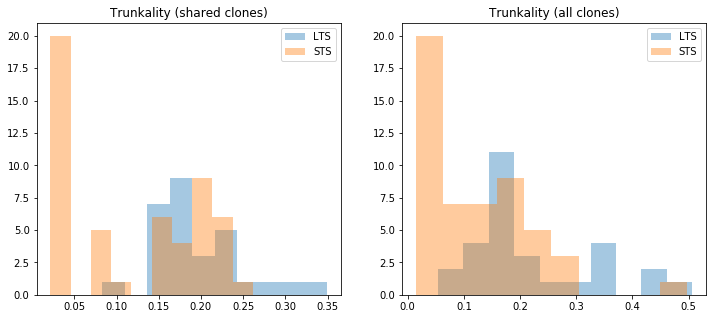

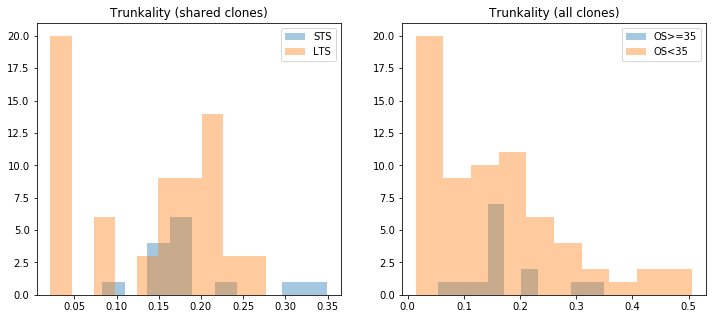

In [159]:
fig, ax = plt.subplots(1, 2, figsize = (12,5))
ind = [dcohort[x]!="STS" for x in ptab.iloc[:,0]]
ax[0].hist(ptab[ind].iloc[:,7], alpha=0.4, label="LTS")
ind = [dcohort[x]=="STS" for x in ptab.iloc[:,0]]
ax[0].hist(ptab[ind].iloc[:,7], alpha=0.4, label="STS")
ax[0].legend()
ax[0].set_title("Trunkality (shared clones)")
ind = [dcohort[x]!="STS" for x in ptab.iloc[:,0]]
ax[1].hist(ptab[ind].iloc[:,8], alpha=0.4, label="LTS")
ind = [dcohort[x]=="STS" for x in ptab.iloc[:,0]]
ax[1].hist(ptab[ind].iloc[:,8], alpha=0.4, label="STS")
ax[1].legend()
ax[1].set_title("Trunkality (all clones)")
plt.savefig(os.path.join(odir, "trunkality_STS_vs_LTS.pdf"))

thr=35
fig, ax = plt.subplots(1, 2, figsize = (12,5))
ind = [dOS[x]>=thr for x in ptab.iloc[:,0]]
ax[0].hist(ptab[ind].iloc[:,7], alpha=0.4, label="STS")
ind = [dOS[x]<thr for x in ptab.iloc[:,0]]
ax[0].hist(ptab[ind].iloc[:,7], alpha=0.4, label="LTS")
ax[0].legend()
ax[0].set_title("Trunkality (shared clones)")
ind = [dOS[x]>=thr for x in ptab.iloc[:,0]]
ax[1].hist(ptab[ind].iloc[:,8], alpha=0.4, label="OS>="+str(thr))
ind = [dOS[x]<thr for x in ptab.iloc[:,0]]
ax[1].hist(ptab[ind].iloc[:,8], alpha=0.4, label="OS<"+str(thr))
ax[1].legend()
ax[1].set_title("Trunkality (all clones)")
plt.savefig(os.path.join(odir, "trunkality_OS_42.pdf"))

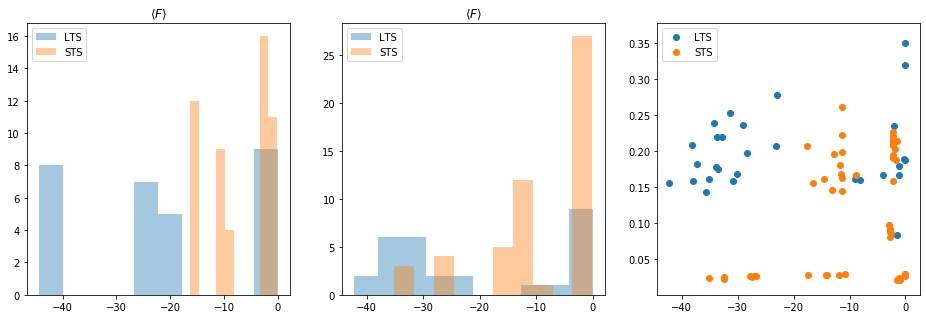

In [261]:
fig, ax = plt.subplots(1, 3, figsize = (16,5))
ind = [dcohort[x]!="STS" for x in ptab.iloc[:,0]]
ax[0].hist(ptab[ind].iloc[:,5], alpha=0.4, label="LTS")
ind = [dcohort[x]=="STS" for x in ptab.iloc[:,0]]
ax[0].hist(ptab[ind].iloc[:,5], alpha=0.4, label="STS")
ax[0].legend()
ax[0].set_title(r'$\langle F \rangle$')
ind = [dcohort[x]!="STS" for x in ptab.iloc[:,0]]
ax[1].hist(ptab[ind].iloc[:,6], alpha=0.4, label="LTS")
ind = [dcohort[x]=="STS" for x in ptab.iloc[:,0]]
ax[1].hist(ptab[ind].iloc[:,6], alpha=0.4, label="STS")
ax[1].legend()
ax[1].set_title(r'$\langle F \rangle$')
plt.savefig(os.path.join(odir, "aveF_STS_vs_LTS.pdf"))

ind = [dcohort[x]!="STS" for x in ptab.iloc[:,0]]
ax[2].scatter(ptab[ind].iloc[:,6], ptab[ind].iloc[:,7],label='LTS')
ind = [dcohort[x]=="STS" for x in ptab.iloc[:,0]]
ax[2].scatter(ptab[ind].iloc[:,6], ptab[ind].iloc[:,7],label='STS')
ax[2].legend()

In [ ]:
nfit = lambda node:  

In [243]:
node=list(tree1.nodes.values())[4]
node.fitness

-6.713375380907039

In [248]:
max([node.mutation_presentation_score(mut.id, kd0=500., strict=False, dominant=False) for mut in node.mutations])


3.02180732569771

In [244]:
nfit(node)

0.0

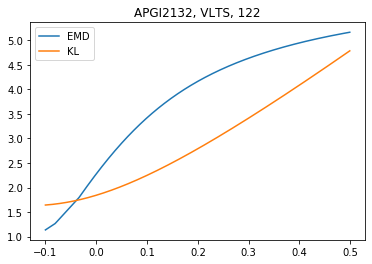

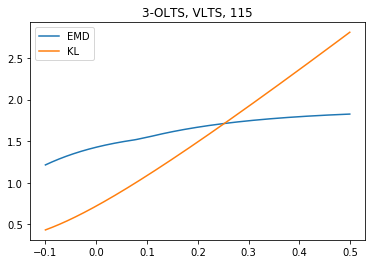

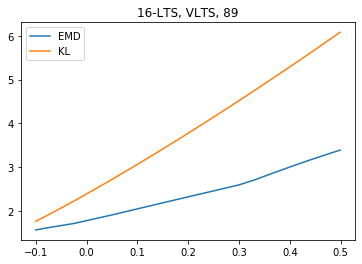

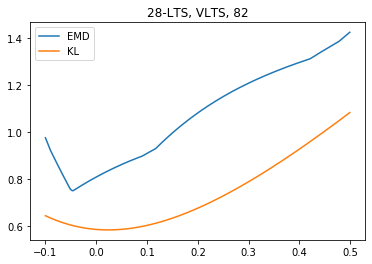

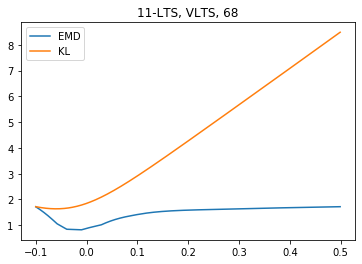

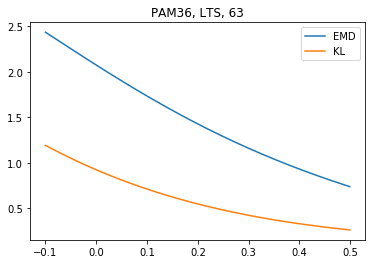

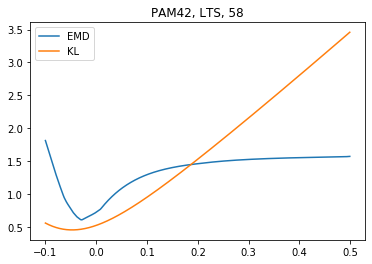

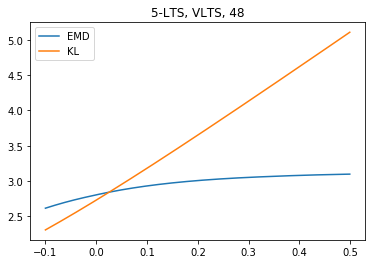

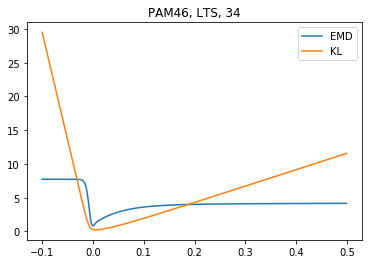

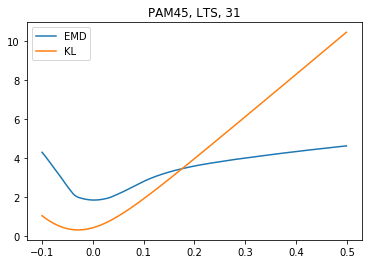

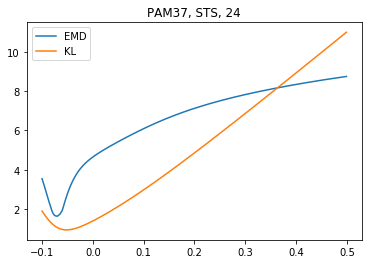

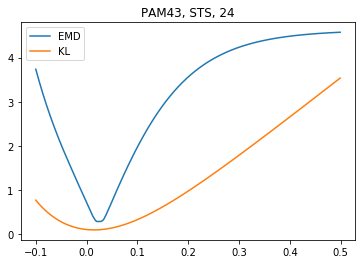

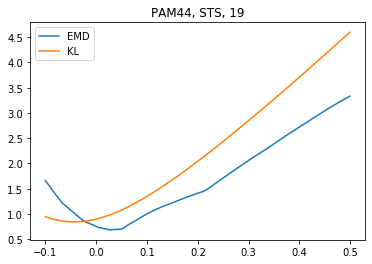

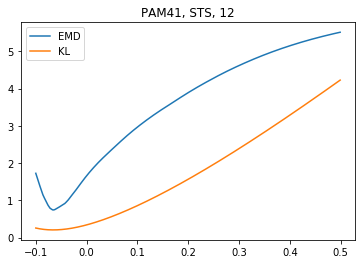

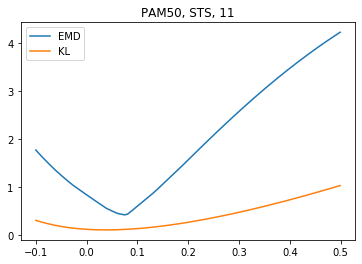

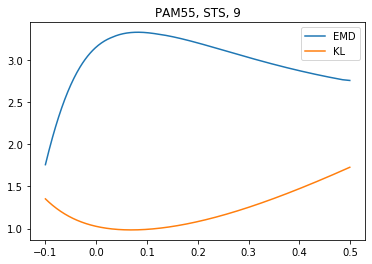

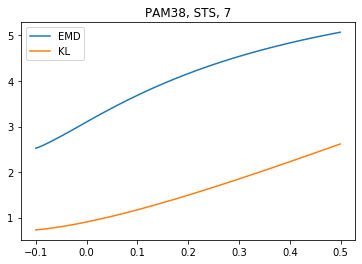

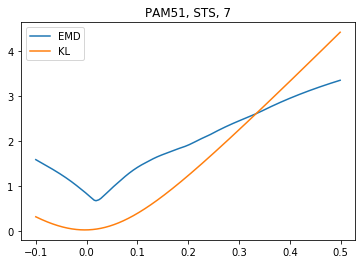

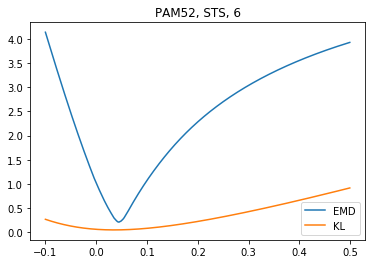

In [250]:
patient = list(anl.patients.values())[1]
nfit = lambda node: -len(node.neoantigens)
nfit = lambda node:  -max([node.mutation_presentation_score(mut.id, kd0=500., strict=False, dominant=False) for mut in node.mutations])
nfit = lambda node:  -sum([node.mutation_presentation_score(mut.id, kd0=500., strict=False, dominant=False) for mut in node.mutations])

opatients = list(anl.patients.values())
opatients.sort(key=lambda p: -dOS[p.name])
for patient in opatients:
    tree_pairs = patient.get_tree_pairs("Primary", "Metastatic_1", beta=1.)
    tree1, tree2, w = tree_pairs[0]
    tau=-0.05
    res = []
    kls = []
    taus = np.arange(-.1,.5,0.001)
    for tau in taus:
        Yh = Utils.log_norm([np.log(node.Y) + nfit(node) * tau for node in tree1.nodes.values() if node.id != tree1.root.id])
        Yh = [np.exp(yh) for yh in Yh]
        Y2 = [node.Y for node in tree2.nodes.values() if node.id != tree1.root.id]
        Y1 = [node.Y for node in tree1.nodes.values() if node.id != tree1.root.id]
        vals = list(range(len(Y1)))
        wdh = wasserstein_distance(vals, vals, Yh, Y2)
        wd = wasserstein_distance(vals, vals, Y1, Y2)
        res.append(wdh)
        kl = sum([0 if y2 ==0 else y2*np.log(y2/yh) for (y2, yh) in zip(Y2, Yh)])
        kls.append(kl)
    plt.plot(taus, res, label="EMD")
    plt.plot(taus, kls, label="KL")
    plt.legend()
    plt.title(patient.name+", "+dcohort[patient.name]+", "+str(dOS[patient.name]))
    plt.show()

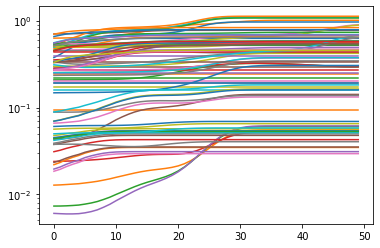

In [17]:
#labels = list({"KL": [], "euclid": [], "pearson": [], "spearman": []}.keys())
#tmetrics = dtmet["16-LTS"]['Primary_Metastatic_1']

#for pat in dtmet:
#    for tmetrics in dtmet[pat].values():
#        for line, lab in zip(tmetrics.itertuples(index=False), labels):
#            if lab == "euclid":
#                plt.plot(line, label=pat)
#plt.yscale("log")
#plt.legend()
 

In [17]:
predictions = pd.read_csv(os.path.join(hdir, "Results", "predictions_DAR_KL.txt"), sep="\t")
ltspredictions = predictions[[dcohort[r.Patient]!='STS' for r in predictions.itertuples()]]
stspredictions = predictions[[dcohort[r.Patient]=='STS' for r in predictions.itertuples()]]

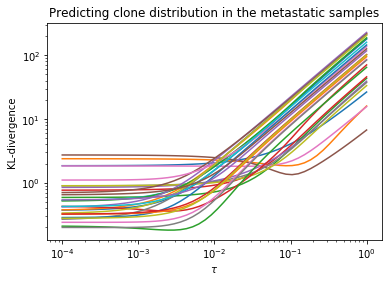

In [18]:
taus=[float(stt.split("_")[1]) for stt in predictions.iloc[:,9:].columns]
for line in ltspredictions.itertuples(index=False):
    pat = line.Patient
    kls = list(line)[9:]
    plt.plot(taus, kls, label=pat)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\tau$")
plt.ylabel("KL-divergence")
plt.title("Predicting clone distribution in the metastatic samples")
plt.savefig(os.path.join(hdir, "KL_AxR_T_DG20.pdf"))
plt.show()


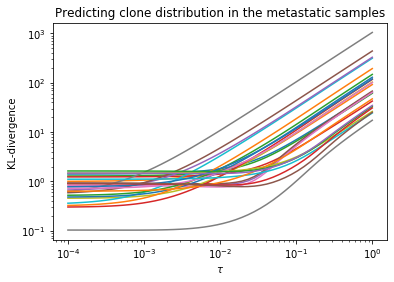

In [19]:
taus=[float(stt.split("_")[1]) for stt in predictions.iloc[:,9:].columns]
for line in stspredictions.itertuples(index=False):
    pat = line.Patient
    kls = list(line)[9:]
    plt.plot(taus, kls, label=pat)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\tau$")
plt.ylabel("KL-divergence")
plt.title("Predicting clone distribution in the metastatic samples")
plt.savefig(os.path.join(hdir, "KL_AxR_DG20.pdf"))
plt.show()


In [8]:
predictions

Patient    Sites1      Sites2      TP1            TP2  Ave_fitness1  \
0     11-LTS  Pancreas       Ovary  Primary   Metastatic_1     -3.731665   
1     16-LTS  Pancreas        Lung  Primary   Metastatic_1      4.328135   
2     28-LTS  Pancreas        Lung  Primary   Metastatic_1     23.708572   
3     28-LTS  Pancreas        Lung  Primary   Metastatic_2     23.708572   
4     3-OLTS  Pancreas        Lung  Primary   Metastatic_1      1.093452   
5      5-LTS  Pancreas       Ovary  Primary   Metastatic_1      4.149978   
6   APGI2132  Pancreas        Lung  Primary   Metastatic_1      8.086610   
7      PAM36  Pancreas    Pancreas  Primary   Metastatic_1     15.391213   
8      PAM36  Pancreas        Lung  Primary   Metastatic_2     15.391213   
9      PAM37  Pancreas       Liver  Primary   Metastatic_1      0.697972   
10     PAM37  Pancreas       Liver  Primary   Metastatic_2      0.697972   
11     PAM37  Pancreas     Omentum  Primary   Metastatic_3      0.697972   
12     PAM37  Pancreas       Liver  Primary   Metastatic_4      0.697972   
13     PAM38  Pancreas    Pancreas  Primary   Metastatic_1     17.964065   
14     PAM38  Pancreas        Lung  Primary   Metastatic_2     17.964065   
15     PAM38  Pancreas       Liver  Primary   Metastatic_3     17.964065   
16     PAM41  Pancreas       Liver  Primary   Metastatic_9     25.233139   
17     PAM41  Pancreas       Liver  Primary  Metastatic_10     25.233139   
18     PAM41  Pancreas       Liver  Primary   Metastatic_1     25.233139   
19     PAM41  Pancreas       Liver  Primary   Metastatic_2     25.233139   
20     PAM41  Pancreas    Pancreas  Primary   Metastatic_3     25.233139   
21     PAM41  Pancreas       Liver  Primary   Metastatic_4     25.233139   
22     PAM41  Pancreas       Liver  Primary   Metastatic_5     25.233139   
23     PAM41  Pancreas        Lung  Primary   Metastatic_6     25.233139   
24     PAM41  Pancreas        Lung  Primary   Metastatic_7     25.233139   
25     PAM41  Pancreas  Peritoneum  Primary   Metastatic_8     25.233139   
26     PAM42  Pancreas    Pancreas  Primary   Metastatic_1    -11.568043   
27     PAM42  Pancreas    Pancreas  Primary   Metastatic_2    -11.568043   
28     PAM42  Pancreas        Lung  Primary   Metastatic_3    -11.568043   
29     PAM42  Pancreas        Lung  Primary   Metastatic_4    -11.568043   
30     PAM42  Pancreas  Pericardia  Primary   Metastatic_5    -11.568043   
31     PAM43  Pancreas    Pancreas  Primary   Metastatic_1     33.260690   
32     PAM43  Pancreas       Liver  Primary   Metastatic_2     33.260690   
33     PAM43  Pancreas       Aorta  Primary   Metastatic_3     33.260690   
34     PAM43  Pancreas   Mesentery  Primary   Metastatic_4     33.260690   
35     PAM43  Pancreas        Lung  Primary   Metastatic_5     33.260690   
36     PAM44  Pancreas       Liver  Primary   Metastatic_2     -2.201341   
37     PAM44  Pancreas    Pancreas  Primary   Metastatic_1     -2.201341   
38     PAM44  Pancreas       Liver  Primary   Metastatic_4     -2.201341   
39     PAM44  Pancreas       Liver  Primary   Metastatic_3     -2.201341   
40     PAM45  Pancreas    Pancreas  Primary   Metastatic_1      2.994003   
41     PAM45  Pancreas  Peritoneum  Primary   Metastatic_2      2.994003   
42     PAM45  Pancreas  Peritoneum  Primary   Metastatic_3      2.994003   
43     PAM45  Pancreas  Lymph_node  Primary   Metastatic_4      2.994003   
44     PAM45  Pancreas  Lymph_node  Primary   Metastatic_5      2.994003   
45     PAM45  Pancreas   Diaphragm  Primary   Metastatic_6      2.994003   
46     PAM45  Pancreas  Perirectal  Primary   Metastatic_7      2.994003   
47     PAM46  Pancreas    Pancreas  Primary   Metastatic_4    -14.526984   
48     PAM46  Pancreas    Pancreas  Primary   Metastatic_3    -14.526984   
49     PAM46  Pancreas    Pancreas  Primary   Metastatic_8    -14.526984   
50     PAM46  Pancreas    Pancreas  Primary   Metastatic_7    -14.526984   
51     PAM46  Pancreas     Adrenal  Primary   Metasta

In [14]:
dsc = {}
for pname in dtmet:
    for tpair in dtmet[pname]:
        r1 = dtmet[pname][tpair].iloc[0,:]
        r2 = dtmet[pname][tpair].iloc[1,:]
        s = list(zip(list(dtmet[pname][tpair].iloc[0,:]), taus))
        s.sort(key=lambda x:x[0])
        dsc[pname+"_"+tpair] = s[0]
        #plt.scatter(taus, r1)
        #plt.xscale("log")
        #plt.yscale("log")
        #plt.title(pname+" "+tpair)
        #plt.show()

NameError: name 'dtmet' is not defined

In [20]:
dtmet['PAM41']['Primary_Metastatic_10']

0         1         2         3         4         5         6   \
0  0.141510  0.141510  0.141510  0.141510  0.141510  0.141510  0.141510   
1  0.192953  0.192953  0.192953  0.192953  0.192953  0.192953  0.192953   
2  0.843380  0.843380  0.843380  0.843380  0.843380  0.843380  0.843380   
3  0.985888  0.985888  0.985888  0.985888  0.985888  0.985888  0.985888   

         7         8         9   ...        40        41        42        43  \
0  0.141510  0.141510  0.141510  ...  0.141510  0.141510  0.141510  0.141510   
1  0.192953  0.192953  0.192953  ...  0.192953  0.192953  0.192953  0.192953   
2  0.843380  0.843380  0.843380  ...  0.843380  0.843380  0.843380  0.843380   
3  0.985888  0.985888  0.985888  ...  0.985888  0.985888  0.985888  0.985888   

         44        45        46        47        48        49  
0  0.141510  0.141510  0.141510  0.141510  0.141510  0.141510  
1  0.192953  0.192953  0.192953  0.192953  0.192953  0.192953  
2  0.843380  0.843380  0.843380  0.843380  0.843380  0.843380  
3  0.985888  0.985888  0.985888  0.985888  0.985888  0.985888  

[4 rows x 50 columns]

In [56]:
patient = anl.patients['11-LTS']
tp_pref1 = "Prim"
tp_pref2 = "Met"
tpairs = patient.get_time_pairs_by_prefix(tp_pref1, tp_pref2)
for tp1, tp2 in tpairs:
    trees = patient.get_tree_pairs(tp1, tp2)
patient.timePoints['Primary'].samples['11_LTS_primary_tumor'].trees

In [195]:
tpoint1 = patient.timePoints[tp1]
tpoint2 = patient.timePoints[tp2]
trees1 = tpoint1.trees(num=-1)
trees2 = tpoint2.trees(num=-1)
trees1

In [210]:
x = [(sum([mut.Taf==0 for mut in node.mutations]), np.median([mut.Taf for mut in node.mutations]), len(node.mutations), node.X) for node in trees1[0].nodes.values()]

In [212]:
[xx for xx in x if xx[-1]<0.03]

[(28, 0.02287344398340252, 82, 0.01905165292781558),
 (36, 0.011111111111111072, 91, 0.0014733073511301053),
 (33, 0.01382488479262678, 103, 0.012858179526117534)]

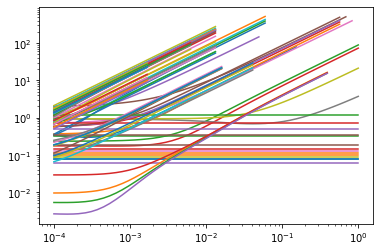

In [93]:
for row in tab:
    plt.plot(taus, row[12:])
plt.xscale("log")
plt.yscale("log")

In [94]:
tmetrics

0
0  [0.095410755104324, 0.10742739348959347, 0.126...
1  [0.043004051381970734, 0.043738813067428405, 0...
2  [0.07923038607008855, 0.07909655527820007, 0.0...
3  [0.10078413284145961, 0.10078413284145961, 0.1...

In [17]:
rdir = os.path.join(hdir, "Results")
tab = pd.read_csv(os.path.join(rdir, "predictions_max.txt"), sep="\t")

#rdir = os.path.join(hdir, "Results")
#tab = pd.read_csv(os.path.join(rdir, "predictions_sum.txt"), sep="\t")


rdir = os.path.join(hdir, "Results_Kd_500_sum")
tabKD500sum = pd.read_csv(os.path.join(rdir, "predictions.txt"), sep="\t")
rdir = os.path.join(hdir, "Results_Kd_sum")
tabKDsum = pd.read_csv(os.path.join(rdir, "predictions.txt"), sep="\t")
rdir = os.path.join(hdir, "Results_R")
tabR = pd.read_csv(os.path.join(rdir, "predictions.txt"), sep="\t")
rdir = os.path.join(hdir, "Results_A")
tabA = pd.read_csv(os.path.join(rdir, "predictions.txt"), sep="\t")
rdir = os.path.join(hdir, "Results_Kd")
tabKD = pd.read_csv(os.path.join(rdir, "predictions.txt"), sep="\t")
rdir = os.path.join(hdir, "Results_AR")
tabAR = pd.read_csv(os.path.join(rdir, "predictions.txt"), sep="\t")

In [18]:
tab

Patient    Sites1           Sites2      TP1           TP2  Shared_fitness1  \
0   11-LTS  Pancreas            Ovary  Primary  Metastatic_1     -1714.976168   
1   16-LTS  Pancreas             Lung  Primary  Metastatic_1      -466.823009   
2   28-LTS  Pancreas             Lung  Primary  Metastatic_1       -84.702635   
3   28-LTS  Pancreas             Lung  Primary  Metastatic_2       -84.702635   
4   3-OLTS  Pancreas             Lung  Primary  Metastatic_1      -611.529886   
..     ...       ...              ...      ...           ...              ...   
76   PAM52  Pancreas            Other  Primary  Metastatic_6     -8168.370725   
77   PAM55  Pancreas            Liver  Primary  Metastatic_1      -457.114382   
78   PAM55  Pancreas  Retroperitoneum  Primary  Metastatic_4      -457.114382   
79   PAM55  Pancreas  Retroperitoneum  Primary  Metastatic_3      -457.114382   
80   PAM55  Pancreas  Retroperitoneum  Primary  Metastatic_2      -457.114382   

    Shared_fitness2  Trunkality_shared  Trunkality_total  Entropy1  ...  \
0       -956.645170           0.235360          0.210152  1.704894  ...   
1       -569.180034           0.166796          0.095222  2.010589  ...   
2        -90.129716           0.193484          0.134143  2.050856  ...   
3        -74.141797           0.192870          0.147738  2.050856  ...   
4      -2984.511926           0.157526          0.157526  2.062758  ...   
..              ...                ...               ...       ...  ...   
76     -7117.309150           0.028682          0.050127  0.243339  ...   
77      -462.534661           0.021644          0.016063  0.256558  ...   
78      -637.979130           0.023064          0.014922  0.256558  ...   
79      -535.784516           0.024360          0.017560  0.256558  ...   
80      -720.106519           0.022081          0.014250  0.256558  ...   

    tau_0.18421  tau_0.2223  tau_0.26827  tau_0.32375  tau_0.39069  \
0           inf         inf          inf          inf          inf   
1    104.054359  125.734425   151.899631   183.477739   221.578650   
2     16.388813   19.812731    23.945527    28.934050    34.954050   
3     13.386596   16.201534    19.599366    23.700879    28.650648   
4           inf         inf          inf          inf          inf   
..          ...         ...          ...          ...          ...   
76          inf         inf          inf          inf          inf   
77          inf         inf          inf          inf          inf   
78          inf         inf          inf          inf          inf   
79          inf         inf          inf          inf          inf   
80          inf         inf          inf          inf          inf   

    tau_0.47149  tau_0.56899  tau_0.68665  tau_0.82864    tau_1.0  
0           inf          inf          inf          inf        inf  
1    267.568397   323.063451          inf          inf        inf  
2     42.221913    50.993807    61.581919    74.362587  89.790706  
3     34.626687    41.839759    50.546733    61.057276  73.745705  
4           inf          inf          inf          inf        inf  
..          ...          ...          ...          ...        ...  
76          inf          inf          inf          inf        inf  
77          inf          inf          inf          inf        inf  
78          inf          inf          inf          inf        inf  
79          inf          inf          inf          inf        inf  
80          inf          inf          inf          inf        inf  

[81 rows x 62 columns]

In [19]:
with open(os.path.join(hdir, "mapping.json")) as f:
    mjs = json.load(f)

In [21]:
dos = {}
dpfs = {}
dcohort = {}
dtype = {}
for el in mapping:
    dos[el['name']] = el["OS"] 
    dpfs[el['name']] = el["PFS"] 
    dcohort[el['name']] = el["cohort"] 
    dtype[el['name']] = el["type"] 

In [22]:
taus = np.array([round(x, 5) for x in np.logspace(np.log10(0.0001), np.log10(30.))])
#taus = list(set(list(-taus) + [0] + list(taus)))
taus.sort()

In [23]:
opt = [sorted(list(zip(row, range(len(row)))), key=lambda x: x[0])[0] for row in tau]


TypeError: 'float' object is not iterable

In [44]:
taus = list([round(x, 5) for x in np.logspace(np.log10(0.0001), np.log10(10.))])
taus = np.array([round(x, 5) for x in np.logspace(np.log10(0.0001), np.log10(1.))])
taus = np.array([round(x, 5) for x in np.logspace(np.log10(0.0001), np.log10(30.))])

KS = [0.414214, 0.534511, 0.668179, 0.820679, 1., 1.2185, 1.49661, 1.87087, 2.41421, 3.29655, 5.02734, 10.1531]
    #    AS=range(15,40)
KS.sort()
AS = list(np.linspace(15, 40, (40 - 15 + 1) * 2 - 1))


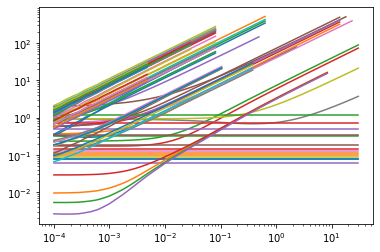

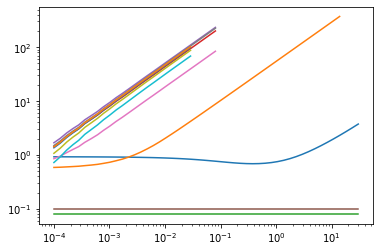

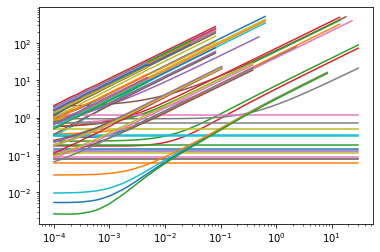

In [57]:
tabs = [tab, tab[tab.Sites2=="Pancreas"], tab[tab.Sites2!="Pancreas"]]
for tab0 in tabs:
    ent1 = np.array(tab0.iloc[:,5:].Entropy1)
    tau = np.array(tab0.iloc[:,12:])
    #taus = list([round(x, 5) for x in np.logspace(np.log10(0.0001), np.log10(10.))])
    taus = np.array([round(x, 5) for x in np.logspace(np.log10(0.0001), np.log10(30.))])
    taus = np.array([round(x, 5) for x in np.logspace(np.log10(0.0001), np.log10(30.))])

    for e1, x in zip(ent1, tau):
        plt.plot(taus, x)
        plt.xscale("log")
        plt.yscale("log")
    plt.show()
#taus = [float(col.replace("tau_","")) for col in list(tab.columns) if "tau_" in col]
#len(x)

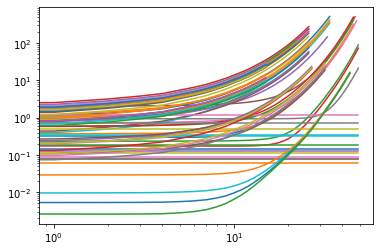

In [59]:
for e1, x in zip(ent1, tau):
    plt.plot(x)
    plt.xscale("log")
    plt.yscale("log")

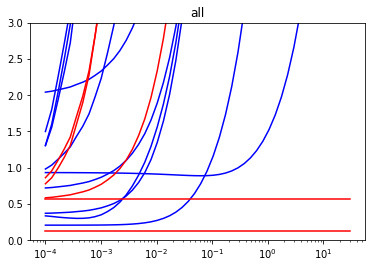

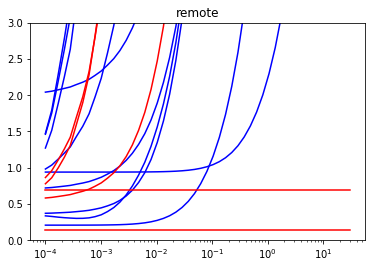

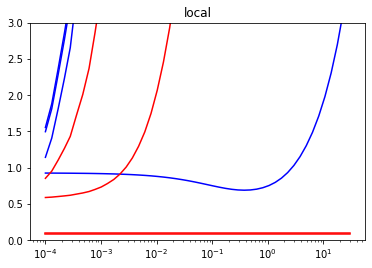

In [64]:
dline = {}

#tab=tabKD500sum
#tab = tabAR
#taus = [float(col.replace("tau_","")) for col in list(tab.columns) if "tau_" in col]
tabs = [tab, tab[tab.Sites2 != "Pancreas"], tab[tab.Sites2 == "Pancreas"]]
names = ["all", "remote", "local"]

for tab0, name in zip(tabs, names):
    dline = {}
    for line in tab0.itertuples(index=False):
        vals = list(line)[12:]
        if line.Patient not in dline:
            dline[line.Patient] = []
        dline[line.Patient].append(vals)
    for pname in dline:
        dline[pname] = pd.DataFrame(dline[pname])
        dline[pname] = list(dline[pname].mean())

    for pname in dline:
        if dtype[pname] != "Metachronous":
            continue    
        col = 'red' if dos[pname]>30 else 'blue'
        col = 'red' if dcohort[pname]=="STS" else 'blue'

        plt.plot(taus, dline[pname], c=col)
        plt.xscale("log")
        #plt.yscale("log")
        plt.ylim(0,3)
        plt.title(name)
    plt.show()

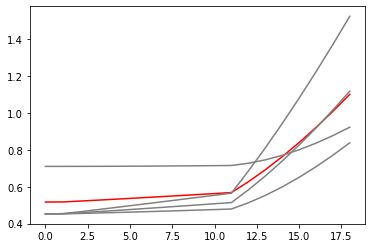

In [63]:
plt.plot(list(dline['PAM37'].mean()), c='red')
for r in dline['PAM37'].itertuples():
    plt.plot(list(r[1:]), color='gray')

In [39]:
hdir="/Users/mluksza/Dropbox/Research/01_Cancer/Cancer/data/PDAC"
ntau2=pd.read_csv(os.path.join(hdir, "Results", "ntau.txt"),sep="\t")
ntau3=pd.read_csv(os.path.join(hdir, "Results_3", "ntau.txt"),sep="\t")

In [41]:
d2 = {}
d3 = {}
for p, n in zip(ntau2.patient, ntau2.n_tau):
    d2[p] = n
for p, n in zip(ntau3.patient, ntau3.n_tau):
    d3[p] = n

In [42]:
pats = list(d2.keys())

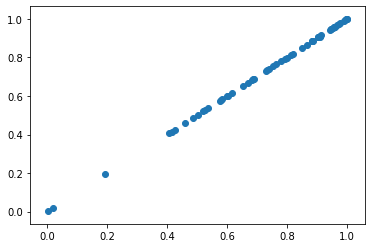

In [43]:
plt.scatter([d2[p] for p in pats], [d3[p] for p in pats])

In [45]:
hdir = "/Users/mluksza/Dropbox/Research/10_PDAC/Modeling/Data_orig_from_old"


In [47]:
rdir1 = os.path.join(hdir, "Results")
rdir2 = os.path.join(hdir, "Results_CancerIO")
ntau1 = pd.read_csv(os.path.join(rdir1, "ntau_0.04.txt"), sep="\t")
ntau2 = pd.read_csv(os.path.join(rdir2, "ntau_0.04.txt"), sep="\t")

In [53]:
n1={}
n2={}
for line in ntau2.itertuples():
    n1[line.patient] = line.n_tau
for line in ntau1.itertuples():
    n2[line.Patient] = line.score


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 56.]),
 array([-3.46944695e-18, -3.12250226e-18, -2.77555756e-18, -2.42861287e-18,
        -2.08166817e-18, -1.73472348e-18, -1.38777878e-18, -1.04083409e-18,
        -6.93889390e-19, -3.46944695e-19,  0.00000000e+00]),
 <a list of 10 Patch objects>)

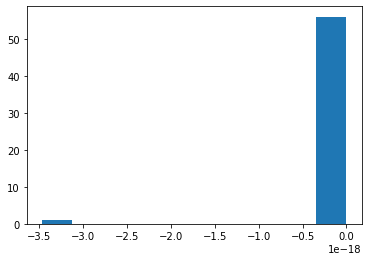

In [57]:
plt.hist(np.array([n1[p] for p in n1])- np.array([n2[p] for p in n1]))

In [173]:
'P53' in mgenes

False

In [17]:
def get_clone_info2(self, tp1, tp2, beta=1., gene_list=[], mutation_list=[], in_exclusive=True):
    '''
    Get info about clones
    :param tp1: str
    
    :param tp2: str
    
    :param beta: float

    :return: pd.DataFrame
    '''
    tree_pairs = self.get_tree_pairs(tp1, tp2, beta=beta)
    cinfo = []
    for tree1, tree2, w in tree_pairs:
        cids = list(tree1.nodes.keys())
        avef = tree1.average_over_nodes(node_fun=lambda node: node.fitness)
        aveml= tree1.average_over_nodes(node_fun=lambda node: len(node.mutations))
        avenl= tree1.average_over_nodes(node_fun=lambda node: len(node.neoantigens))
        for cid in cids:
            node1 = tree1.nodes[cid]
            node2 = tree2.nodes[cid]
            mload = len(node1.mutations)
            nload = len(node2.neoantigens)
            driver_genes = [sum([mut.gene==gene for mut in node1.exclusiveMutations if mut.substitution != ""]) for
                                    gene in gene_list]
            driver_mutations = [sum([mut.id==mid for mut in node1.exclusiveMutations]) for
                                    mid in mutation_list]
            line = [cid, self.name, tp1 + "->" + tp2, self.PFS, self.OS, w, node1.X, node2.X, node1.Y, node2.Y,
                        mload, mload-aveml, nload, nload-avenl, node1.fitness, node1.fitness - avef] + driver_genes + driver_mutations
            cinfo.append(line)
    cinfo = pd.DataFrame(cinfo)
    cinfo.columns = ["Clone", "Patient", "TimePoints", "PFS", "OS", "Weight", "X1", "X2", "Y1", "Y2", "Mload","aveMload",
                         "Nload","aveNload","F", "aveF"] + gene_list + mutation_list
    return cinfo

In [155]:
mmgenes = [mut2gene[mid] for mid in mumids]

In [161]:
mmgenes

['RP11-1407O15.2',
 'PARP4',
 'LONRF3',
 'KRAS',
 'OR4Q3',
 'KRAS',
 'CNTNAP4',
 'KRAS']

In [98]:
driver_genes

NameError: name 'driver_genes' is not defined

In [197]:
coeff = np.corrcoef(np.log(row.X2/row.X1), row.aveF)
np.log(row.X2/row.X1)

-0.6732331599089596

In [288]:
[x for x in [(mgene, 'P16' in mgene) for mgene in mgenes] if x[1]]

[('CEP164P1', True),
 ('CASP16', True),
 ('CEP164', True),
 ('RP11-216P16.2', True),
 ('NUP160', True),
 ('RP11-983P16.4', True),
 ('USP16', True)]

In [290]:
dgenes=['TP53', 'KRAS', 'CDKN2A','SMAD4']
dgenes[3] in mgenes

True

11-LTS


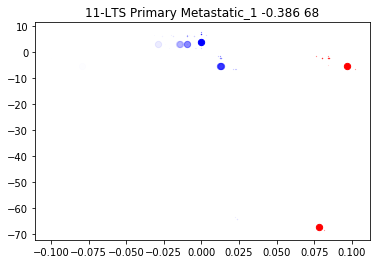

16-LTS


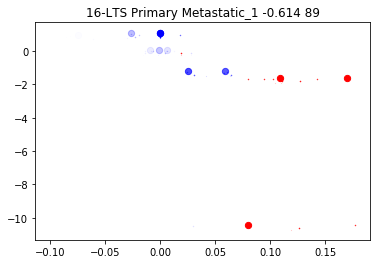

28-LTS


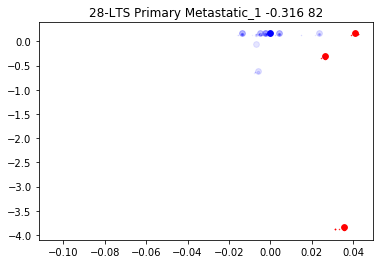

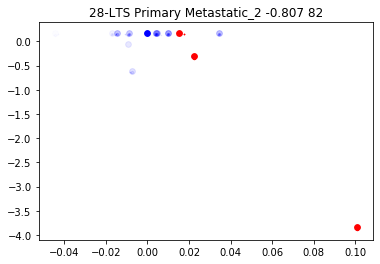

3-OLTS


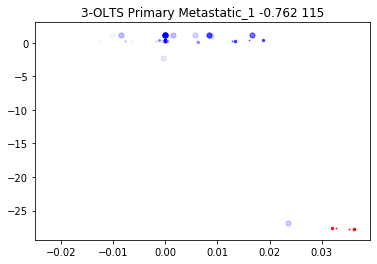

5-LTS


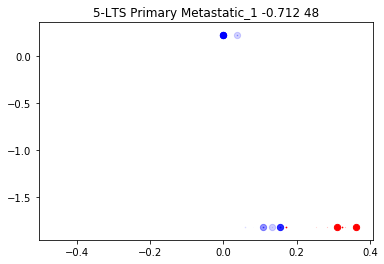

APGI2132


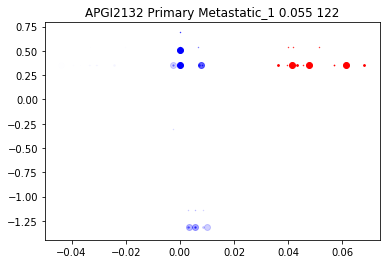

PAM36


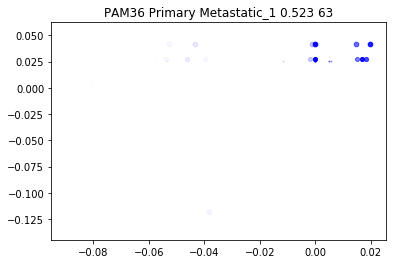

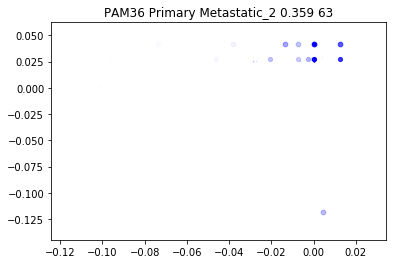

PAM37


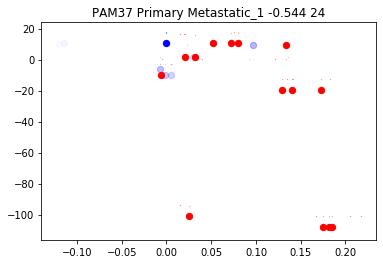

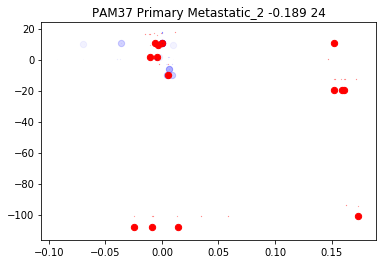

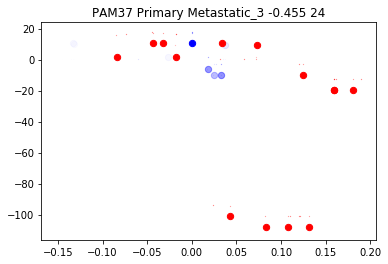

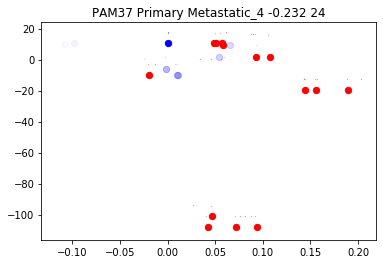

PAM38


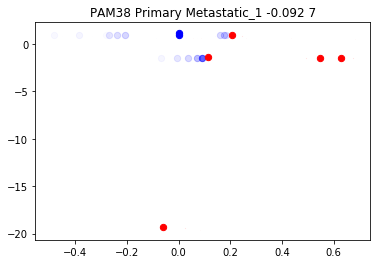

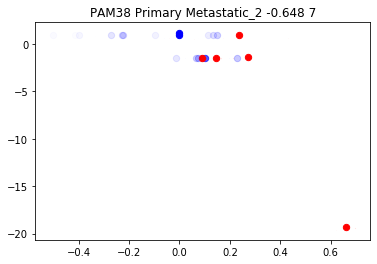

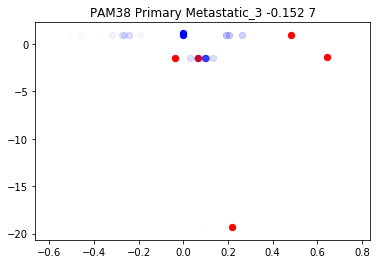

PAM41


/Users/mluksza/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/Users/mluksza/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


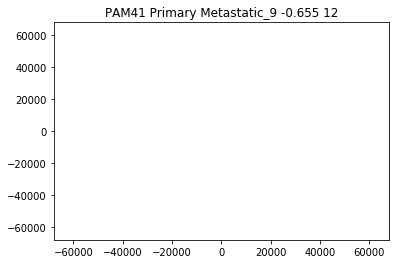

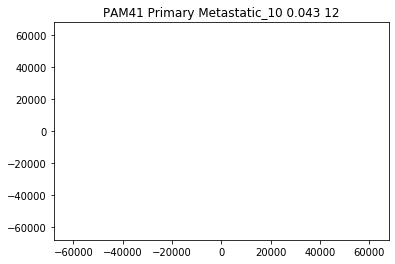

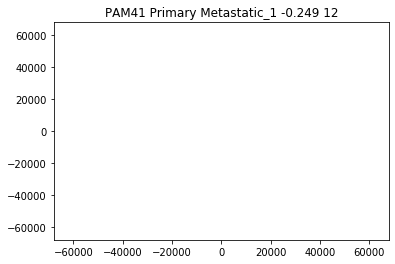

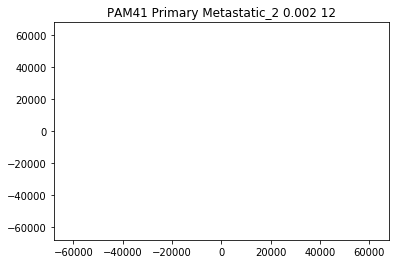

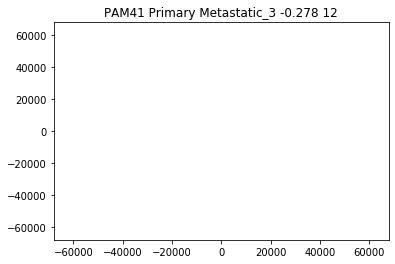

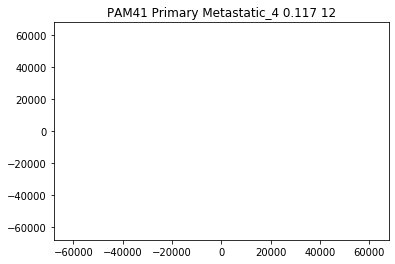

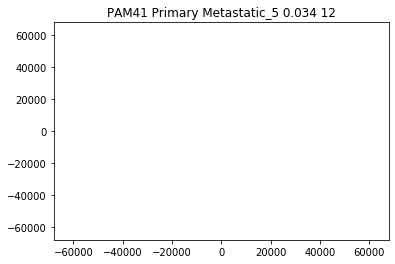

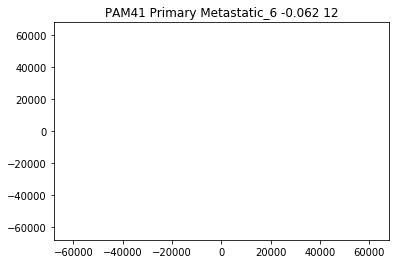

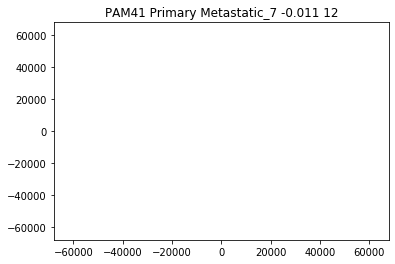

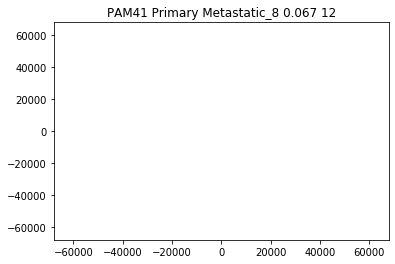

PAM42


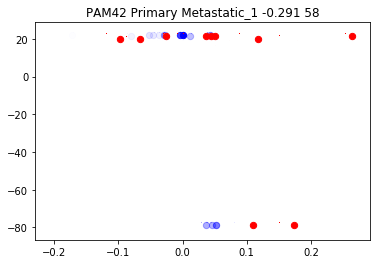

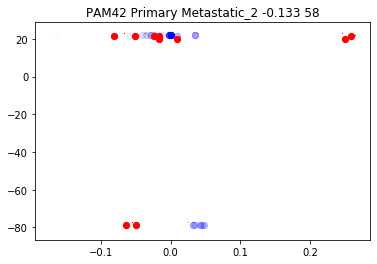

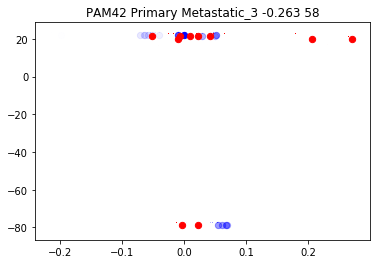

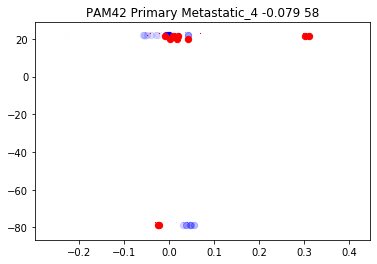

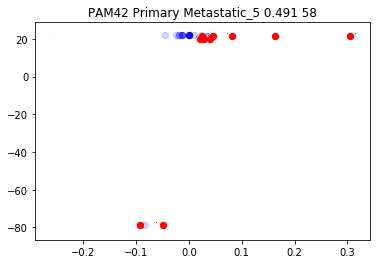

PAM43


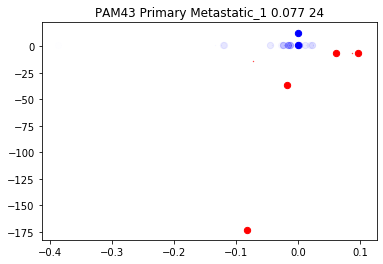

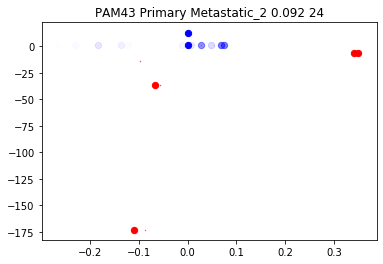

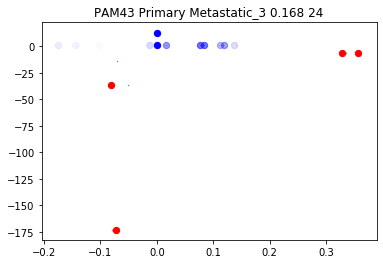

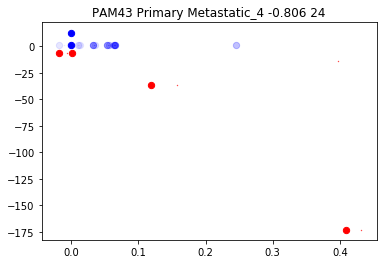

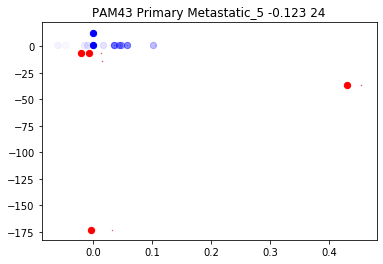

PAM44


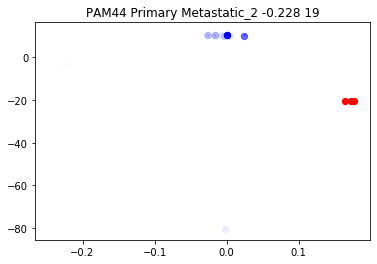

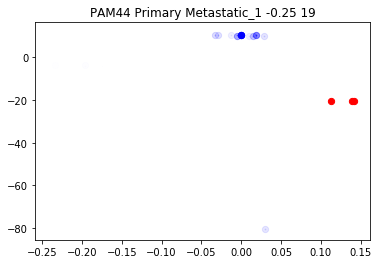

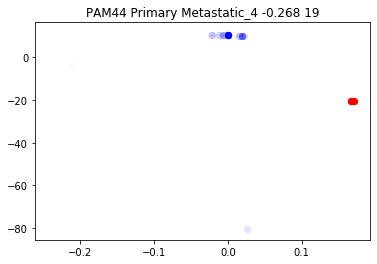

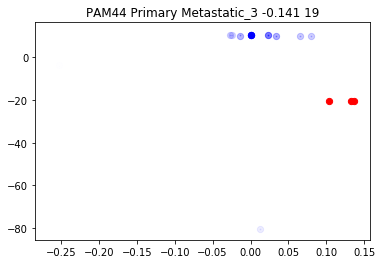

PAM45


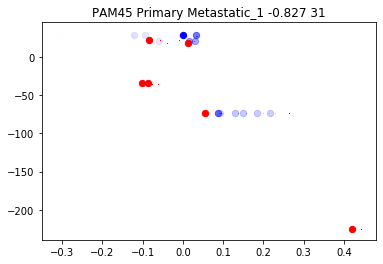

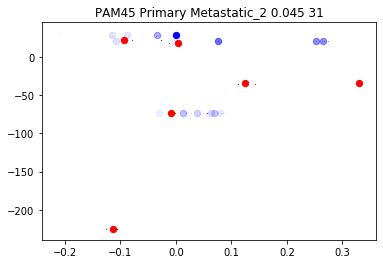

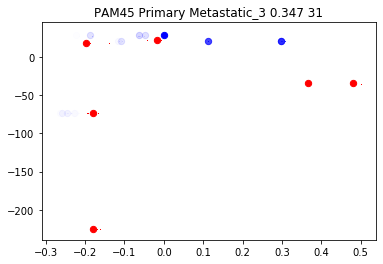

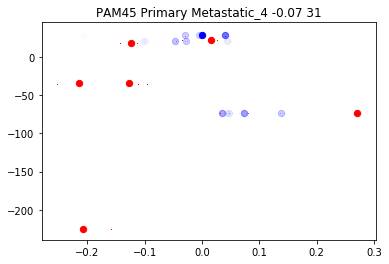

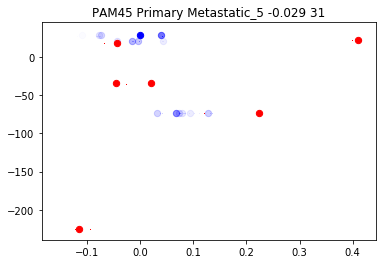

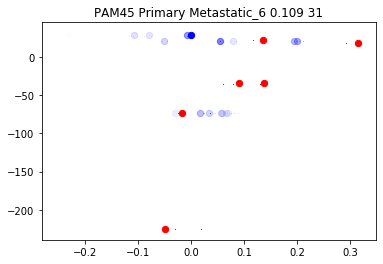

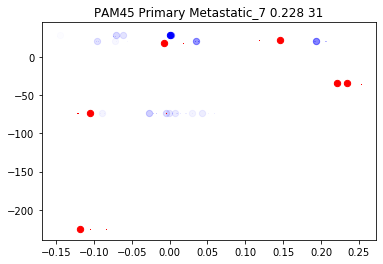

PAM46


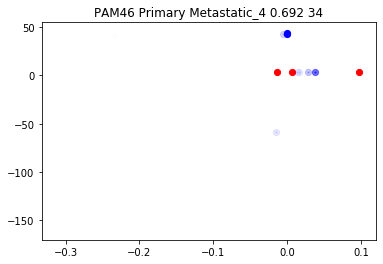

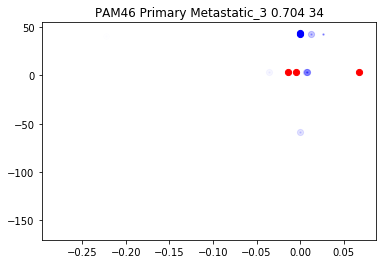

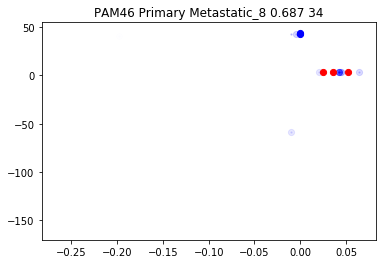

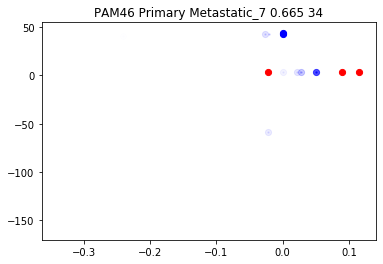

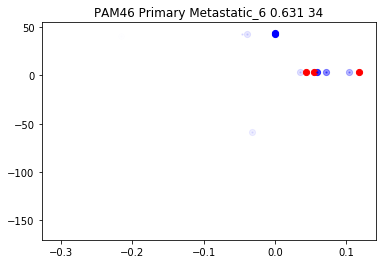

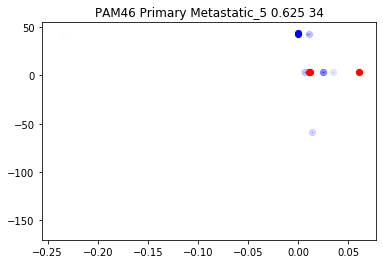

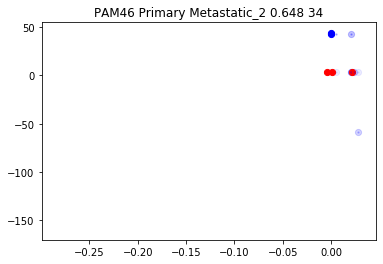

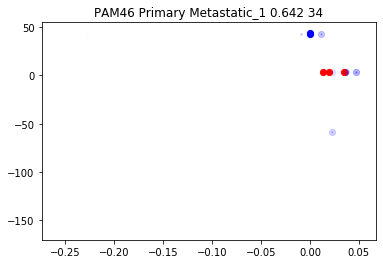

In [25]:
tp_pref1="Prim"
tp_pref2="Met"
dcinfo = {}

with PdfPages(os.path.join(odir, "clone_fitness.pdf")) as pdf:
    for patient in anl.patients.values():
        if dtype[patient.name] == "Synchronous":
            continue
        print(patient.name)
        tpairs = patient.get_time_pairs_by_prefix(tp_pref1, tp_pref2)
        for tp1, tp2 in tpairs:
            cinfo = get_clone_info2(patient, tp1, tp2, gene_list=['TP53', 'KRAS', 'CDKN2A','SMAD4'], mutation_list=mumids)
            dcinfo[patient.name+"_"+tp1+"_"+tp2] = cinfo
            for row in cinfo.itertuples(index=False):
                if row.X1<0.03:
                    col='red'
                    alpha=1
                else:
                    col='blue'
                    alpha=row.X2
                #plt.scatter(np.log(row.X2/row.X1), row.aveF,alpha=alpha,color=col, s=40*row.Weight)
                plt.scatter(np.log(row.X2/row.X1)/dpfs[patient.name],getattr( row, 'aveF'), alpha=alpha,color=col, s=40*row.Weight)
    #            plt.ylim(-0.05, 1.05)
            coeff = np.corrcoef(np.log(cinfo.X2/cinfo.X1), (cinfo.aveF))[0,1]
            coeff = round(coeff, 3)
            plt.title(patient.name+" "+tp1+" "+tp2+ " " + str(coeff) + " " + str(dos[patient.name]))
            pdf.savefig()
            plt.show()
binfo = pd.concat(dcinfo.values())

In [26]:
binfo.to_csv(os.path.join(hdir, "clone_data.txt"), sep="\t", index=False)

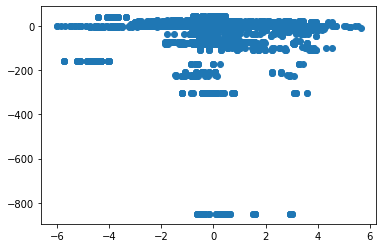

In [27]:
plt.scatter(np.log(binfo.X2/binfo.X1), binfo.aveF)
plt.show()

/Users/mluksza/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mluksza/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mluksza/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/Users/mluksza/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


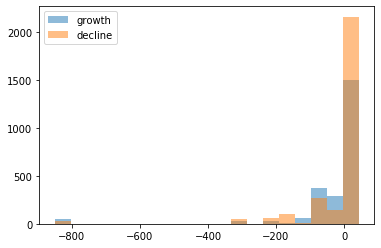

MannwhitneyuResult(statistic=2716363.0, pvalue=2.914106648865958e-29)

In [421]:
col = "aveF"
bins = np.linspace(min(getattr(binfo, col)), max(getattr(binfo, col)), 20)
x1 = getattr(binfo[[np.log2(row.X2/row.X1)/dpfs[row.Patient]>=0.01 for row in binfo.itertuples()]], col) 
x2 = getattr(binfo[[np.log2(row.X2/row.X1)/dpfs[row.Patient]<=0.01 for row in binfo.itertuples()]], col)
plt.hist(x1, bins=bins, alpha=0.5, label="growth")
plt.hist(x2, bins=bins, alpha=0.5, label="decline")
plt.legend()
plt.show()

scipy.stats.mannwhitneyu(x1, x2)

SyntaxError: invalid syntax (<ipython-input-423-7f505c6f4bee>, line 1)

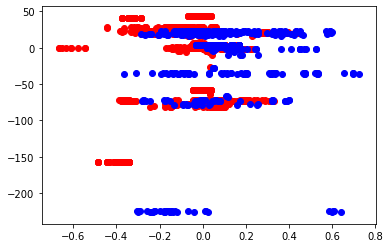

In [431]:
plt.scatter(np.log2(lbinfo1.X2/lbinfo1.X1)/[dpfs[r.Patient] for r in lbinfo1.itertuples()], lbinfo1.aveF,color='red')
plt.scatter(np.log2(lbinfo2.X2/lbinfo2.X1)/[dpfs[r.Patient] for r in lbinfo2.itertuples()], lbinfo2.aveF,color='blue')
#plt.yscale("log")

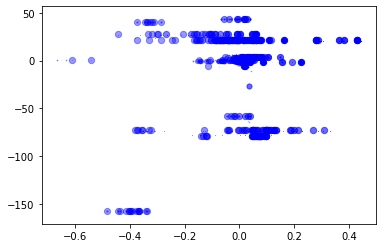

In [461]:
for row in lbinfo.itertuples(index=False):
    if row.X1<0.03:
        col='red'
        alpha=1
    else:
        col='blue'
        alpha=min(1,row.X2+0.4)
            #plt.scatter(np.log(row.X2/row.X1), row.aveF,alpha=alpha,color=col, s=40*row.Weight)
        plt.scatter(np.log2(row.X2/row.X1)/dpfs[row.Patient], getattr(row, 'aveF'), alpha=alpha,color=col, s=40*row.Weight)
#            plt.ylim(-0.05, 1.05)

In [469]:
obsF = np.array(np.log2(lbinfo.X2/lbinfo.X1)/[dpfs[row.Patient] for row in lbinfo.itertuples()])
aveF = np.array(lbinfo.aveF)
w = np.array(lbinfo.Weight)
w /= sum(w)
#w=np.array([1./len(w) for _ in w])
x1 = (obsF*w - sum(obsF*w))
x2 = (aveF*w - sum(aveF*w))
sum(x1*x2)/np.sqrt(sum(x1**2)*sum(x2**2))

0.9995204130804182

In [467]:
sum((obsF-np.mean(obsF))*(aveF-np.mean(aveF)))/np.sqrt(sum((obsF-np.mean(obsF))**2)*sum((aveF-np.mean(aveF))**2))

0.17189380426744721

In [470]:
sum(w*(obsF-np.mean(obsF))*(aveF-np.mean(aveF)))/np.sqrt(sum(w*(obsF-np.mean(obsF))**2)*sum(w*(aveF-np.mean(aveF))**2))

0.15889353630839992

In [460]:
pcoeff = np.corrcoef(obsF, aveF)
scoeff = spearmanr(obsF, aveF)
scoeff

SpearmanrResult(correlation=-0.11340532091474802, pvalue=3.938771612907229e-08)

In [ ]:
plt.scatter(np.log(lbinfo.X2/lbinfo.X1)/[dpfs[r.Patient] for r in lbinfo.itertuples()], lbinfo.aveF)


In [422]:
5091.95/8971

0.5676011592910489

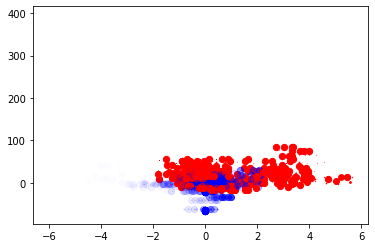

In [362]:
for row in binfo.itertuples(index=False):
    if row.X1<0.03:
        col='red'
        alpha=1
    else:
        col='blue'
        alpha=row.X2
    plt.scatter(np.log(row.X2/row.X1), row.aveNload,alpha=alpha,color=col, s=40*row.Weight)

/Users/mluksza/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars


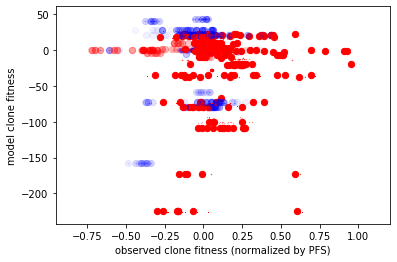

In [34]:
lbinfo = binfo[[dcohort[row.Patient] != "STS" and row.X1<1 for row in binfo.itertuples()]]
sbinfo = binfo[[dcohort[row.Patient] == "STS" and row.X1<1 for row in binfo.itertuples()]]

lbinfo1 = lbinfo[lbinfo.X1>=0.03]
lbinfo2 = lbinfo[lbinfo.X1<0.03]
sbinfo1 = sbinfo[sbinfo.X1>=0.03]
sbinfo2 = sbinfo[sbinfo.X1<0.03]

for row in lbinfo.itertuples(index=False):
    if row.X1<0.03:
        col='red'
        alpha=1
    else:
        col='blue'
        alpha=row.X1
    plt.scatter(np.log2(row.X2/row.X1)/dpfs[row.Patient], row.aveF, alpha=alpha,color=col, s=40*row.Weight)
for row in sbinfo.itertuples(index=False):
    if row.X1<0.03:
        col='red'
        alpha=1
    else:
        col='red'
        alpha=row.X1
    plt.scatter(np.log2(row.X2/row.X1)/dpfs[row.Patient], row.aveF, alpha=alpha,color=col, s=40*row.Weight)
plt.xlabel("observed clone fitness (normalized by PFS)")
plt.ylabel("model clone fitness")

plt.savefig(os.path.join(odir, "all_clones.pdf"))

NameError: name 'spearmanr' is not defined

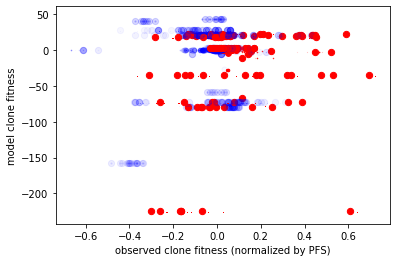

In [39]:
for row in lbinfo.itertuples(index=False):
    if row.X1<0.03:
        col='red'
        alpha=1
    else:
        col='blue'
        alpha=row.X1
    plt.scatter(np.log2(row.X2/row.X1)/dpfs[row.Patient], row.aveF, alpha=alpha,color=col, s=40*row.Weight)
plt.xlabel("observed clone fitness (normalized by PFS)")
plt.ylabel("model clone fitness")

obsF = np.array(np.log2(lbinfo.X2/lbinfo.X1))/ [dpfs[row.Patient] for row in lbinfo.itertuples()]
pcoeff = np.corrcoef(obsF, lbinfo.aveF)
scoeff = spearmanr(obsF, lbinfo.aveF)[0]
print(pcoeff, scoeff)

#plt.savefig(os.path.join(odir, "LTS_all_clones.pdf"))

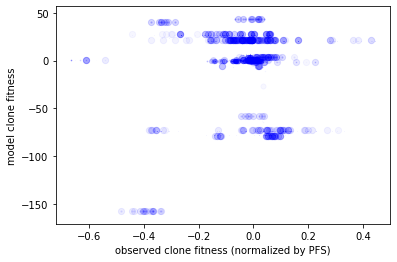

In [38]:
for row in lbinfo1.itertuples(index=False):
    if row.X1<0.03:
        col='red'
        alpha=1
    else:
        col='blue'
        alpha=row.X1
    plt.scatter(np.log2(row.X2/row.X1)/dpfs[row.Patient], row.aveF, alpha=alpha,color=col, s=40*row.Weight)
plt.xlabel("observed clone fitness (normalized by PFS)")
plt.ylabel("model clone fitness")

plt.savefig(os.path.join(odir, "LTS_shared_clones.pdf"))

/Users/mluksza/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


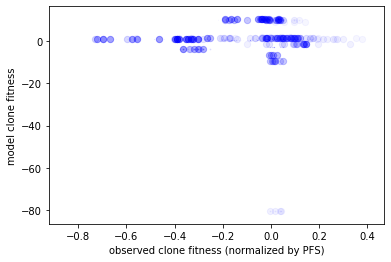

In [37]:
for row in sbinfo1.itertuples(index=False):
    if row.X1<0.03:
        col='red'
        alpha=1
    else:
        col='blue'
        alpha=row.X1
    plt.scatter(np.log2(row.X2/row.X1)/dpfs[row.Patient], row.aveF, alpha=alpha,color=col, s=40*row.Weight)
plt.xlabel("observed clone fitness (normalized by PFS)")
plt.ylabel("model clone fitness")

plt.savefig(os.path.join(odir, "STS_shared_clones.pdf"))

In [ ]:
for row in sbinfo.itertuples(index=False):
    if row.X1<0.03:
        col='red'
        alpha=1
    else:
        col='blue'
        alpha=row.X1
    plt.scatter(np.log2(row.X2/row.X1)/dpfs[row.Patient], row.aveF, alpha=alpha,color=col, s=40*row.Weight)
plt.xlabel("observed clone fitness (normalized by PFS)")
plt.ylabel("model clone fitness")

plt.savefig(os.path.join(odir, "STS_all_clones.pdf"))

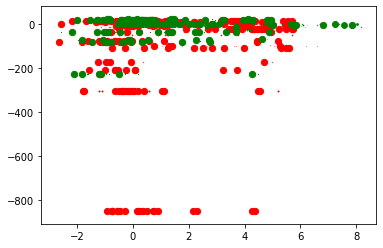

In [414]:
for row in sbinfo2.itertuples(index=False):
    if row.X1<0.03:
        col='red'
        alpha=1
    else:
        col='blue'
        alpha=row.X2
    plt.scatter(np.log2(row.X2/row.X1), row.aveF, alpha=alpha,color=col, s=40*row.Weight)
for row in lbinfo2.itertuples(index=False):
    if row.X1<0.03:
        col='red'
        alpha=1
    else:
        col='blue'
        alpha=row.X2
    plt.scatter(np.log2(row.X2/row.X1), row.aveF, alpha=alpha,color=col, s=40*row.Weight)

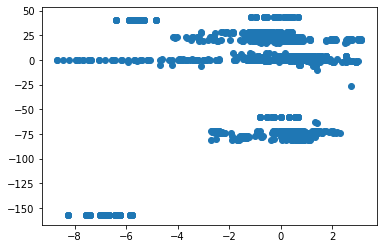

[[1.         0.26908001]
 [0.26908001 1.        ]] SpearmanrResult(correlation=-0.11754870299924419, pvalue=9.249806449772533e-07)


In [410]:
obsF = np.array(np.log2(lbinfo1.X2/lbinfo1.X1))
plt.scatter(obsF, lbinfo1.aveF)
plt.show()
pcoeff = np.corrcoef(obsF, lbinfo1.aveF)
scoeff = spearmanr(obsF, lbinfo1.aveF)[0]
print(pcoeff, scoeff)

In [400]:
lbinfo1

Clone Patient             TimePoints  PFS   OS        Weight        X1  \
1       1  11-LTS  Primary->Metastatic_1   41  100  9.944686e-01  0.681364   
2       5  11-LTS  Primary->Metastatic_1   41  100  9.944686e-01  0.318636   
3       2  11-LTS  Primary->Metastatic_1   41  100  9.944686e-01  0.353988   
4       4  11-LTS  Primary->Metastatic_1   41  100  9.944686e-01  0.234912   
5       3  11-LTS  Primary->Metastatic_1   41  100  9.944686e-01  0.244472   
..    ...     ...                    ...  ...  ...           ...       ...   
70      4   PAM46  Primary->Metastatic_1   17   34  1.158986e-12  0.045989   
71      6   PAM46  Primary->Metastatic_1   17   34  1.158986e-12  0.045445   
73     12   PAM46  Primary->Metastatic_1   17   34  1.158986e-12  0.109127   
74     14   PAM46  Primary->Metastatic_1   17   34  1.158986e-12  0.102951   
75     15   PAM46  Primary->Metastatic_1   17   34  1.158986e-12  0.069898   

          X2        Y1        Y2  ...  CDKN2A  SMAD4  17_36352475_A_C  \
1   0.462703  0.092464  0.138773  ...       0      0                0   
2   0.537297  0.003667  0.017262  ...       0      0                0   
3   0.195888  0.109516  0.121318  ...       0      0                0   
4   0.128042  0.234912  0.128042  ...       0      0                0   
5   0.074570  0.244472  0.074570  ...       0      0                0   
..       ...       ...       ...  ...     ...    ...              ...   
70  0.086605  0.023094  0.054675  ...       0      0                0   
71  0.110684  0.045445  0.110684  ...       0      0                0   
73  0.160578  0.109127  0.160578  ...       0      0                0   
74  0.001378  0.033053  0.000471  ...       0      0                0   
75  0.000907  0.069898  0.000907  ...       0      0                0   

    13_25073469_A_C  X_118143186_A_C  12_25398285_C_G  14_20216484_A_C  \
1                 0                0                0                0   
2                 0                0                0                0   
3                 0                0                0                0   
4                 0                0                0                0   
5                 0                0                0                0   
..              ...              ...              ...              ...   
70                0                0                0                0   
71                0                0                0                0   
73                0                0                0                0   
74                0                0                0                0   
75                0                0                0                0   

    12_25398284_C_T  16_76523711_A_C  12_25398284_C_A  
1                 0                0                0  
2                 0                0                0  
3                 0                0                0  
4                 0                0                0  
5                 0                0                0  
..              ...              ...              ...  
70                0                0                0  
71                0                0                0  
73                0                0                0  
74                0                0                0  
75                0                0                0  

[1798 rows x 28 columns]

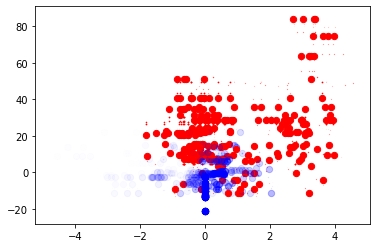

In [365]:
for row in sbinfo.itertuples(index=False):
    if row.X1<0.03:
        col='red'
        alpha=1
    else:
        col='blue'
        alpha=row.X2
    plt.scatter(np.log(row.X2/row.X1), row.aveNload,alpha=alpha,color=col, s=40*row.Weight)

In [269]:
from scipy.stats import spearmanr
np.corrcoef(np.log(binfo.X2/binfo.X1), binfo.aveMload)
spearmanr(np.log(binfo.X2/binfo.X1), binfo.aveNload)

SpearmanrResult(correlation=0.09882648669810264, pvalue=2.586767001932023e-19)

In [27]:
patient.timePoints["Primary"].samples['11_LTS_primary_tumor'].trees[0].nodes[9].rfitness

0.0

In [84]:
ddir='/Users/mluksza/Dropbox/Research/10_PDAC/Modeling/Data_orig'

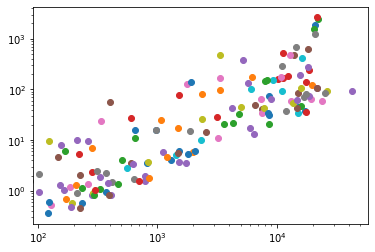

In [110]:
nfiles = glob.glob(os.path.join(ddir, "Results", "nf_*"))
l = []
for nfile in nfiles:
    ntab = pd.read_csv(nfile, sep="\t")
    idx=[r.neantigen_fitness==r.clone_fitness for r in ntab.itertuples()]
    ntab0 = ntab[idx].loc[:,["kDwt", "kDmt", "A"]]
    l.append(ntab0)
    plt.scatter(ntab0.kDwt, ntab0.A)
plt.xscale("log")
plt.yscale("log")

In [104]:
nmtab = pd.concat(l)

In [109]:
sum(nmtab.kDwt<500)/nmtab.shape[0]

0.4148936170212766

In [108]:
nmtab.shape

(188, 3)

In [284]:
np.log(50)/np.log(50000)

0.36156221528723914

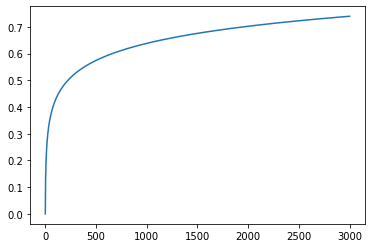

In [283]:
kdwt=np.arange(1,3000)
plt.plot(kdwt, np.log(kdwt)/np.log(50000))

In [270]:
1/np.log(500)

6.214608098422191